In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import time as t
import h5py as hdf

# Import CNN2D

In [2]:
inelast_filenames ={'e':'FLERCNN_plus_121151.h5'
            ,'mu':'FLERCNN_plus_141154.h5'
            ,'tau':'FLERCNN_plus_161151.h5'}

In [3]:
folder = '/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_inelasticity/'
hdf_inel_mu = hdf.File(folder+inelast_filenames['mu'],'r')

In [4]:
hdf_inel_mu.keys()

<KeysViewHDF5 ['CNN2D_PID_prob_t', 'CNN2D_y_lvl3_30gev_100rho36', 'CNN2D_y_lvl3_5gev_100rho36', 'CNN2D_y_lvl6_30gev_200rho36', 'CNN2D_y_lvl6_5gev_200rho36', 'L4_NoiseClassifier_ProbNu', 'bjorken_y', 'dis', 'interaction', 'pdg_code', 'reco_PID', 'reco_coszen', 'reco_energy', 'true_coszen', 'true_energy', 'weighted_aeff']>

In [5]:
true_E = hdf_inel_mu['true_energy'][1:]
reco_E = hdf_inel_mu['reco_energy'][1:]
reco_PID = hdf_inel_mu['reco_PID'][1:]
pdg_code = hdf_inel_mu['pdg_code'][1:]

isnu=pdg_code>0
isnubar=pdg_code<0

In [6]:
bjorken_y = hdf_inel_mu['bjorken_y'][1:]
negative_y = bjorken_y[bjorken_y < 0]
yisnegative = bjorken_y < 0
yispositive = bjorken_y > 0

yisneg_nubar=bjorken_y[yisnegative*pdg_code<0]
yisneg_nu=bjorken_y[yisnegative*pdg_code>0]
np.sum(yisneg_nu)/np.sum(yisneg_nubar)

1.210775473399459

In [7]:
inter=hdf_inel_mu['interaction'][1:]
reco_coszen=hdf_inel_mu['reco_coszen'][1:]
true_coszen=hdf_inel_mu['true_coszen'][1:]
is_cc = (inter == 1)
is_nc = (inter == 2)

## Import FLERCNN

In [8]:
flercnnfolder = '/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_analysis/pisa_hdf5/flercnn/'

flercnnnames = {'neu':'oscNext_pisa_genie_0000_flercnn.hdf5',
                'muon':'oscNext_pisa_muongun_130000_flercnn.hdf5',
                'noise':'oscNext_pisa_noise_888003_flercnn.hdf5',
                'nominal':'oscNext_pisa_genie_1154_flercnn.hdf5'}

In [9]:
neuhdf = hdf.File(flercnnfolder+flercnnnames['nominal'],'r')

In [10]:
numu_cc = neuhdf['numu_cc']
numu_nc = neuhdf['numu_nc']
numubar_cc = neuhdf['numubar_cc']
numubar_nc = neuhdf['numubar_nc']

In [11]:
numu_cc.keys()

<KeysViewHDF5 ['FLERCNN_BDT_ProbNu', 'FLERCNN_coszen', 'FLERCNN_energy', 'FLERCNN_nDOM', 'FLERCNN_prob_muon_v3', 'FLERCNN_prob_nu', 'FLERCNN_prob_track', 'FLERCNN_vertex_rho36', 'FLERCNN_vertex_x', 'FLERCNN_vertex_y', 'FLERCNN_vertex_z', 'GENIEWeight', 'GENIE_linear_fit_AhtBY', 'GENIE_linear_fit_BhtBY', 'GENIE_linear_fit_CV1uBY', 'GENIE_linear_fit_CV2uBY', 'GENIE_linear_fit_MaCCQE', 'GENIE_linear_fit_MaCCRES', 'GENIE_linear_fit_MaCOHpi', 'GENIE_linear_fit_MaNCEL', 'GENIE_linear_fit_MaNCRES', 'GENIE_quad_fit_AhtBY', 'GENIE_quad_fit_BhtBY', 'GENIE_quad_fit_CV1uBY', 'GENIE_quad_fit_CV2uBY', 'GENIE_quad_fit_MaCCQE', 'GENIE_quad_fit_MaCCRES', 'GENIE_quad_fit_MaCOHpi', 'GENIE_quad_fit_MaNCEL', 'GENIE_quad_fit_MaNCRES', 'GENIE_rw_AhtBY_0', 'GENIE_rw_AhtBY_1', 'GENIE_rw_AhtBY_2', 'GENIE_rw_AhtBY_3', 'GENIE_rw_BhtBY_0', 'GENIE_rw_BhtBY_1', 'GENIE_rw_BhtBY_2', 'GENIE_rw_BhtBY_3', 'GENIE_rw_CV1uBY_0', 'GENIE_rw_CV1uBY_1', 'GENIE_rw_CV1uBY_2', 'GENIE_rw_CV1uBY_3', 'GENIE_rw_CV2uBY_0', 'GENIE_rw_CV

# Function Imports

In [12]:
Ebins=np.geomspace(5,100,13)
cosbins=np.linspace(-1.0,0.3,11)
pidbins=[0.,0.25,0.55,1.]

names = {0:'Cascades',1:'Mixed',2:'Tracks'}

Erange=np.geomspace(1,1e4,21)
yrange=np.linspace(0,1,21)

In [13]:
lvl3_30gev_100rho36=hdf_inel_mu['CNN2D_y_lvl3_30gev_100rho36'][1:]
lvl3_5gev_100rho36=hdf_inel_mu['CNN2D_y_lvl3_5gev_100rho36'][1:]
lvl6_30gev_200rho36=hdf_inel_mu['CNN2D_y_lvl6_30gev_200rho36'][1:]
lvl6_5gev_200rho36=hdf_inel_mu['CNN2D_y_lvl6_5gev_200rho36'][1:]

ys={'3_low':lvl3_5gev_100rho36,'3_high':lvl3_30gev_100rho36,'6_low':lvl6_5gev_200rho36,'6_high':lvl6_30gev_200rho36}
yname=['lvl3_5gev_100rho36','lvl3_30gev_100rho36','lvl6_5gev_200rho36','lvl6_30gev_200rho36']
nutype={'numu':isnu,'numubar':isnubar,'bothnumu':isnu + isnubar}
nulabel=[r'$\nu_\mu$',r'$\bar{\nu}_\mu$',r'$\nu_\mu$, $\bar{\nu}_\mu$']

In [14]:
maxE=300 #300 standard
true_Eranges = {'low':np.linspace(3,30,21),'medium':np.linspace(30,100,21),'high':np.linspace(100,maxE,21)}
weights_mu=hdf_inel_mu['weighted_aeff'][1:]

In [15]:
true_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= true_E) 
                & (true_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
true_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= true_E) 
                & (true_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
true_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= true_E) 
                & (true_E <= true_Eranges['high'][-1]*np.ones(true_E.shape)))

In [16]:
def median1dfrom2dbins(array1):
    '''
    calculates approximated median 1d array (i.e. median 'index') along x axis from 2d histogram using square grid bins
    '''
    array=np.array(array1)
    median = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        sliced = array[i]
        total = np.sum(sliced)
        cumul = np.cumsum(sliced)
        smaller = cumul < total/2
        index = np.argmin(smaller) #finds first False in smaller
        
        if sliced[index]==0:
            median[i]=0
            continue
        
        smallersum = np.sum(sliced[:index])
        biggersum = np.sum(sliced[index:])-sliced[index]
        median[i]=(biggersum-smallersum)/(2*sliced[index])+1/2+index
        
    return median

def quantile1dfrom2dbins(array1,q):
    '''
    calculates approximated median 1d array (i.e. median 'index') along x axis from 2d histogram using square grid bins
    '''
    array=np.array(array1)
    qu = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        sliced = array[i]
        total = np.sum(sliced)
        cumul = np.cumsum(sliced)
        smaller = cumul < total*q
        index = np.argmin(smaller) #finds first False in smaller
        
        if sliced[index]==0:
            qu[i]=0
            continue
        
        smallersum = np.sum(sliced[:index])
        biggersum = np.sum(sliced[index:])-sliced[index]
        qu[i]=(smallersum-1-biggersum)/(2*sliced[index])+1/2+index
        
    return qu

def quantile_array(array,q,weights=None):
    '''
    returns qth quantile of weighted array. sorts array by ascending order
    
    Input:
    <array> and corresponding <weights> for each entry
    q: quantile to be computed
    
    Returns:
    value: boundary at which quantile stops in the sorted array
    '''
    q=np.array(q)
    assert q.all()<=1 and q.all()>=0
    array1=np.array(array)
    inds = array1.argsort()
    sortarr=array1[inds]
    sortweights=weights[inds]
    
    if weights is None:
        weights=np.ones(len(array))
    
    cumul=np.cumsum(sortweights)-sortweights/2
    total=np.sum(sortweights)
    
    ratio = cumul/total
    
    if ratio.size==0 or sortarr.size==0:
        value=np.array(np.zeros(len(q)))

    if not list(ratio) or not list(sortarr):
        return np.zeros_like(q)

    value = np.interp(q,ratio,sortarr) #returns interpolated value in array1 where ratio=q
      
    return value

def bordercalc(yarray1,yarray2,weights,ybins):
    '''
    calculates the median and 68% boundaries for yarray1 for each ybin of yarray2
    '''
    
    
    qs=[0.16,0.5,0.84]
    
    yarray1=np.array(yarray1)
    yarray2=np.array(yarray2)

    lower=np.zeros(np.array(ybins[:-1]).shape[0])
    median=np.zeros(np.array(ybins[:-1]).shape[0])
    higher=np.zeros(np.array(ybins[:-1]).shape[0])
    
    for i in range(np.array(ybins[:-1]).shape[0]):
        iny=(ybins[i]<=yarray2)*(yarray2<=ybins[i+1])
        arrayslice=yarray1[iny]
        weightslice=weights[iny]
        lower[i],median[i],higher[i]=quantile_array(arrayslice,qs,weightslice)
    return lower,median,higher

def reweight_truey(weights,truey,ybins):
    '''
    recalculates weights such that they add up to 1 within each ybins
    '''
    storage = np.zeros(len(weights))
    for i,j in enumerate(ybins[:-1]):
        below = truey < ybins[i+1]
        above = j < truey
        storage[below*above]=weights[below*above]/np.sum(weights[below*above])
    return storage

# Analysis

In [17]:
fluxweights=np.load('Fluxweights.npy')
fluxweights_numu=np.array(fluxweights[0])
fluxweights_numubar=np.array(fluxweights[1])
fluxweights_both = np.where(pdg_code > 0, fluxweights_numu,fluxweights_numubar)

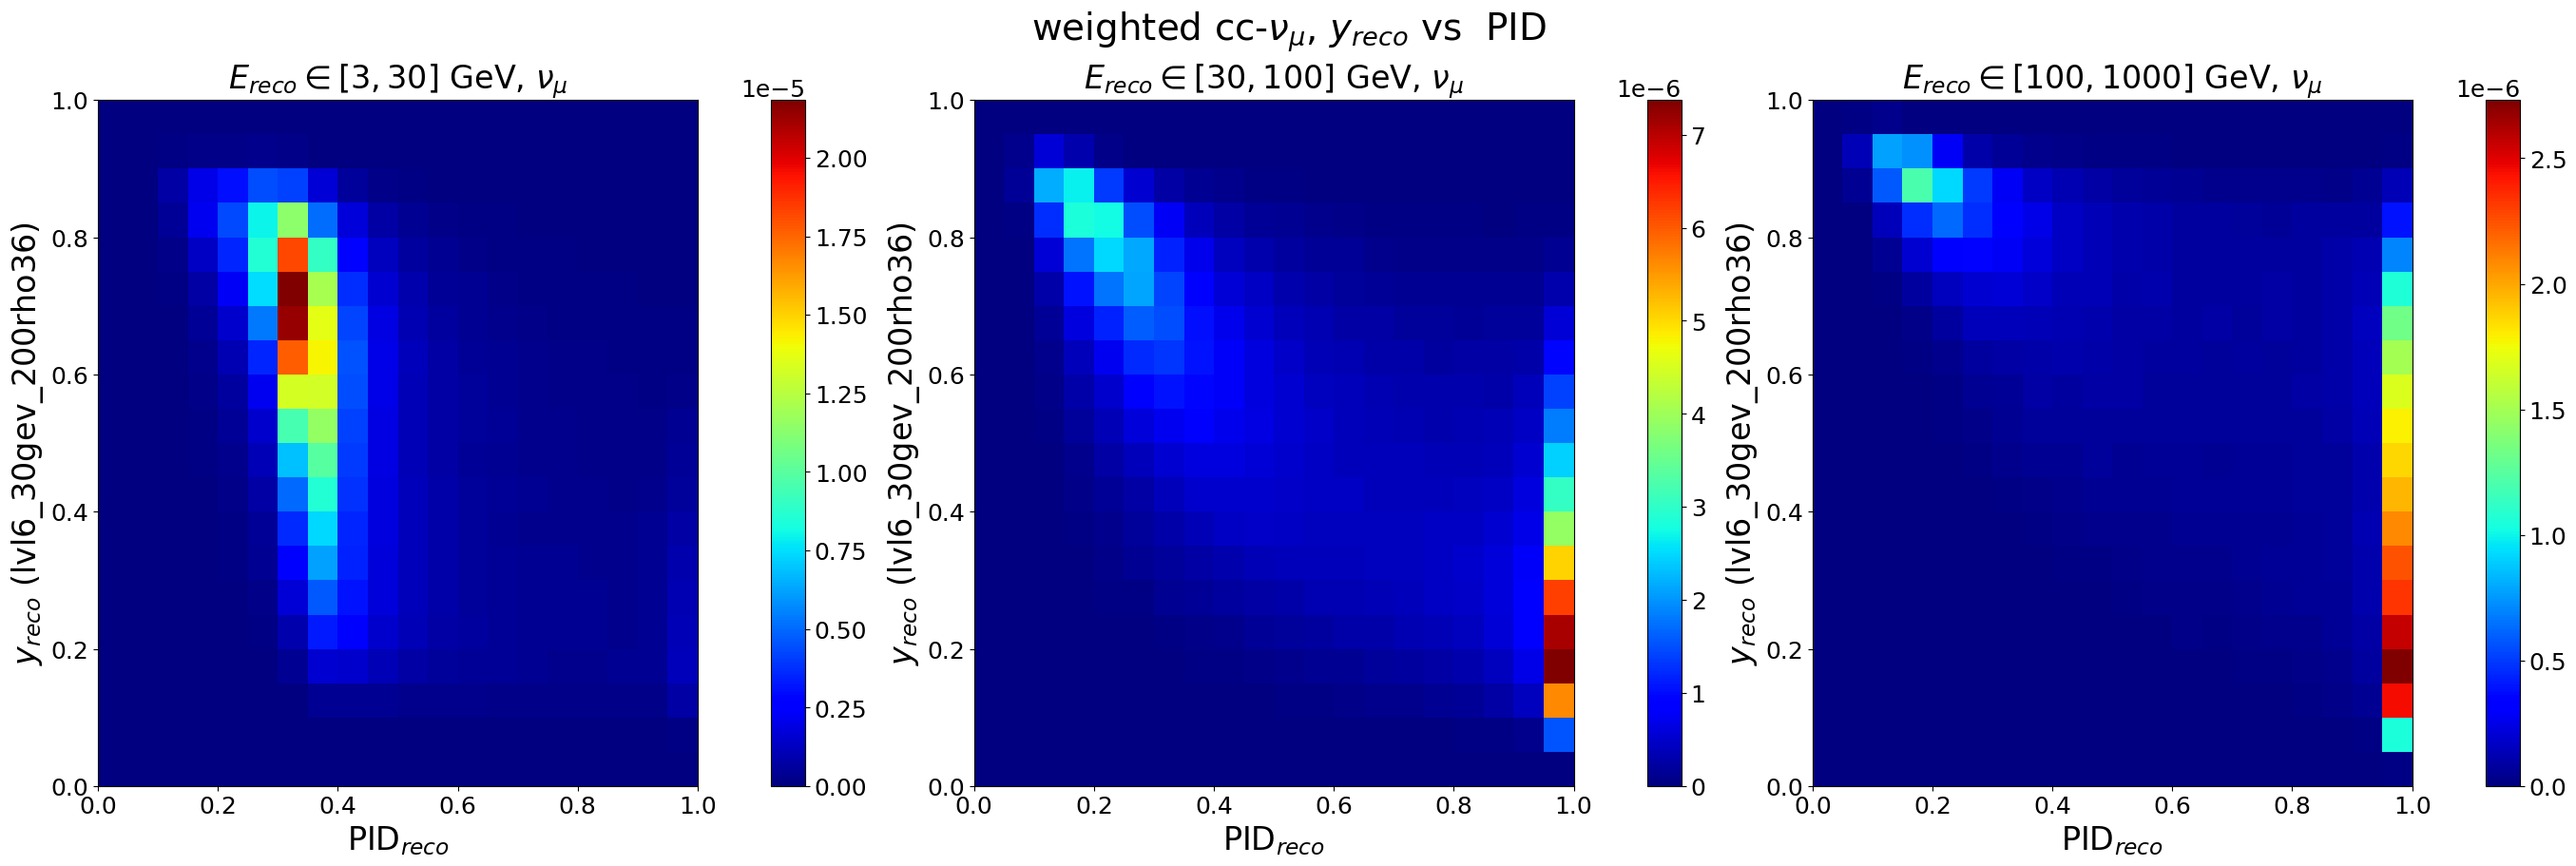

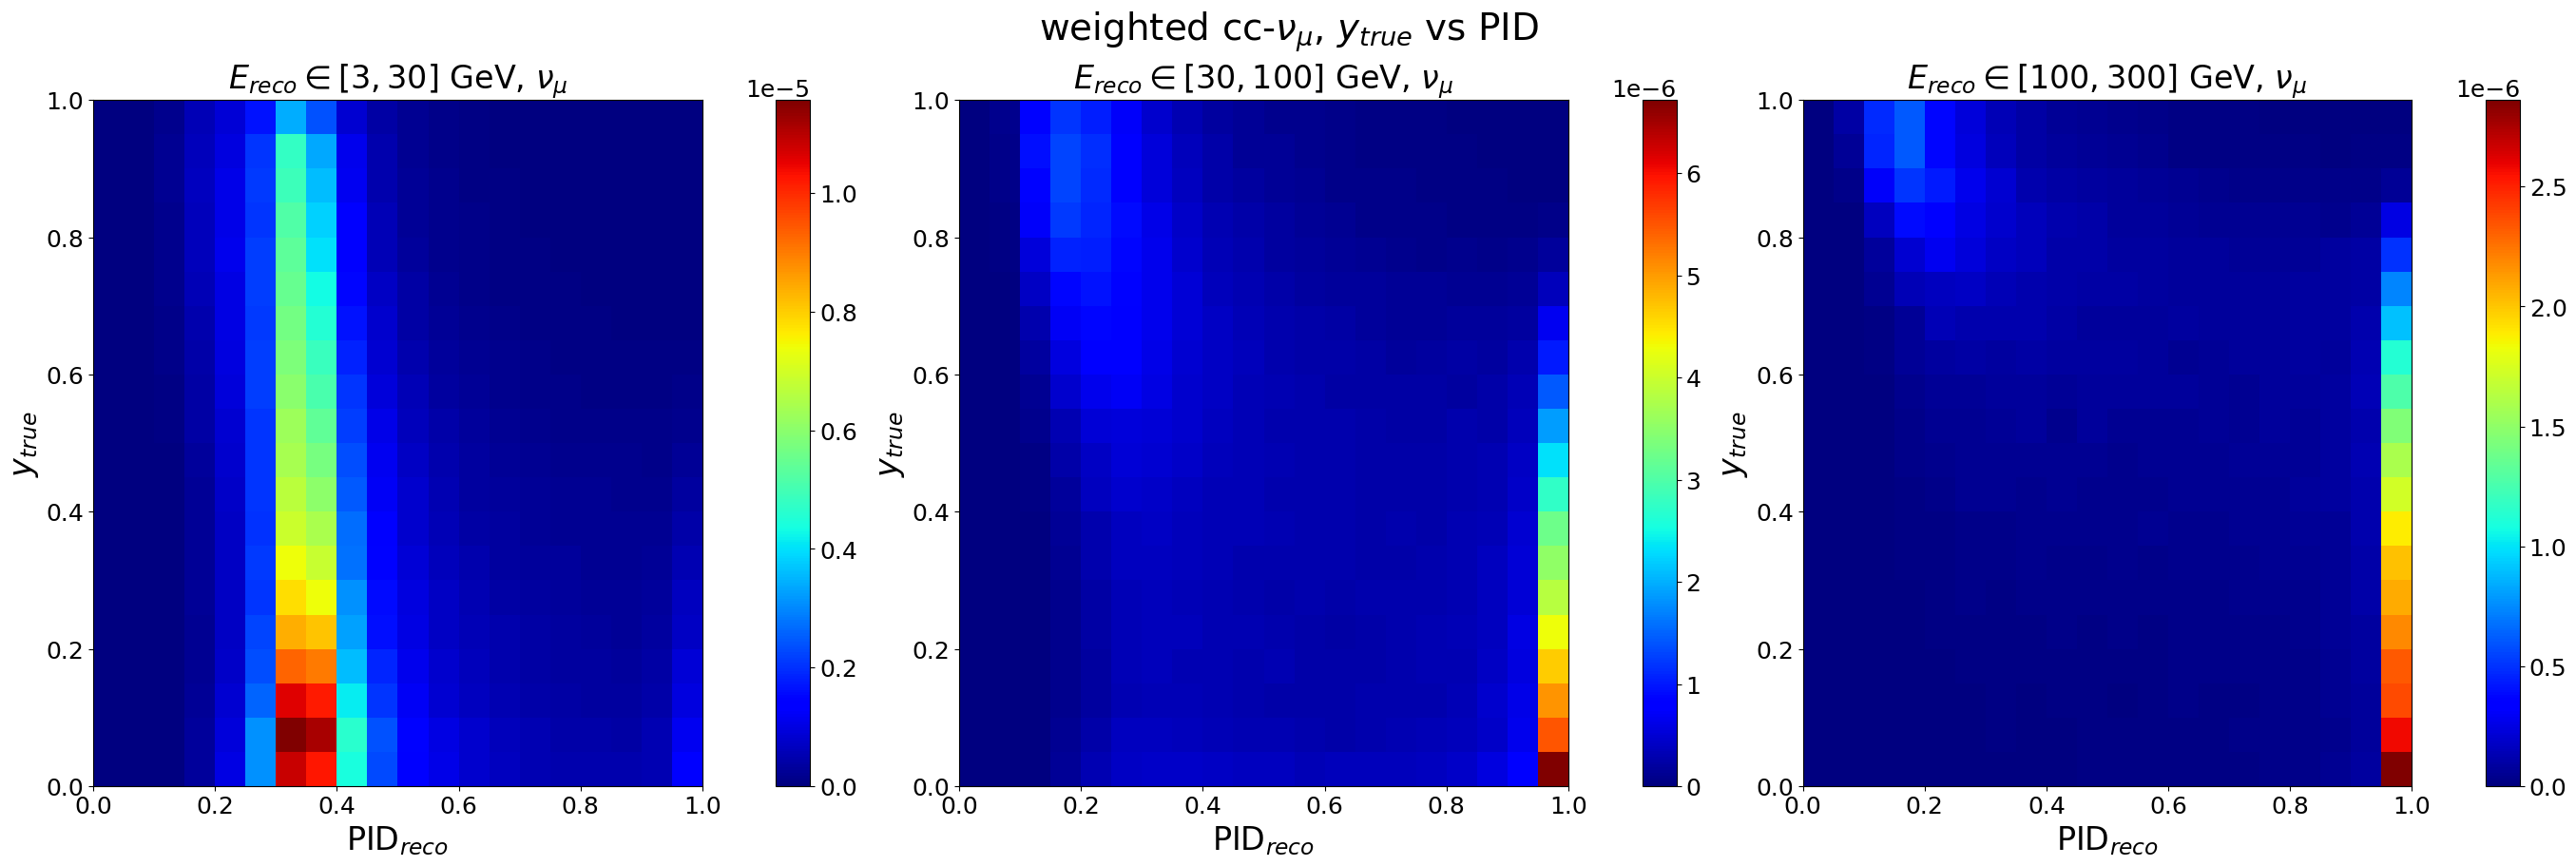

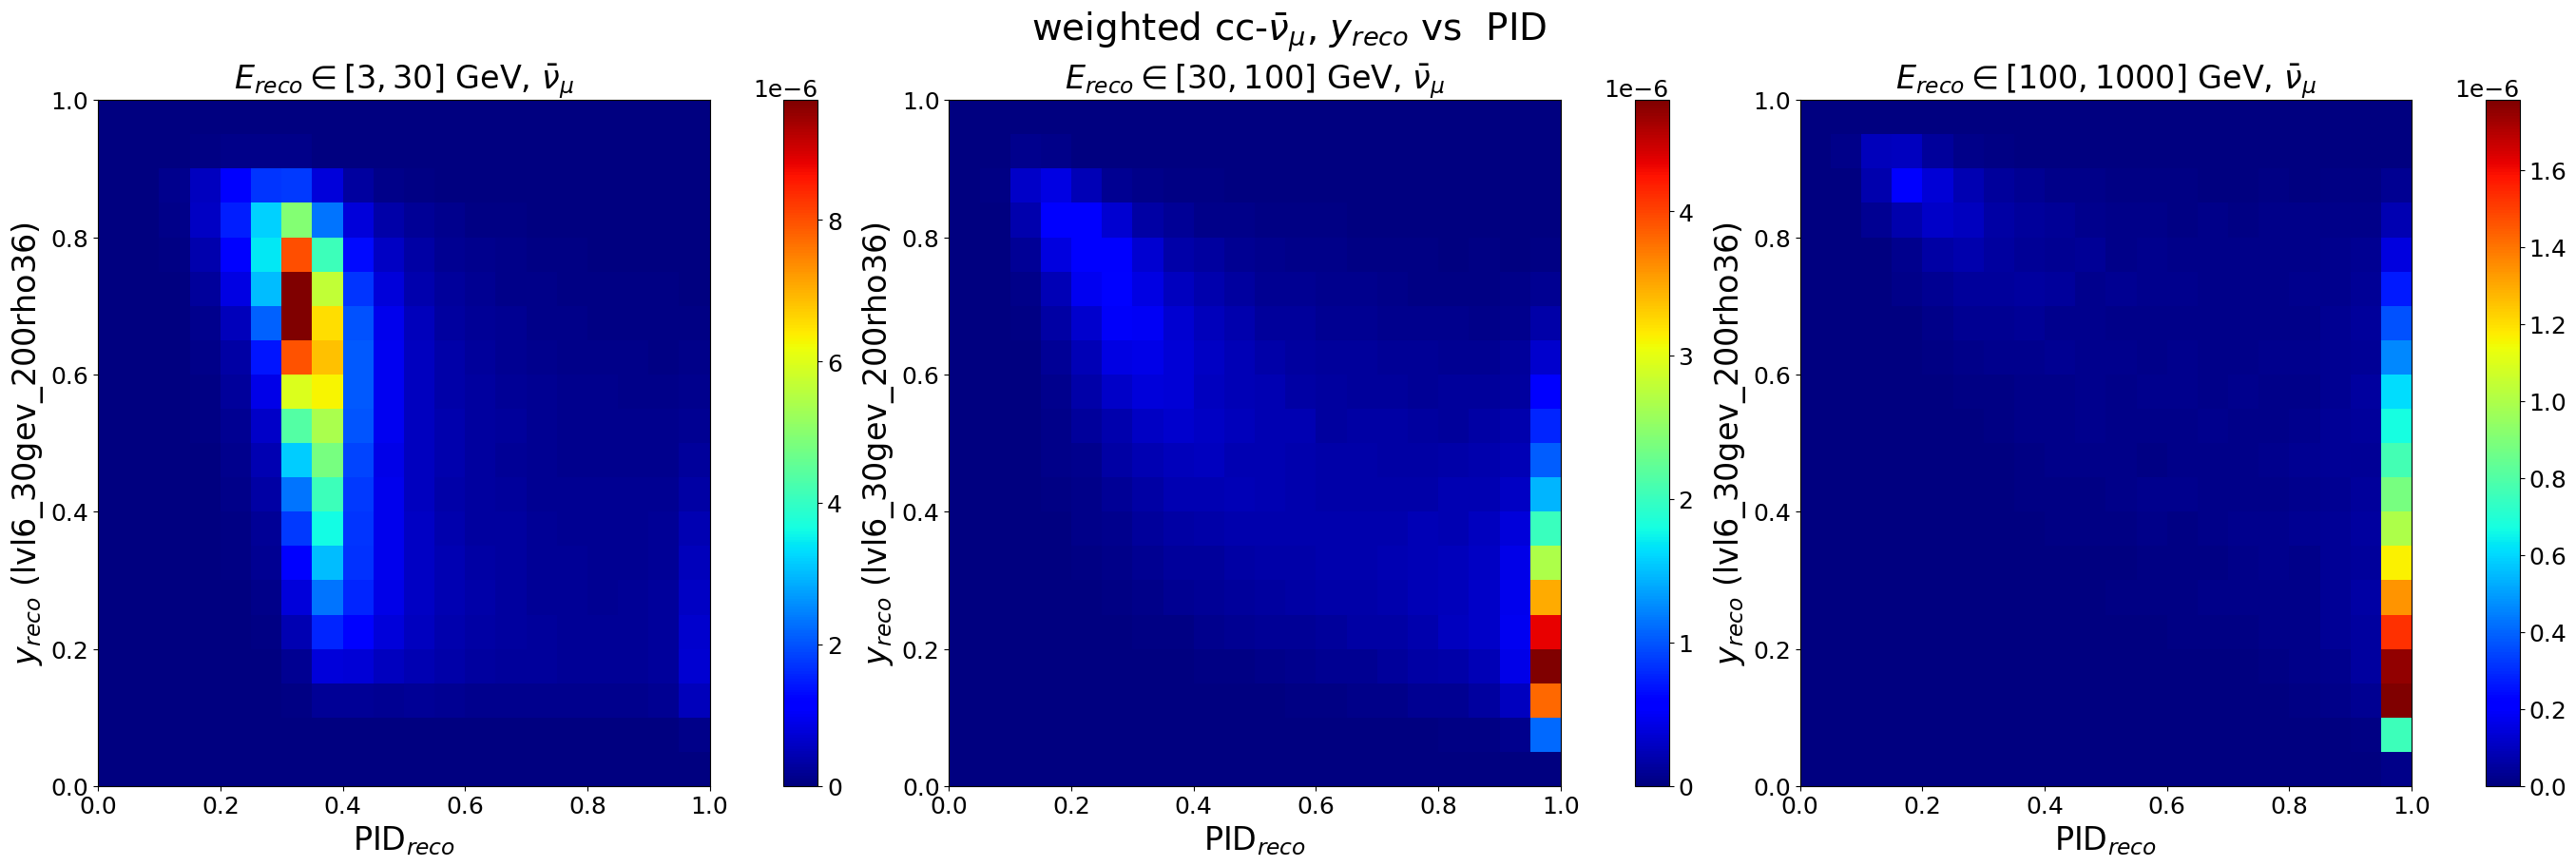

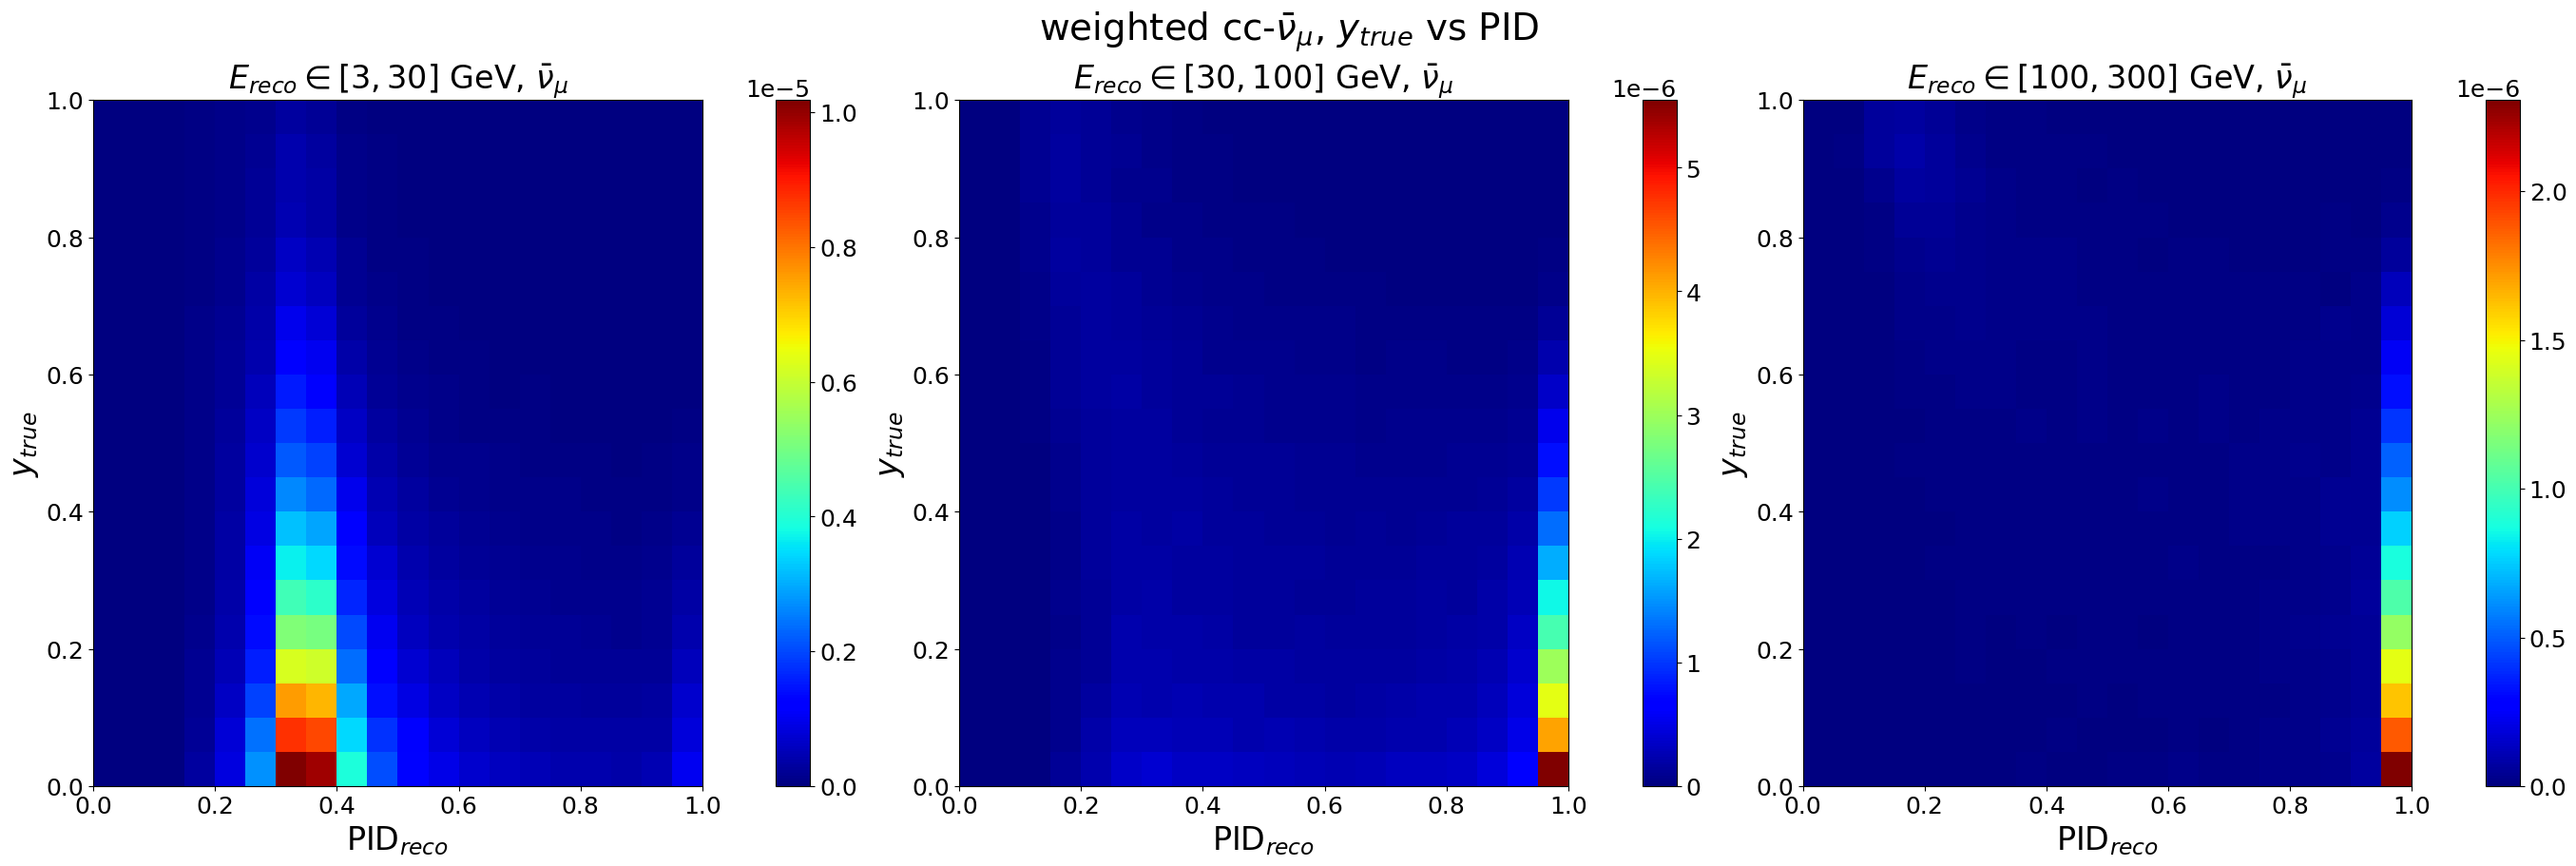

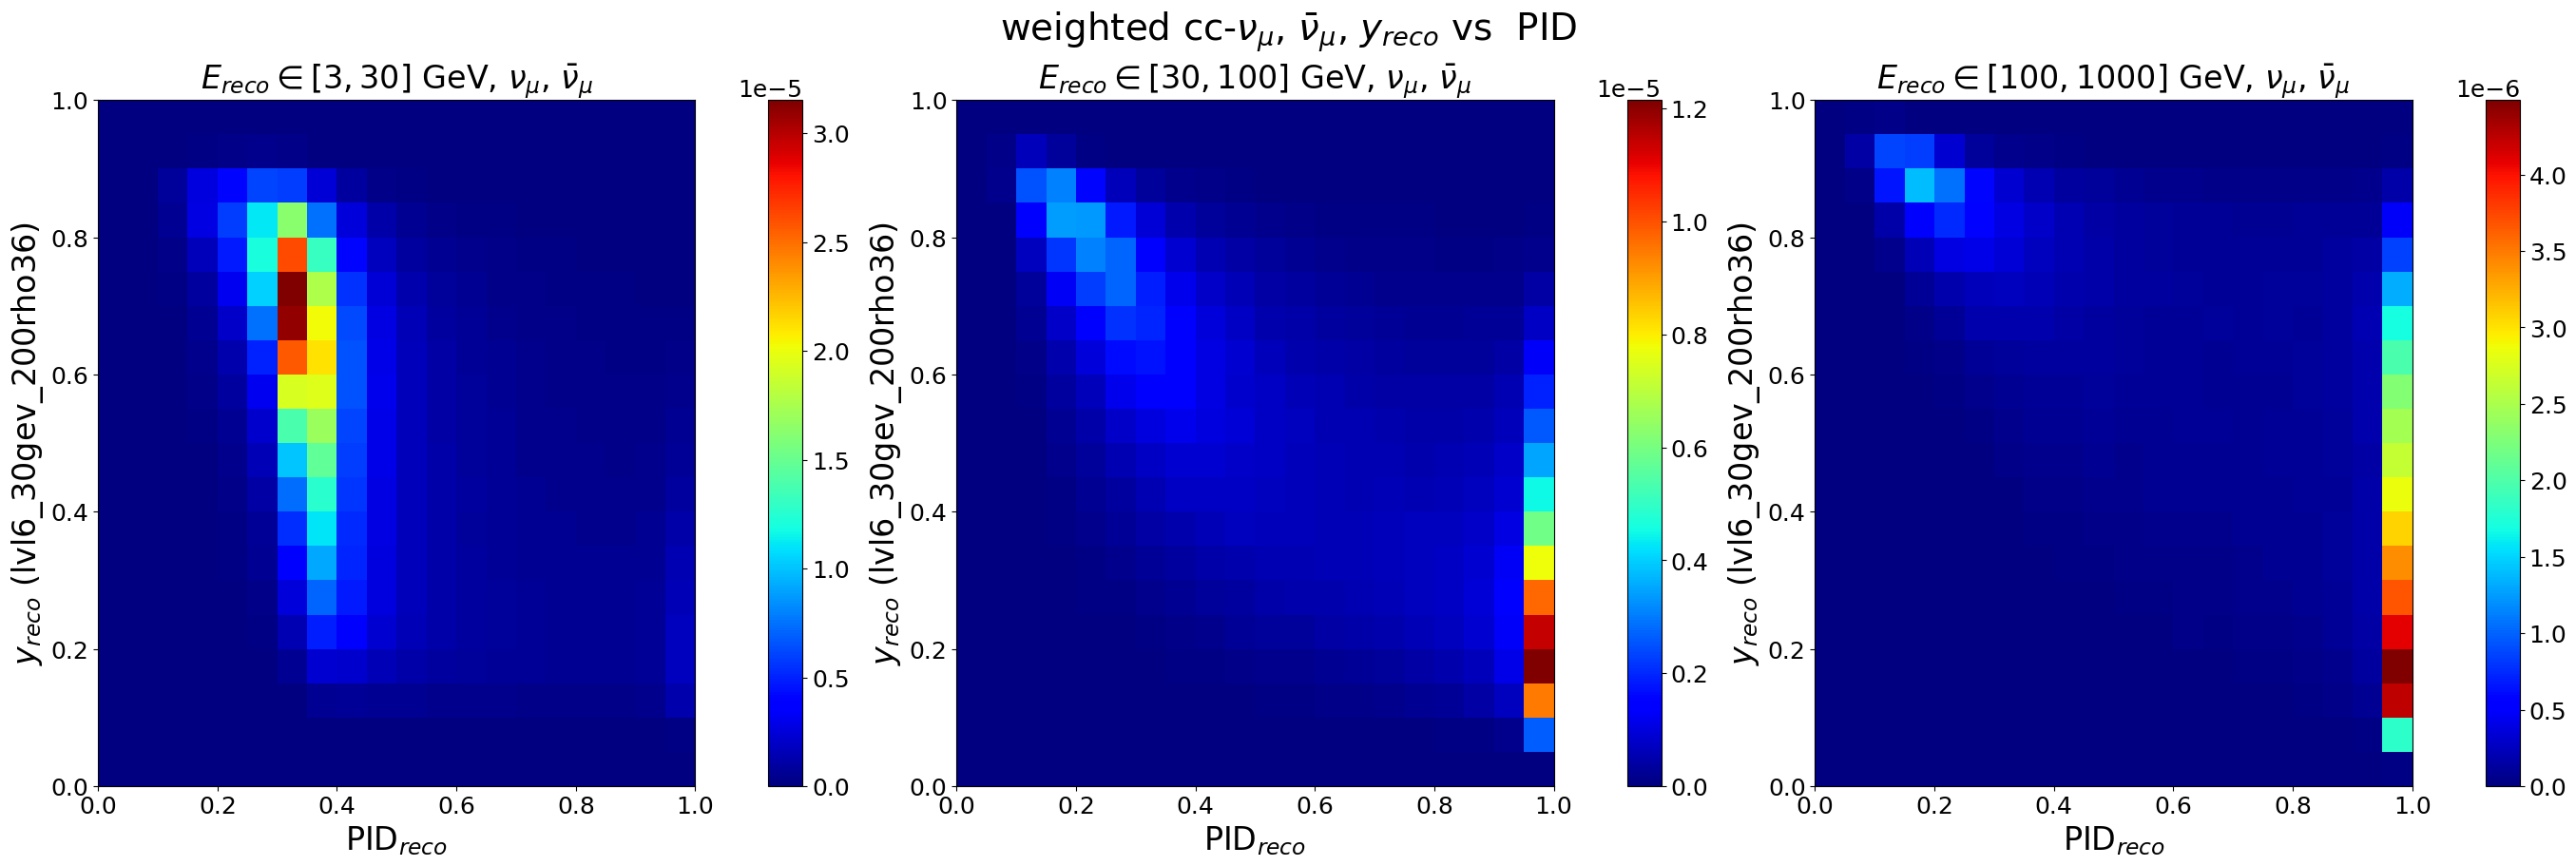

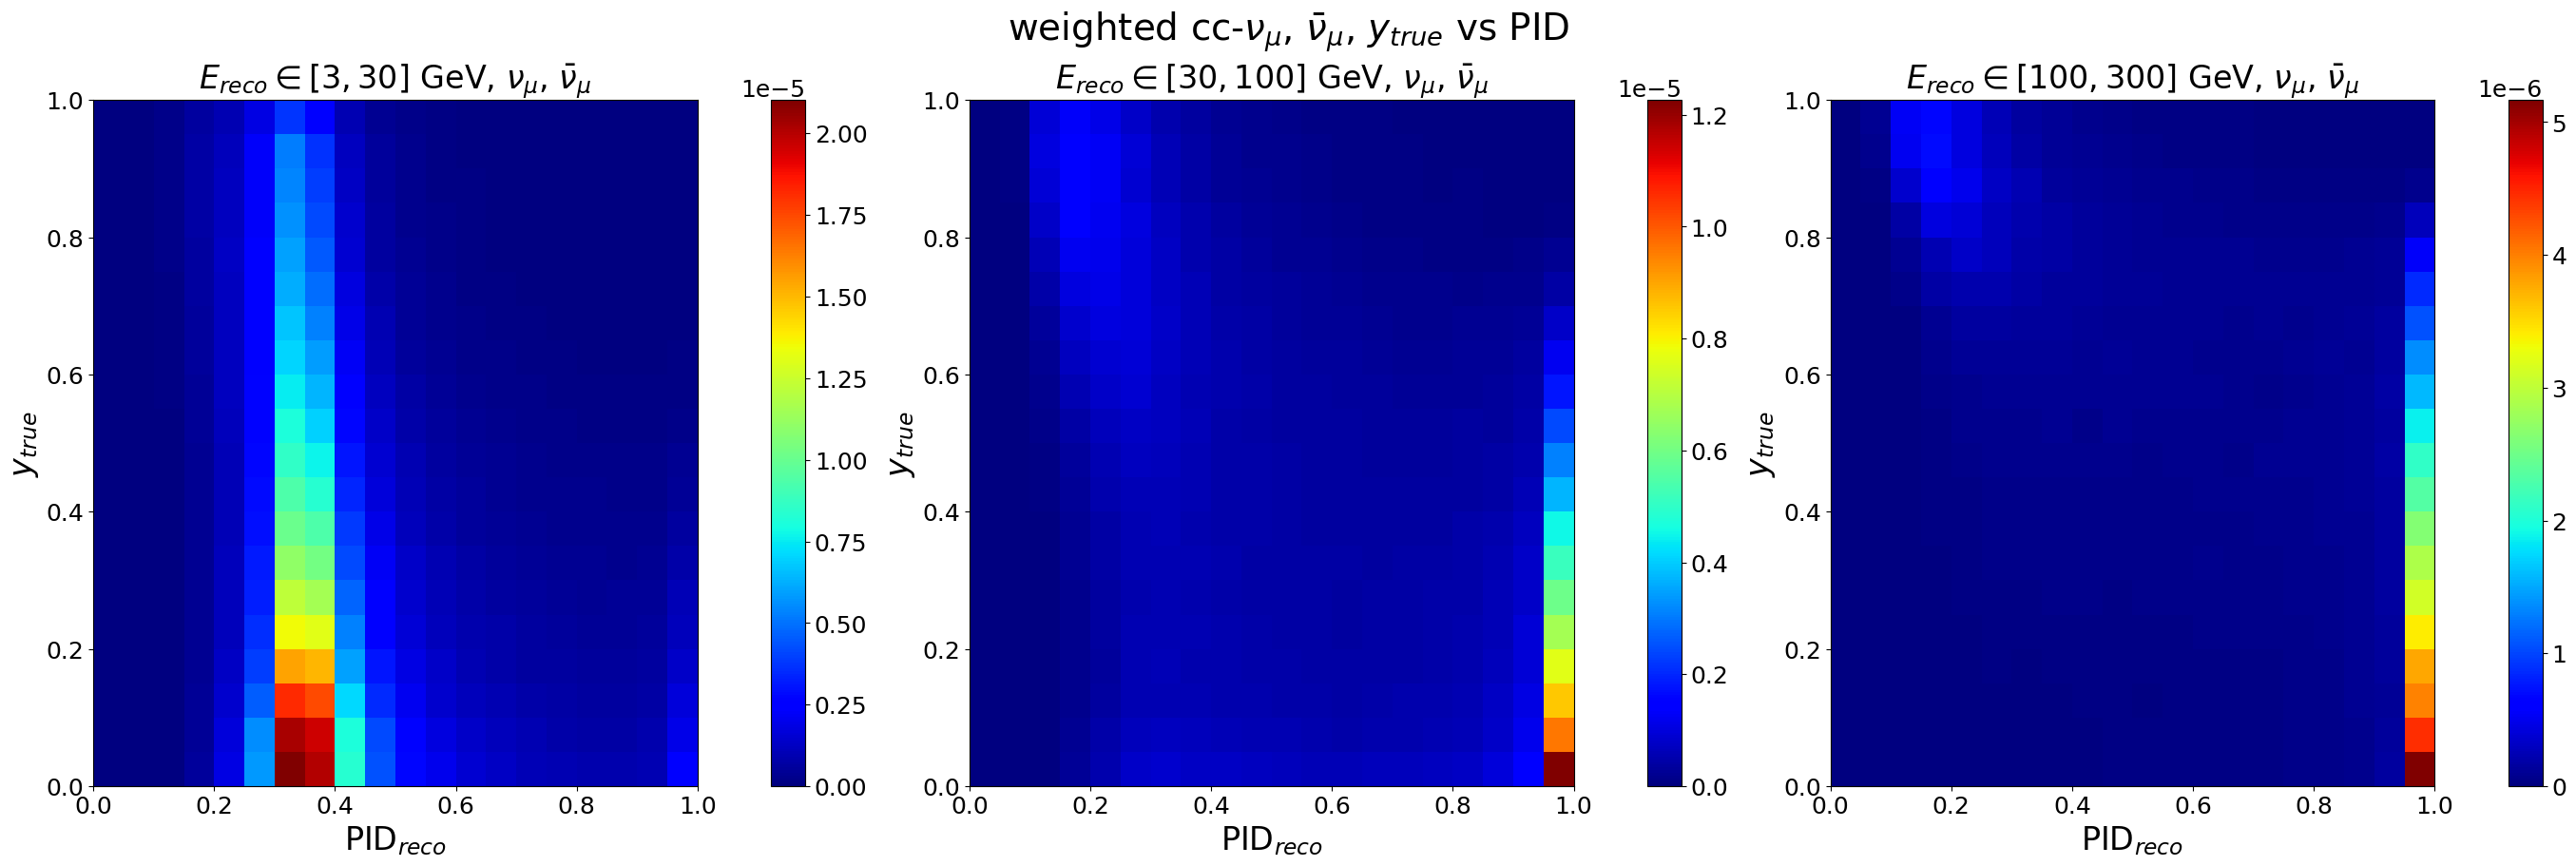

In [18]:
plotflag = True
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 
    
factor = 1
    
if plotflag == True:    
    for i,y in enumerate(ys.values()):
        for j,nu in enumerate(nutype.values()):
            if i==3:
                true_y_low_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                true_y_medium_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                true_y_high_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                reco_y_low_cc=y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                reco_y_medium_cc=y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                reco_y_high_cc=y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                weights_low_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_islow*nu]*factor
                weights_medium_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_ismedium*nu]*factor
                weights_high_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_ishigh*nu]*factor       
    
                
                reco_PID_low=reco_PID[is_cc & yispositive & reco_E_islow & nu]
                reco_PID_medium=reco_PID[is_cc & yispositive & reco_E_ismedium & nu]
                reco_PID_high=reco_PID[is_cc & yispositive & reco_E_ishigh & nu]
    
                #plotsection weighted
    
                fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))
    
                h,_,_,im=ax1.hist2d(reco_PID_low,reco_y_low_cc,bins=[yrange,yrange],
                           cmap=plt.cm.jet,weights=weights_low_cc)
                ax1.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
                if reco==True:
                    ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
                ax1.tick_params(axis='both', which='major', labelsize=18)
                ax1.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax2.hist2d(reco_PID_medium,reco_y_medium_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_medium_cc)
                ax2.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
                if reco==True:
                    ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
                lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
                ax2.tick_params(axis='both', which='major', labelsize=18)
                ax2.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax3.hist2d(reco_PID_high,reco_y_high_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_high_cc)
                ax3.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
                if reco==True:
                    ax3.set_title(r'$E_{{reco}} \in [100,1000]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
                lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
                ax3.tick_params(axis='both', which='major', labelsize=18)
                ax3.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                fig.suptitle(r'weighted cc-{nu}, $y_{{reco}}$ vs  PID'.format(nu=nulabel[j]),fontsize=28)
                weightname = 'weighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
                '''
                if reco==True:
                    plt.savefig("Inelast_Plots/Inelast/recoE_"+weightname,bbox_inches='tight')
                else:
                    plt.savefig("Inelast_Plots/Inelast/"+weightname,bbox_inches='tight')
                '''
                plt.show()
    
                #plotsection weighted
    
                fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))
    
                h,_,_,im=ax1.hist2d(reco_PID_low,true_y_low_cc,bins=[yrange,yrange],
                           cmap=plt.cm.jet,weights=weights_low_cc)
                ax1.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax1.set_ylabel(r'$y_{{true}}$',fontsize=24)
                if reco==True:
                    ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)   
                ax1.tick_params(axis='both', which='major', labelsize=18)
                ax1.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax2.hist2d(reco_PID_medium,true_y_medium_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_medium_cc)
                ax2.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax2.set_ylabel('$y_{{true}}$',fontsize=24)
                if reco==True:
                    ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)          
                ax2.tick_params(axis='both', which='major', labelsize=18)
                ax2.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax3.hist2d(reco_PID_high,true_y_high_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_high_cc)
                ax3.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax3.set_ylabel('$y_{{true}}$',fontsize=24)
                if reco==True:
                    ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)      
                ax3.tick_params(axis='both', which='major', labelsize=18)
                ax3.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                fig.suptitle(r'weighted cc-{nu}, $y_{{true}}$ vs PID'.format(nu=nulabel[j]),fontsize=28)
                weightname = 'weighted_y_vs_pid'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
                if reco==True:
                    plt.savefig("Inelast_Plots/PID_Y_2D/recoE_"+weightname,bbox_inches='tight')
                plt.show()

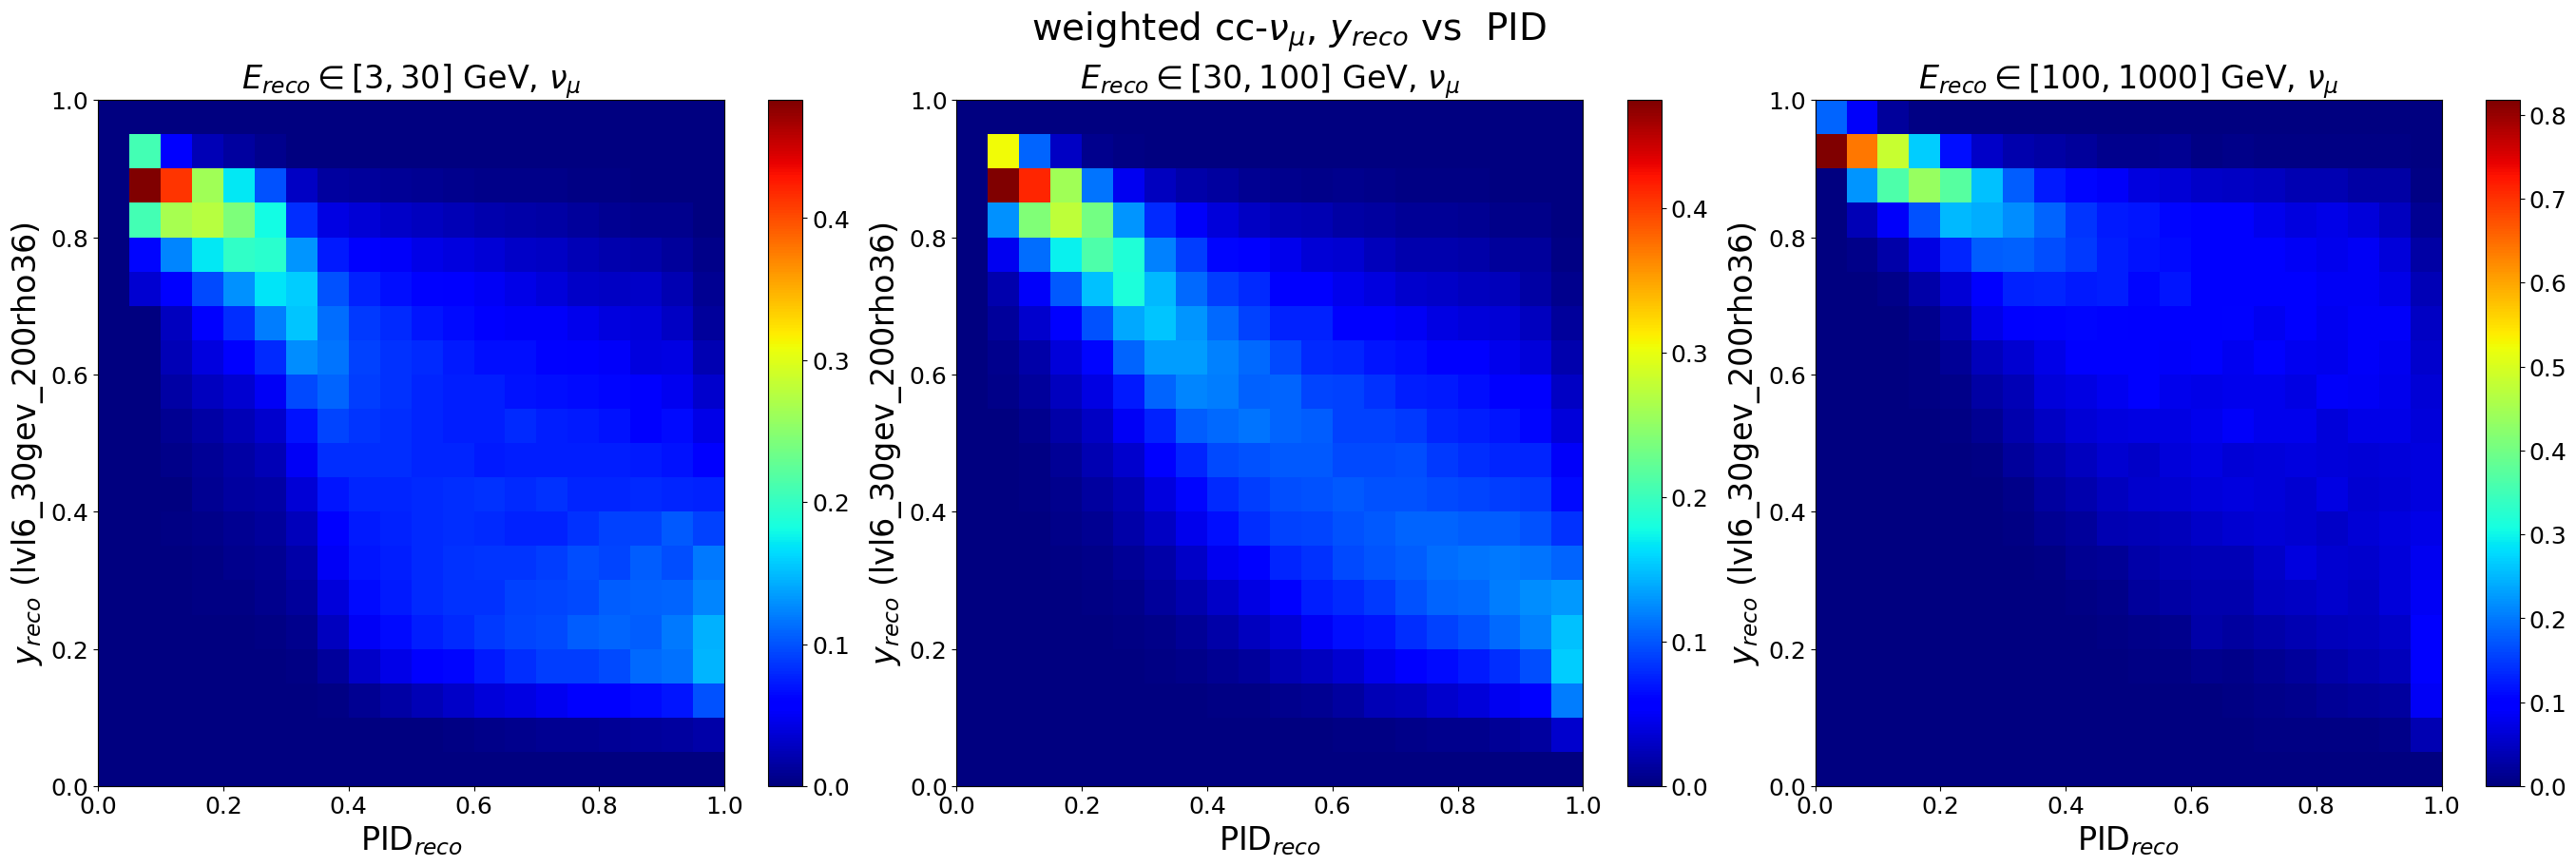

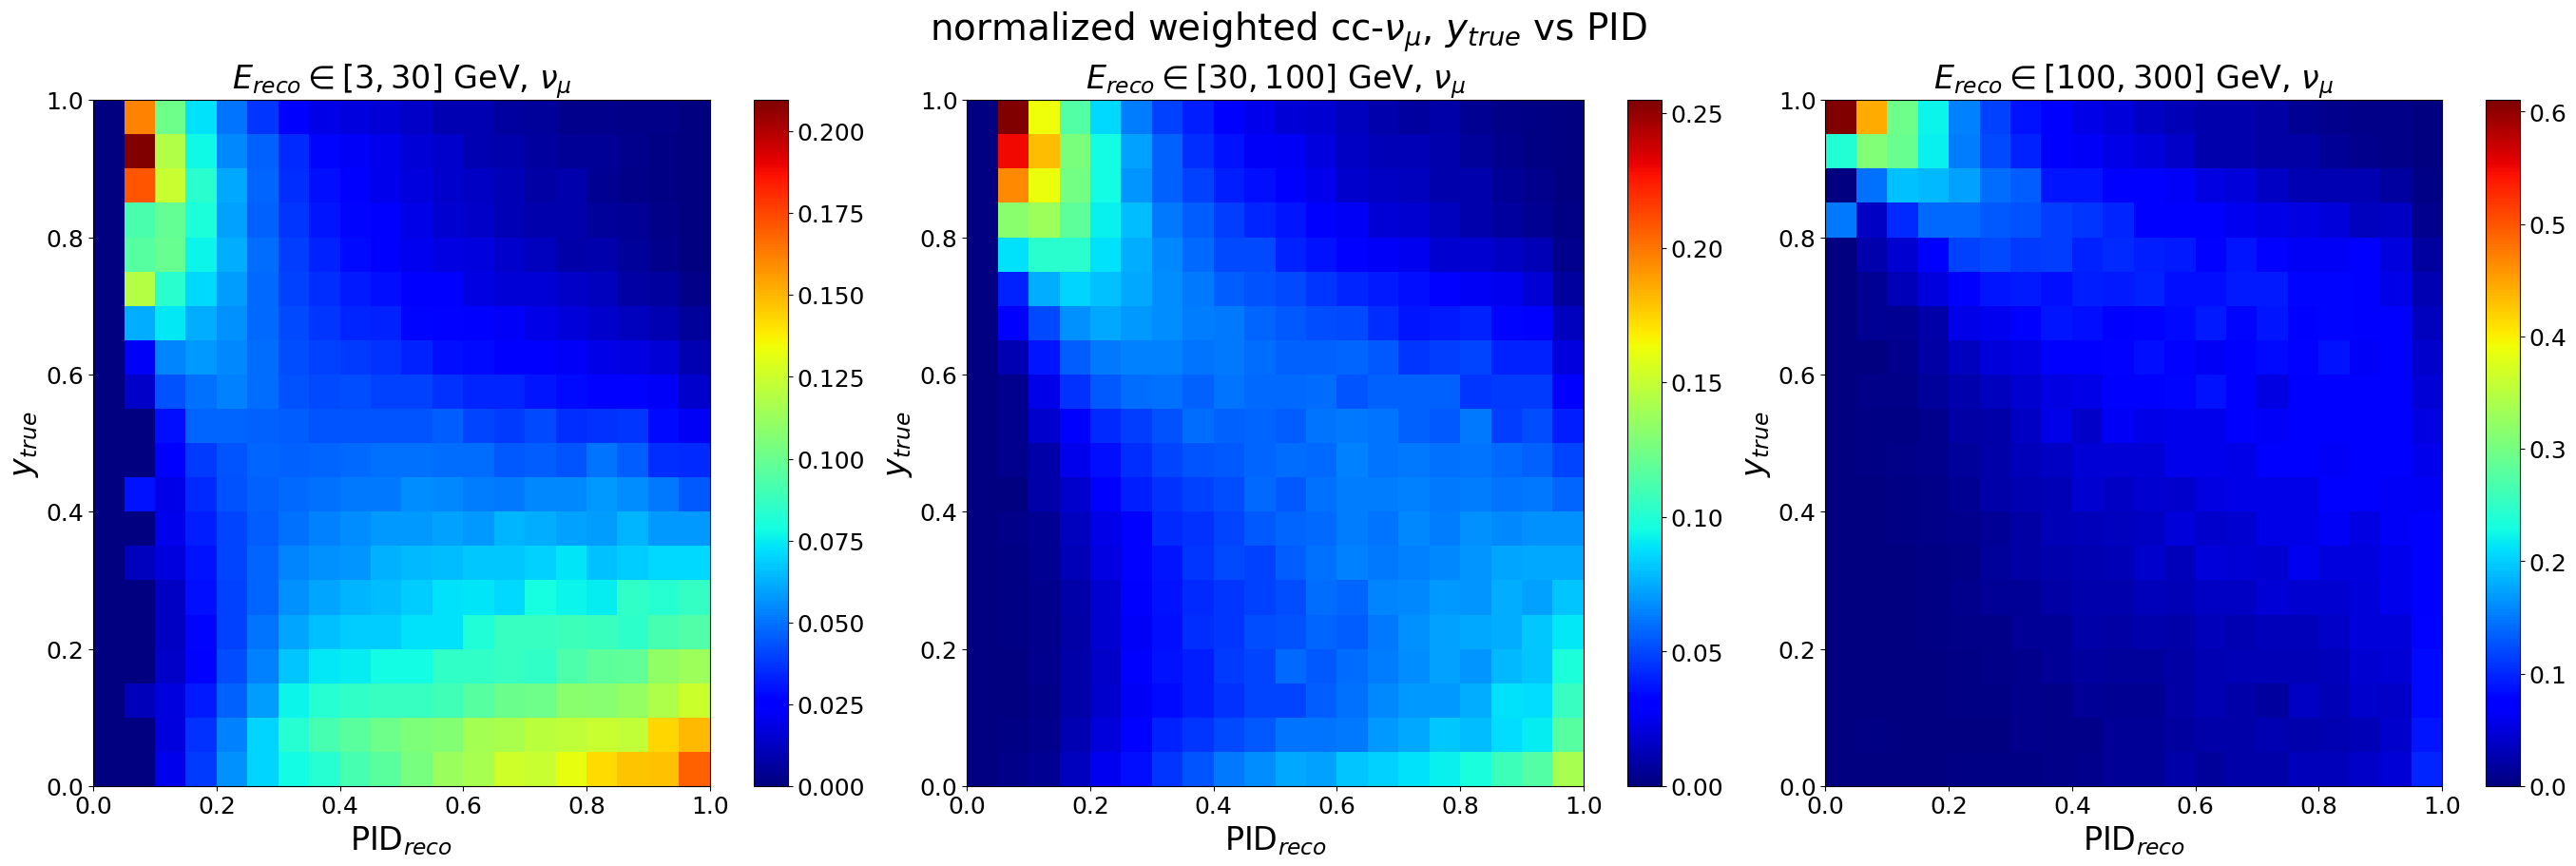

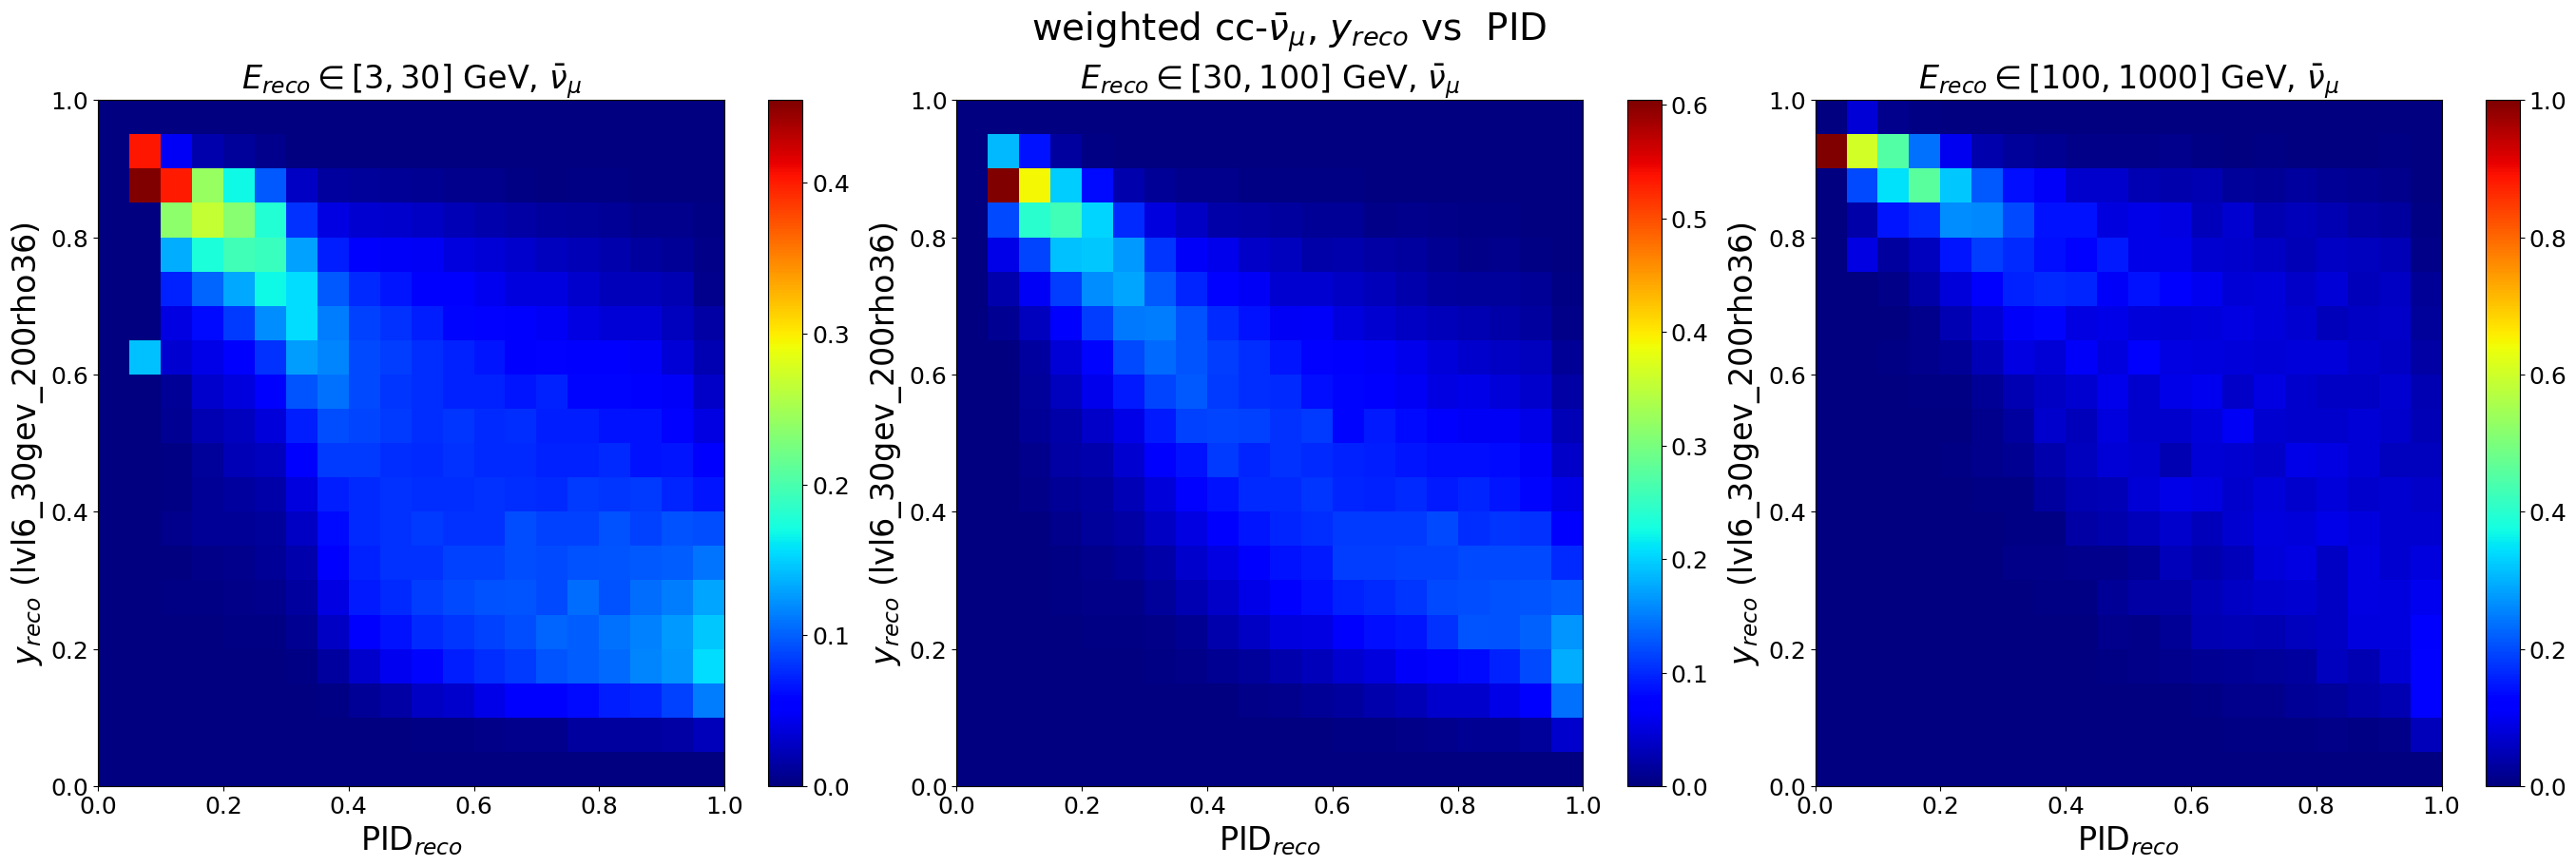

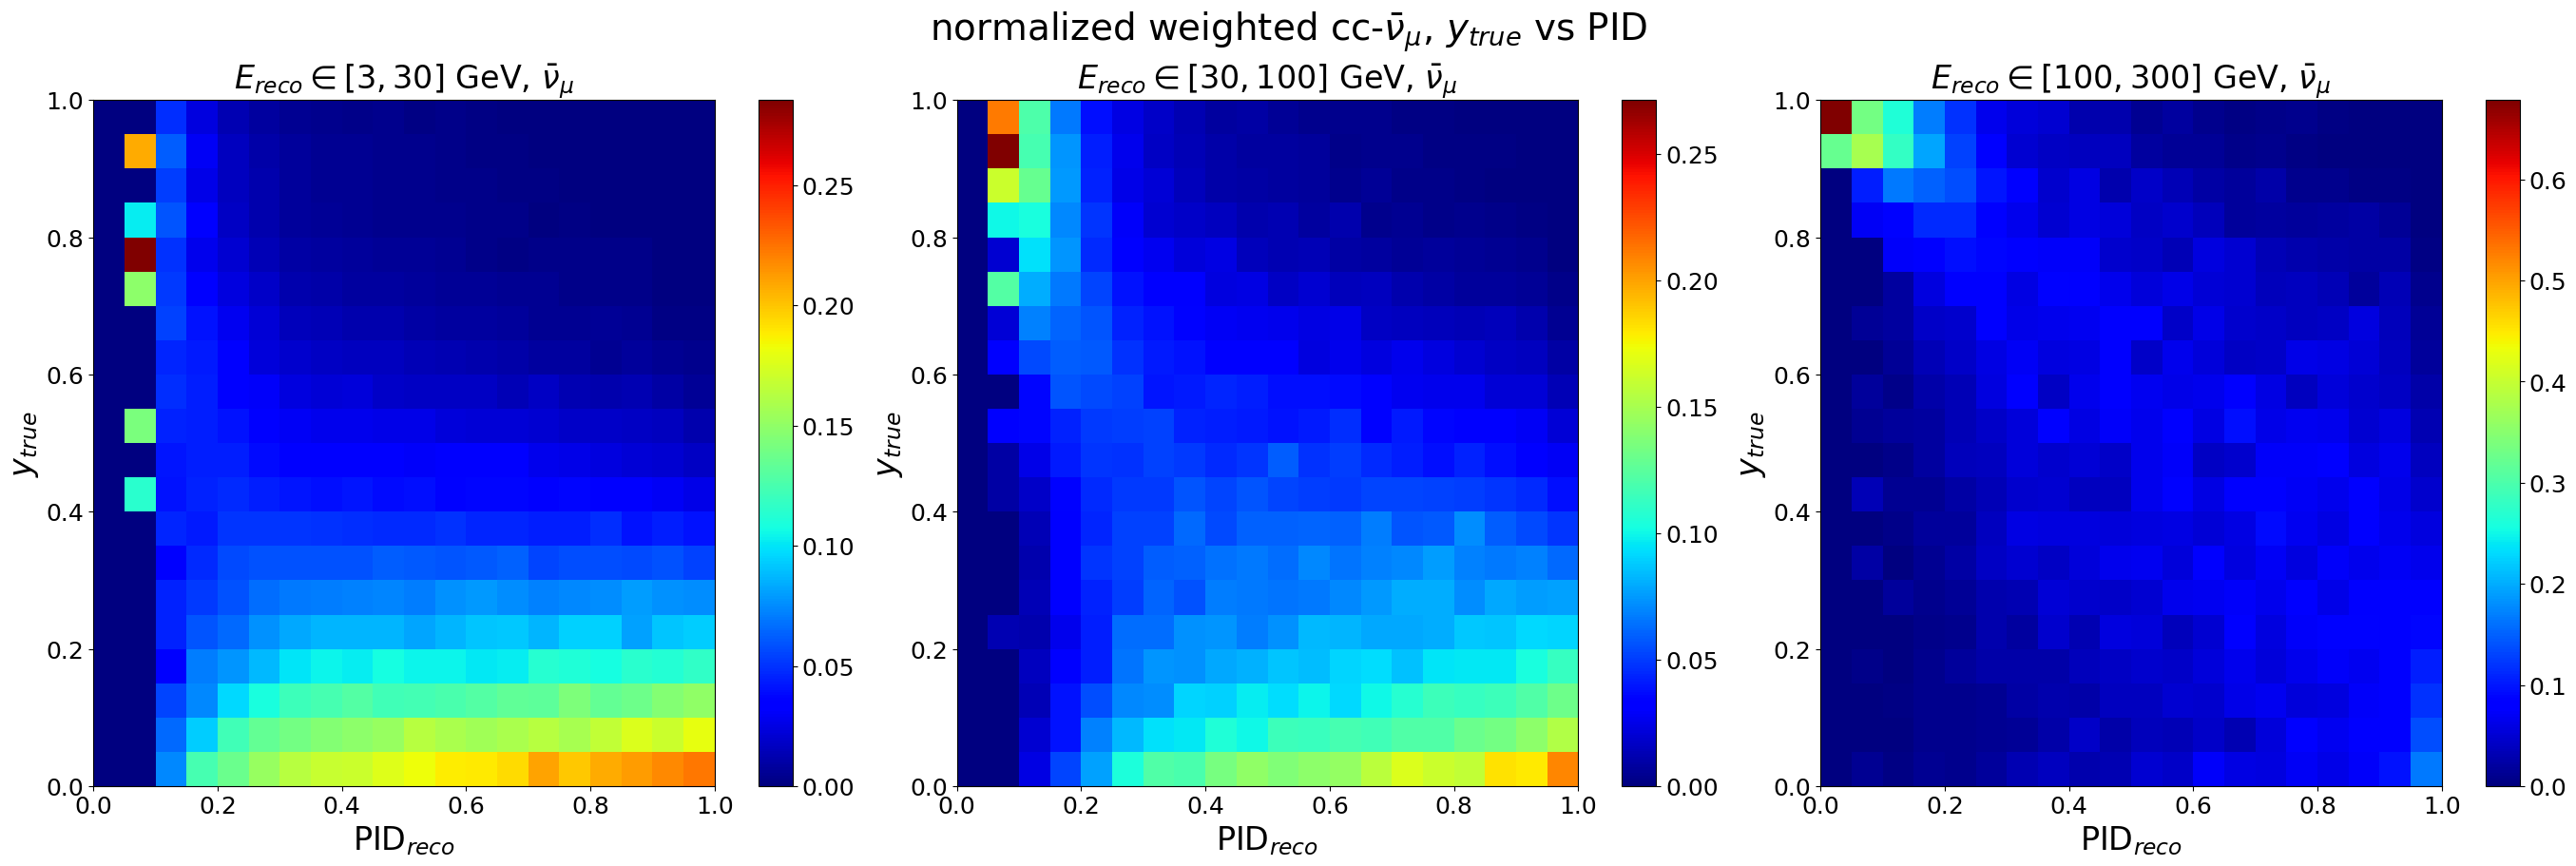

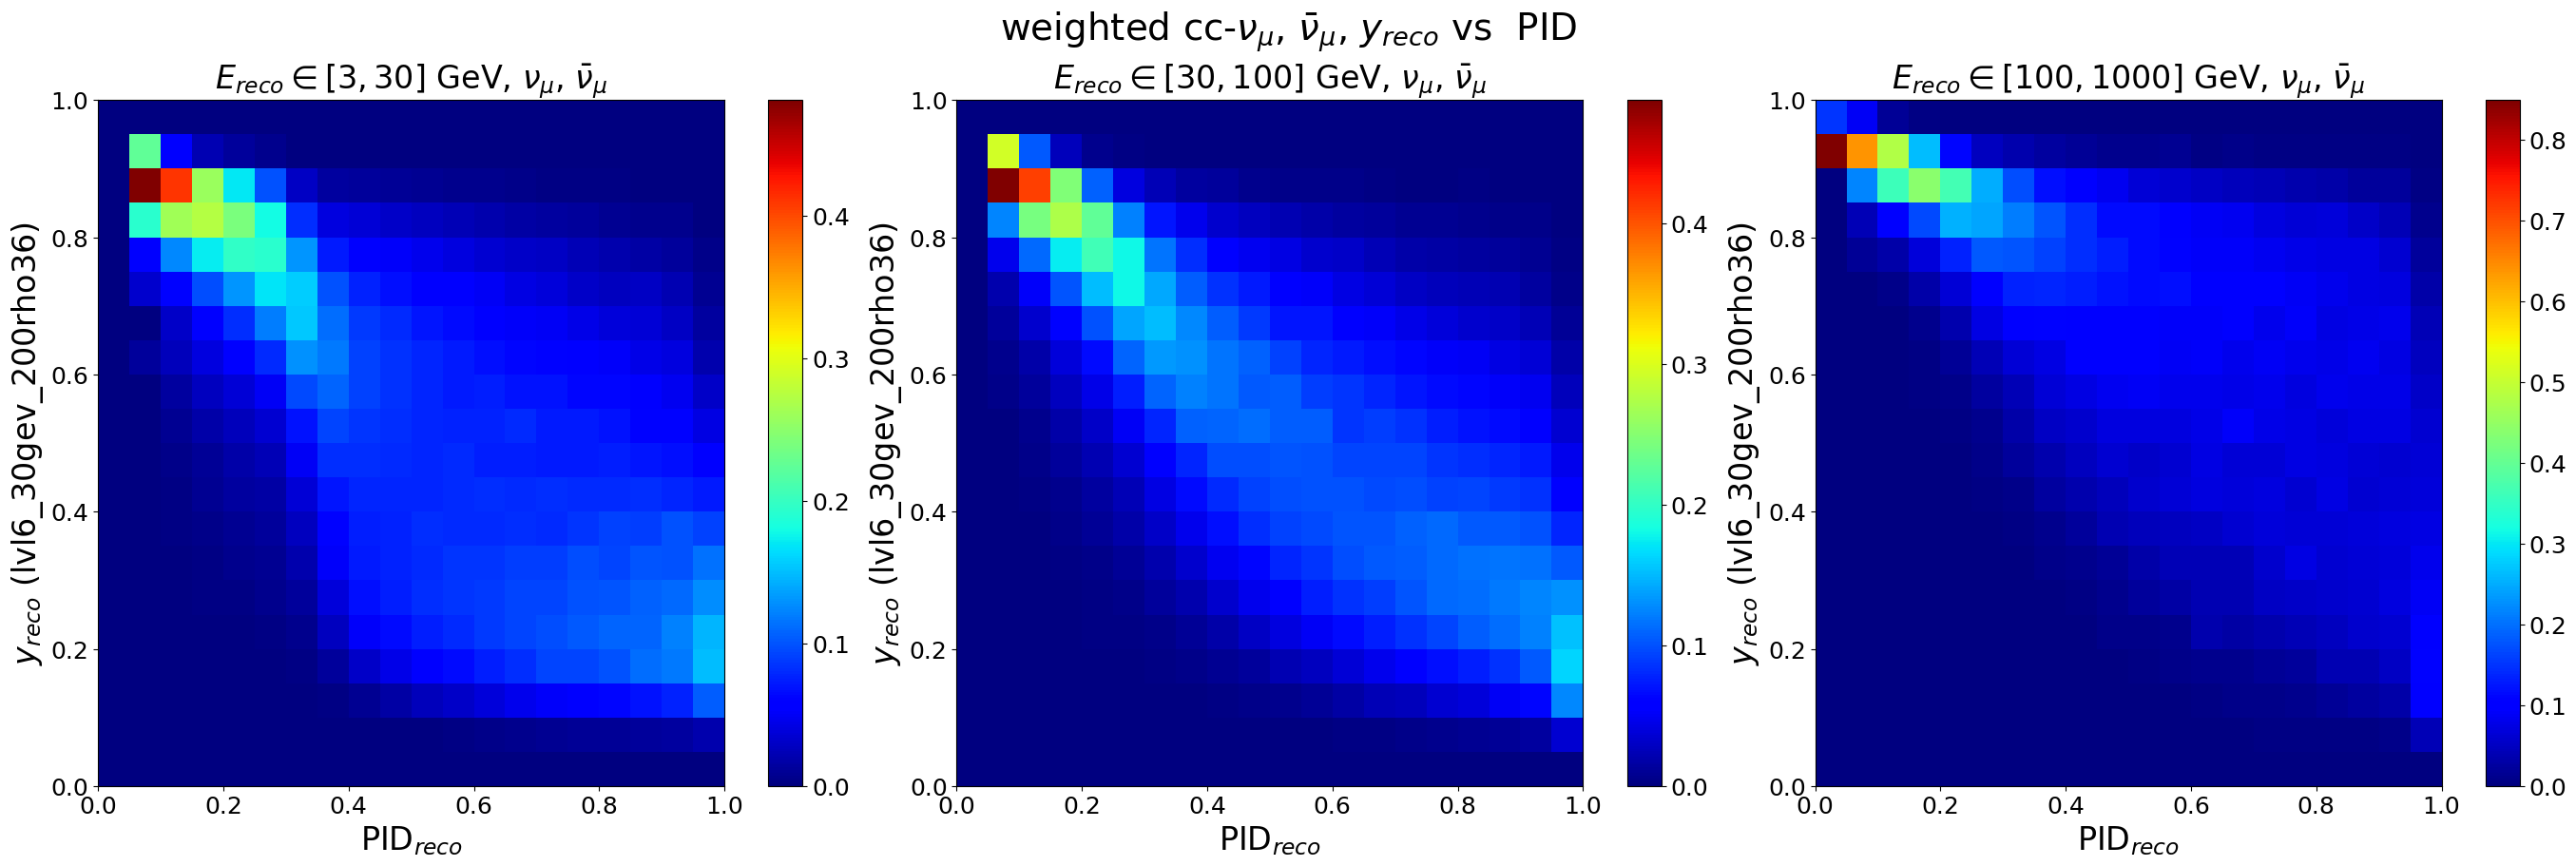

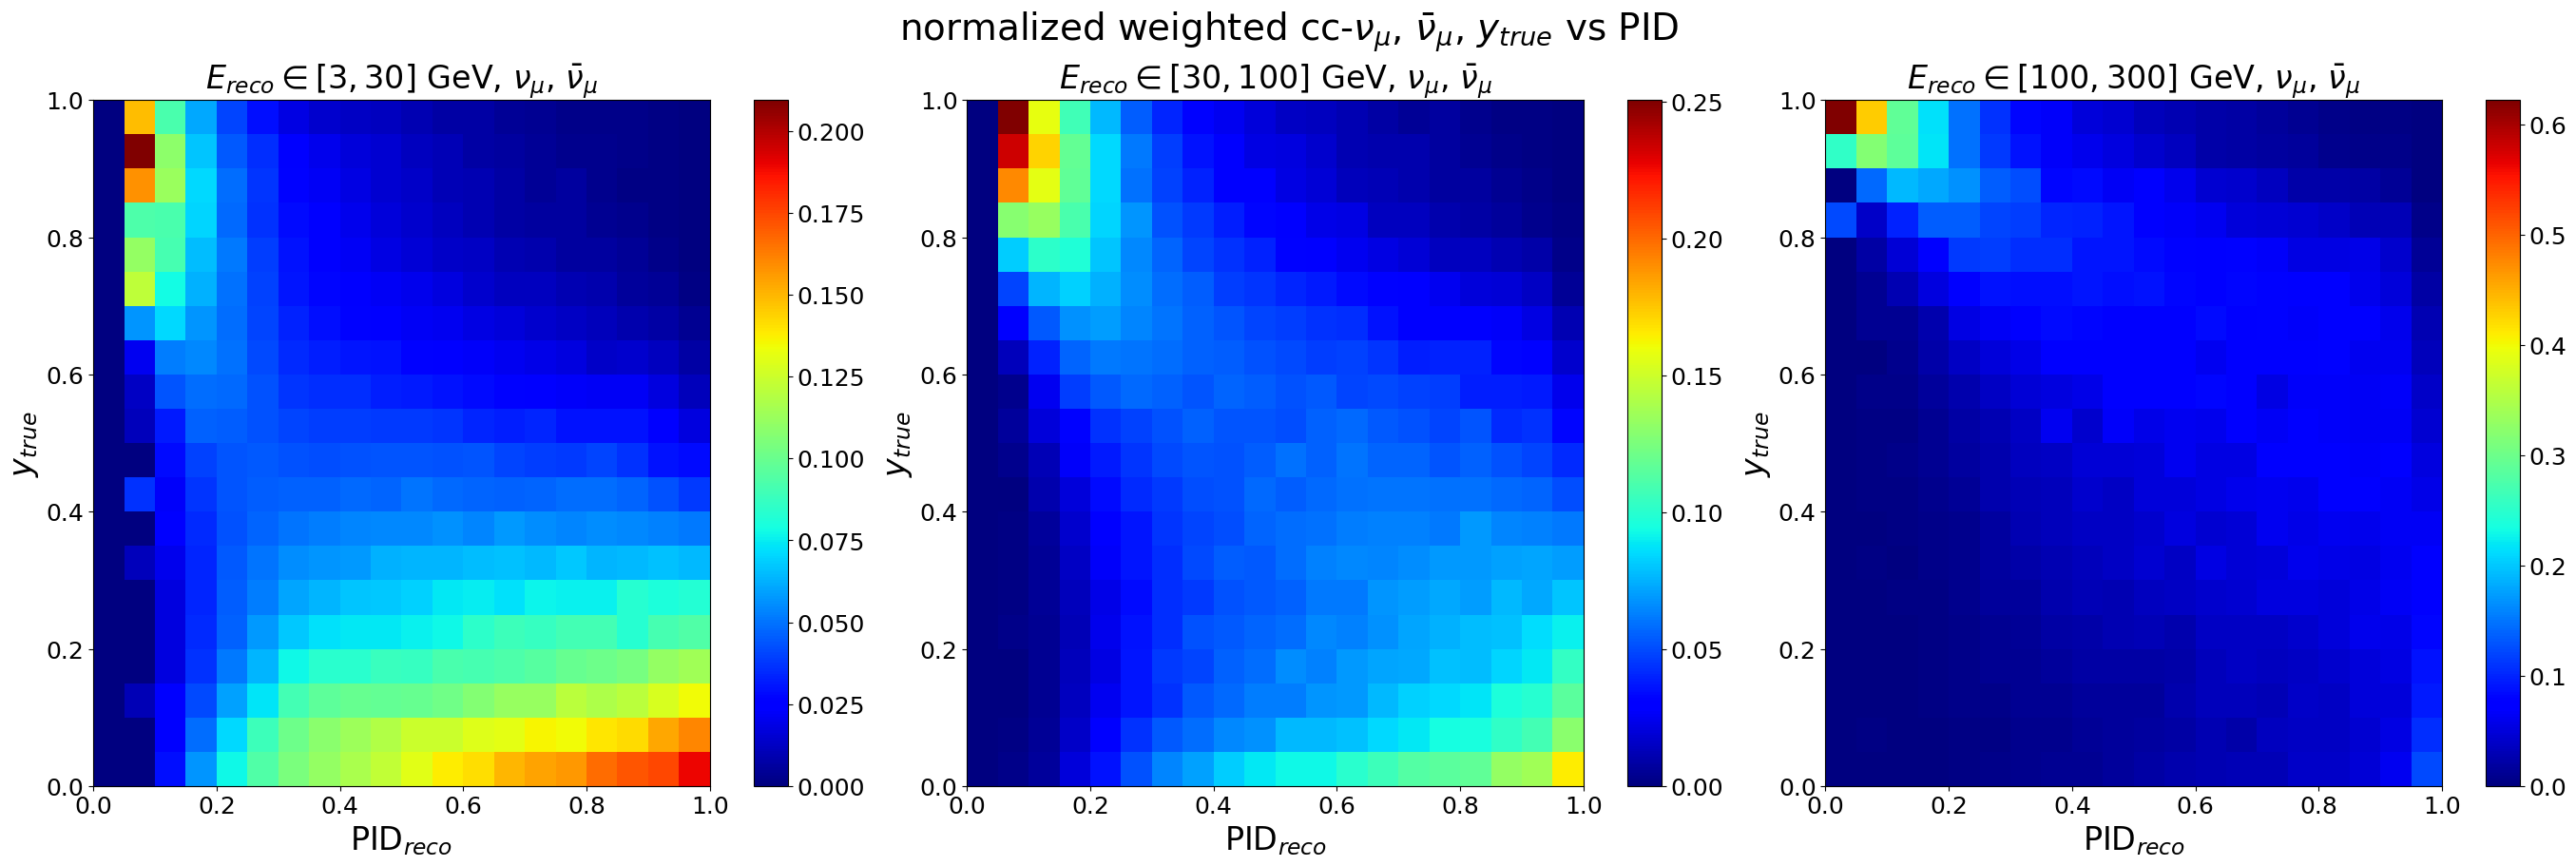

In [19]:
plotflag = True
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

yisnegative=bjorken_y<0

factor = 1
    
if plotflag == True:    
    for i,y in enumerate(ys.values()):
        for j,nu in enumerate(nutype.values()):
            if i==3:
                true_y_low_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                true_y_medium_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                true_y_high_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                    
                reco_y_low_cc=y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                reco_y_medium_cc=y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                reco_y_high_cc=y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                reco_PID_low=reco_PID[is_cc & yispositive & reco_E_islow & nu]
                reco_PID_medium=reco_PID[is_cc & yispositive & reco_E_ismedium & nu]
                reco_PID_high=reco_PID[is_cc & yispositive & reco_E_ishigh & nu]

                weights_low_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_islow*nu]*factor
                weights_medium_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_ismedium*nu]*factor
                weights_high_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_ishigh*nu]*factor  

                weights_low_cc=reweight_truey(weights_low_cc,reco_PID_low,np.linspace(0,1,21))
                weights_medium_cc=reweight_truey(weights_medium_cc,reco_PID_medium,np.linspace(0,1,21))
                weights_high_cc=reweight_truey(weights_high_cc,reco_PID_high,np.linspace(0,1,21))    
                
                #plotsection weighted
    
                fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))
    
                h,_,_,im=ax1.hist2d(reco_PID_low,reco_y_low_cc,bins=[yrange,yrange],
                           cmap=plt.cm.jet,weights=weights_low_cc)
                ax1.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
                if reco==True:
                    ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
                ax1.tick_params(axis='both', which='major', labelsize=18)
                ax1.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax2.hist2d(reco_PID_medium,reco_y_medium_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_medium_cc)
                ax2.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
                if reco==True:
                    ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
                lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
                ax2.tick_params(axis='both', which='major', labelsize=18)
                ax2.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax3.hist2d(reco_PID_high,reco_y_high_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_high_cc)
                ax3.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
                if reco==True:
                    ax3.set_title(r'$E_{{reco}} \in [100,1000]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
                lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
                ax3.tick_params(axis='both', which='major', labelsize=18)
                ax3.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                plt.savefig('Inelast_Plots/PID_Phasespace/norm_PID_vs_yreco_y{y}_numu{nu}.png'.format(y=i,nu=j),bbox_inches='tight')
                fig.suptitle(r'normalized weighted cc-{nu}, $y_{{reco}}$ vs  PID'.format(nu=nulabel[j]),fontsize=28)
                weightname = 'weighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
                '''
                if reco==True:
                    plt.savefig("Inelast_Plots/Inelast/recoE_"+weightname,bbox_inches='tight')
                else:
                    plt.savefig("Inelast_Plots/Inelast/"+weightname,bbox_inches='tight')
                '''
                plt.show()
    
                #plotsection weighted
    
                fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))
    
                h,_,_,im=ax1.hist2d(reco_PID_low,true_y_low_cc,bins=[yrange,yrange],
                           cmap=plt.cm.jet,weights=weights_low_cc)
                ax1.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax1.set_ylabel(r'$y_{{true}}$',fontsize=24)
                if reco==True:
                    ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)   
                ax1.tick_params(axis='both', which='major', labelsize=18)
                ax1.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax2.hist2d(reco_PID_medium,true_y_medium_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_medium_cc)
                ax2.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax2.set_ylabel('$y_{{true}}$',fontsize=24)
                if reco==True:
                    ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)          
                ax2.tick_params(axis='both', which='major', labelsize=18)
                ax2.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                h,_,_,im=ax3.hist2d(reco_PID_high,true_y_high_cc,bins=[yrange,yrange],
                                    cmap=plt.cm.jet,weights=weights_high_cc)
                ax3.set_xlabel(r'PID$_{reco}$',fontsize=24)
                ax3.set_ylabel('$y_{{true}}$',fontsize=24)
                if reco==True:
                    ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)      
                ax3.tick_params(axis='both', which='major', labelsize=18)
                ax3.tick_params(axis='both', which='minor', labelsize=18)
                cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=18)
                cb.ax.yaxis.get_offset_text().set_fontsize(18)
                
                fig.suptitle(r'normalized weighted cc-{nu}, $y_{{true}}$ vs PID'.format(nu=nulabel[j]),fontsize=28)
                plt.show()

# PISA hdf5

In [20]:
pisahdf_filenames ={'0000':'oscNext_pisa_genie_0000_flercnn_plus.hdf5',
                    '1122':'oscNext_pisa_genie_1122_flercnn_plus.hdf5',
                    '1151':'oscNext_pisa_genie_1151_flercnn_plus.hdf5',
                    '1154':'oscNext_pisa_genie_1154_flercnn_plus.hdf5',
                    '121151':'FLERCNN_plus_121151.h5',
                    '141154':'FLERCNN_plus_141154.h5',
                    '161151':'FLERCNN_plus_161151.h5'
                   }

#1151 contains muons neutrinos
#1154 muon neutrinos + GEANT4
#FLERCNN_plus = old
#oscNext_pisa_genie = new

In [21]:
pisa_inel_mu = hdf.File(folder+pisahdf_filenames['1154'],'r')['numu']

In [22]:
pisa_inel_mu.keys()

<KeysViewHDF5 ['CNN2D_reco_PID.CNN2D_PID_prob_t', 'CNN2D_reco_y.CNN2D_beta_lvl3_30gev_100rho36', 'CNN2D_reco_y.CNN2D_beta_lvl3_5gev_100rho36', 'CNN2D_reco_y.CNN2D_y_lvl3_30gev_100rho36', 'CNN2D_reco_y.CNN2D_y_lvl3_5gev_100rho36', 'CNN2D_reco_y.CNN2D_y_lvl6_30gev_200rho36', 'CNN2D_reco_y.CNN2D_y_lvl6_5gev_200rho36', 'FLERCNN_BDT_ProbNu', 'FLERCNN_coszen', 'FLERCNN_energy', 'FLERCNN_nDOM', 'FLERCNN_plus_bdt_PID', 'FLERCNN_plus_bdt_y', 'FLERCNN_prob_muon_v3', 'FLERCNN_prob_nu', 'FLERCNN_prob_track', 'FLERCNN_vertex_rho36', 'FLERCNN_vertex_x', 'FLERCNN_vertex_y', 'FLERCNN_vertex_z', 'GENIEWeight', 'GENIE_linear_fit_AhtBY', 'GENIE_linear_fit_BhtBY', 'GENIE_linear_fit_CV1uBY', 'GENIE_linear_fit_CV2uBY', 'GENIE_linear_fit_MaCCQE', 'GENIE_linear_fit_MaCCRES', 'GENIE_linear_fit_MaCOHpi', 'GENIE_linear_fit_MaNCEL', 'GENIE_linear_fit_MaNCRES', 'GENIE_quad_fit_AhtBY', 'GENIE_quad_fit_BhtBY', 'GENIE_quad_fit_CV1uBY', 'GENIE_quad_fit_CV2uBY', 'GENIE_quad_fit_MaCCQE', 'GENIE_quad_fit_MaCCRES', 'GENIE

In [23]:
FLERCNN_vars = {'reco_coszen':'FLERCNN_coszen',
                'reco_energy':'FLERCNN_energy',
                'BDT_PID':'FLERCNN_plus_bdt_PID',
                'PID':'FLERCNN_prob_track',
                'weighted_aeff':'weighted_aeff',
                'livetime':'data_livetime',
                'ReferenceWeight':'ReferenceWeight',
                'true_energy':'MCInIcePrimary.energy',
                'pdg_code':'MCInIcePrimary.pdg_encoding',
                'BDT_y':'FLERCNN_plus_bdt_y',
                'bjorken_y':'I3GENIEResultDict.y',
                'true_rho36':'MCExtraTruthInfo.vertex_rho36',
                'true_coszen':'MCInIcePrimary.dir.coszen',
                'is_cc':'I3GENIEResultDict.cc',
                'is_nc':'I3GENIEResultDict.nc',
                'dis':'I3GENIEResultDict.dis',
                'interaction':'I3MCWeightDict.InteractionType',
}

CNN2D_vars = {'CNN2D_PID':'CNN2D_reco_PID.CNN2D_PID_prob_t',
              'new_lvl3_30gev_100rho':'CNN2D_reco_y.CNN2D_beta_lvl3_30gev_100rho36',
              'new_lvl3_5gev_100rho':'CNN2D_reco_y.CNN2D_beta_lvl3_5gev_100rho36',
              'old_lvl3_30gev_100rho':'CNN2D_reco_y.CNN2D_y_lvl3_30gev_100rho36',
              'old_lvl6_30gev_200rho':'CNN2D_reco_y.CNN2D_y_lvl6_30gev_200rho36',
              'old_lvl3_5gev_100rho':'CNN2D_reco_y.CNN2D_y_lvl3_5gev_100rho36',
              'old_lvl6_5gev_200rho':'CNN2D_reco_y.CNN2D_y_lvl6_5gev_200rho36',
}

Cuts_vars = {
    'reco_z':'FLERCNN_vertex_z',
    'reco_rho':'FLERCNN_vertex_rho36',
    'L7_CoincidentMuon_Variables.n_top15':'L7_CoincidentMuon_Variables.n_top15',
    'L7_CoincidentMuon_Variables.n_outer':'L7_CoincidentMuon_Variables.n_outer',
    'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms':'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms',
    'nDOM':'FLERCNN_nDOM',
    'l7_muon_classifier_prob_nu':'FLERCNN_BDT_ProbNu',
}

def GetCuts(group):
    z = group[Cuts_vars['reco_z']][:]
    rho = group[Cuts_vars['reco_rho']][:]
    ntop15 = group[Cuts_vars['L7_CoincidentMuon_Variables.n_top15']][:]
    nouter = group[Cuts_vars['L7_CoincidentMuon_Variables.n_outer']][:]
    nhitdoms = group[Cuts_vars['L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms']][:]
    ndom = group[Cuts_vars['nDOM']][:]
    probnu = group[Cuts_vars['l7_muon_classifier_prob_nu']][:]
    
    return ((z > -495.) & (z < -225.) &  (rho < 200) & (ntop15 < 0.5) & 
            (nouter < 7.5) & (nhitdoms > 2.5) & (ndom >= 7) & (probnu >= 0.8))

# new vs old files check

In [24]:
AnalysisCuts = GetCuts(pisa_inel_mu)

In [25]:
for name,var in zip(pisa_inel_mu.keys(),pisa_inel_mu.values()):
    dontplot=True
    if dontplot:
        continue
    if not len(var[AnalysisCuts]):
        continue
    if np.isnan(var[AnalysisCuts]).any():
        continue
    plt.hist(var[AnalysisCuts],bins=20,histtype='step');
    plt.title(name)
    plt.show()

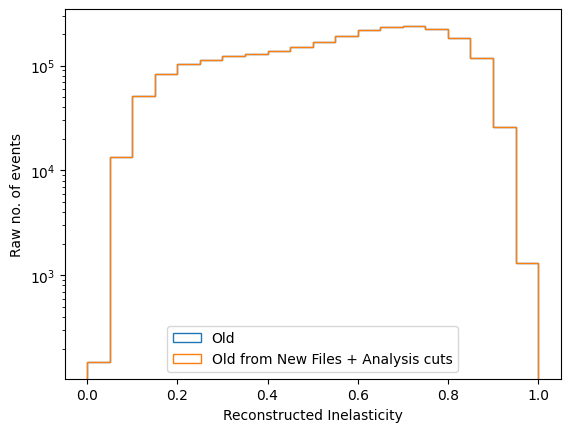

In [26]:
bins=np.linspace(0,1,21)
a=plt.hist(hdf_inel_mu['CNN2D_y_lvl6_30gev_200rho36'][1:],bins,histtype='step',label='Old')
b=plt.hist(pisa_inel_mu[CNN2D_vars['old_lvl6_30gev_200rho']][AnalysisCuts],bins,histtype='step',label='Old from New Files + Analysis cuts')
plt.yscale('log')
plt.ylabel('Raw no. of events')
plt.xlabel('Reconstructed Inelasticity')
plt.legend()
plt.savefig('Inelast_Plots/reco_y_verification.png')

In [27]:
(len(pisa_inel_mu[FLERCNN_vars['reco_energy']][AnalysisCuts]),len(hdf_inel_mu['reco_energy'][1:]),
len(pisa_inel_mu[FLERCNN_vars['reco_energy']][AnalysisCuts])-len(hdf_inel_mu['reco_energy'][1:]))

(2504959, 2504959, 0)

In [28]:
a[0],b[0],(a[0]-b[0])

(array([1.49000e+02, 1.35290e+04, 5.10450e+04, 8.24300e+04, 1.02623e+05,
        1.14198e+05, 1.22554e+05, 1.28803e+05, 1.36745e+05, 1.49285e+05,
        1.67338e+05, 1.91353e+05, 2.17612e+05, 2.35431e+05, 2.39527e+05,
        2.22321e+05, 1.84779e+05, 1.17897e+05, 2.60220e+04, 1.31800e+03]),
 array([1.49000e+02, 1.35290e+04, 5.10450e+04, 8.24300e+04, 1.02623e+05,
        1.14198e+05, 1.22554e+05, 1.28803e+05, 1.36745e+05, 1.49285e+05,
        1.67338e+05, 1.91353e+05, 2.17612e+05, 2.35431e+05, 2.39527e+05,
        2.22321e+05, 1.84779e+05, 1.17897e+05, 2.60220e+04, 1.31800e+03]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

# Improved vs Old variables

## Inelasticity + BDT_y

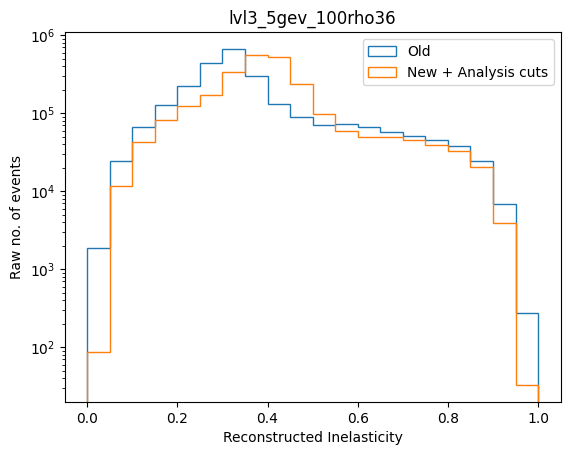

In [29]:
bins=np.linspace(0,1,21)
a=plt.hist(hdf_inel_mu['CNN2D_y_lvl3_5gev_100rho36'][:],bins,histtype='step',label='Old')
b=plt.hist(pisa_inel_mu[CNN2D_vars['new_lvl3_5gev_100rho']][AnalysisCuts],bins,histtype='step',label='New + Analysis cuts')
plt.yscale('log')
plt.ylabel('Raw no. of events')
plt.xlabel('Reconstructed Inelasticity')
plt.legend()
plt.title('lvl3_5gev_100rho36')
plt.savefig('Inelast_Plots/reco_y_new.png')

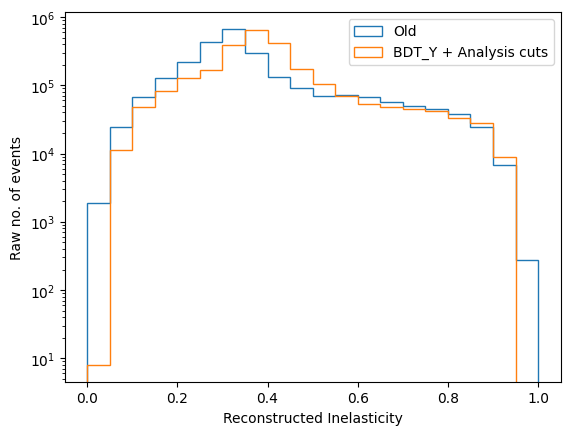

In [30]:
bins=np.linspace(0,1,21)
a=plt.hist(hdf_inel_mu['CNN2D_y_lvl3_5gev_100rho36'][:],bins,histtype='step',label='Old')
b=plt.hist(pisa_inel_mu[FLERCNN_vars['BDT_y']][AnalysisCuts],bins,histtype='step',label='BDT_Y + Analysis cuts')
plt.yscale('log')
plt.ylabel('Raw no. of events')
plt.xlabel('Reconstructed Inelasticity')
plt.legend()
plt.savefig('Inelast_Plots/reco_y_bdt.png')

In [31]:
ys_3={'3_old':pisa_inel_mu[CNN2D_vars['old_lvl3_5gev_100rho']][:],
      '3_new':pisa_inel_mu[CNN2D_vars['new_lvl3_5gev_100rho']][:],
      'bdt_y':pisa_inel_mu[FLERCNN_vars['BDT_y']][:]}
ys_30={'3_old':pisa_inel_mu[CNN2D_vars['old_lvl3_30gev_100rho']][:],
      '3_new':pisa_inel_mu[CNN2D_vars['new_lvl3_30gev_100rho']][:],
      'bdt_y':pisa_inel_mu[FLERCNN_vars['BDT_y']][:]}
yname=['lvl3_5gev_100rho36','lvl3_5gev_100rho36 (beta)','BDT_y']
yname1=['lvl3_30gev_100rho36','lvl3_30gev_100rho36 (beta)','BDT_y']

nus = pisa_inel_mu[FLERCNN_vars['pdg_code']][:]>0
nubars = pisa_inel_mu[FLERCNN_vars['pdg_code']][:]<0

nutype={'numu':nus,
        'numubar':nubars,
        'bothnumu':nus+nubars}
nulabel=[r'$\nu_\mu$',r'$\bar{\nu}_\mu$',r'$\nu_\mu$, $\bar{\nu}_\mu$']

In [32]:
reco_E = pisa_inel_mu[FLERCNN_vars['reco_energy']][:]
true_E = pisa_inel_mu[FLERCNN_vars['true_energy']][:]
is_cc = pisa_inel_mu[FLERCNN_vars['interaction']][:]==1
trueypos = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]>0

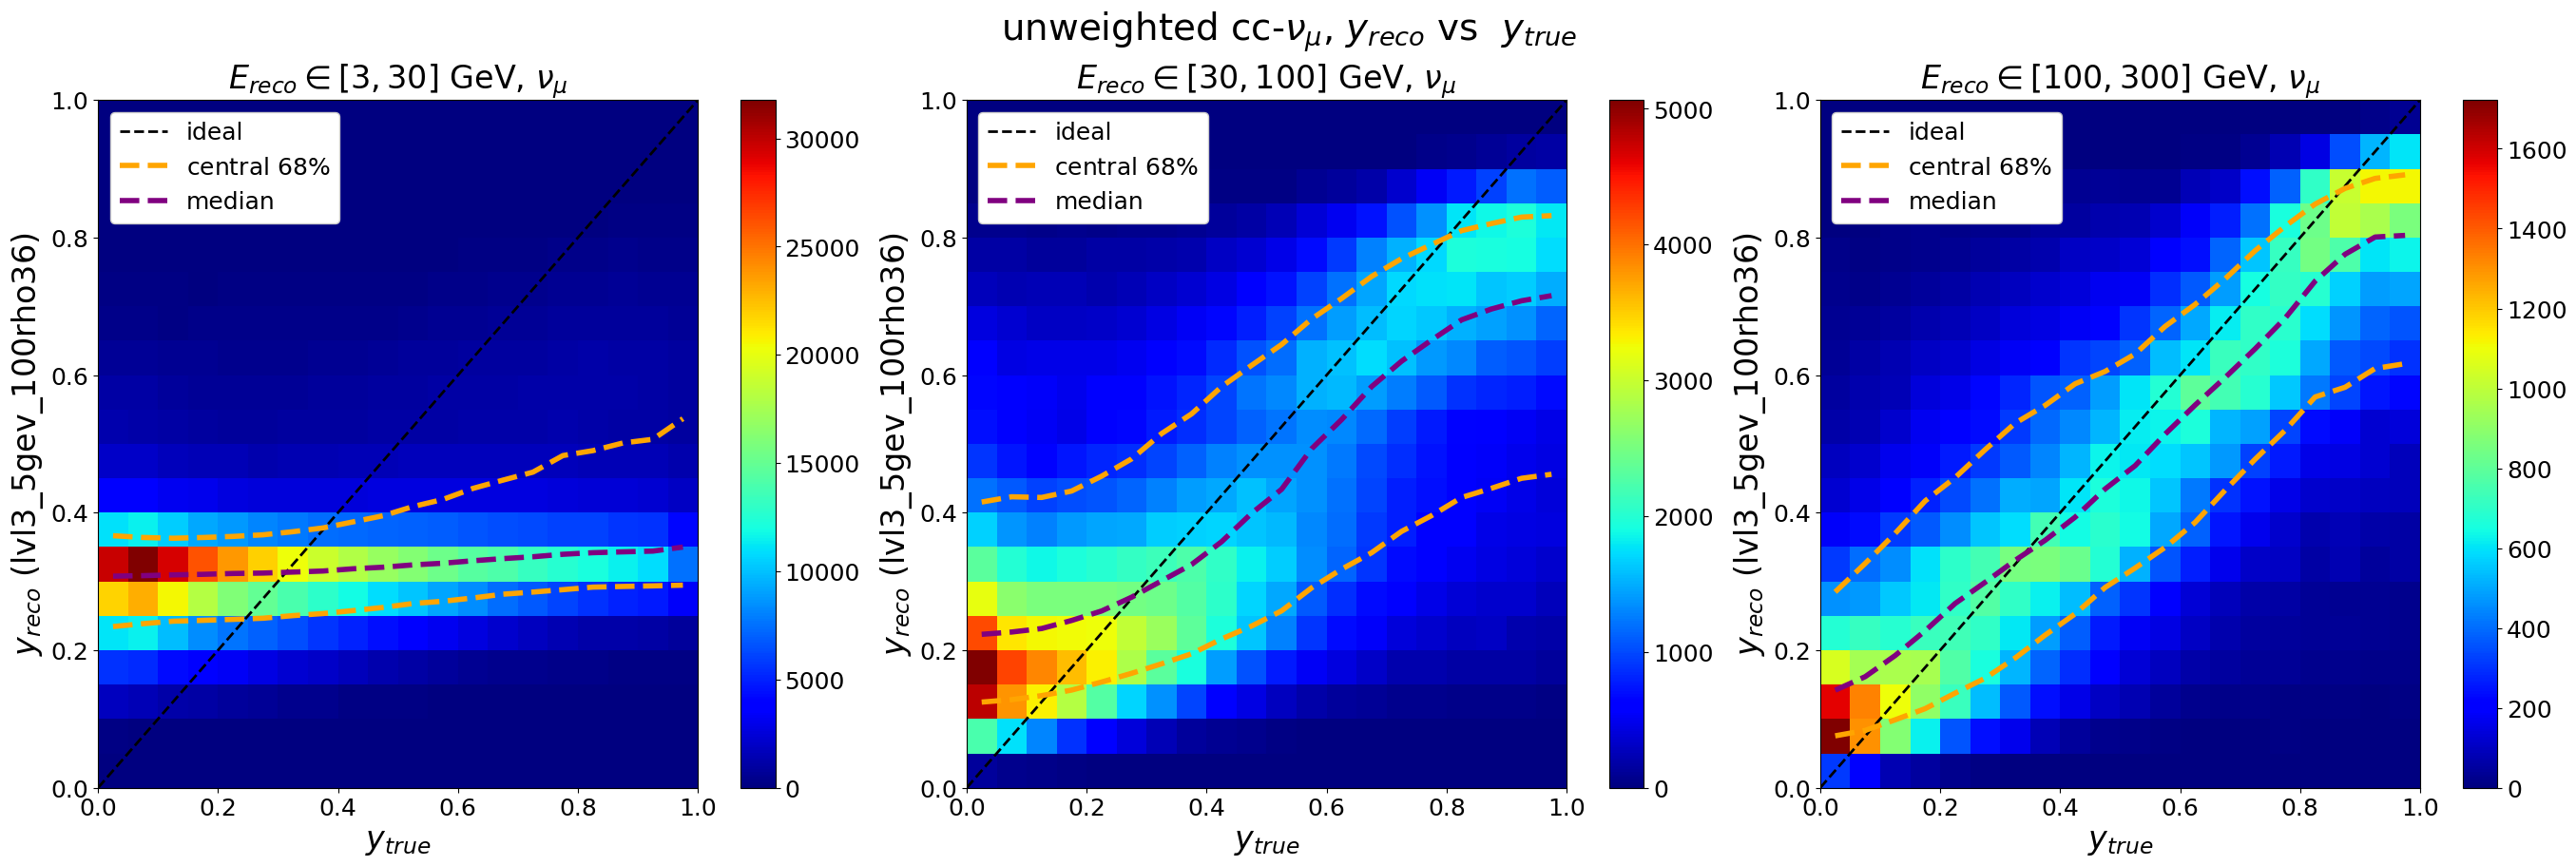

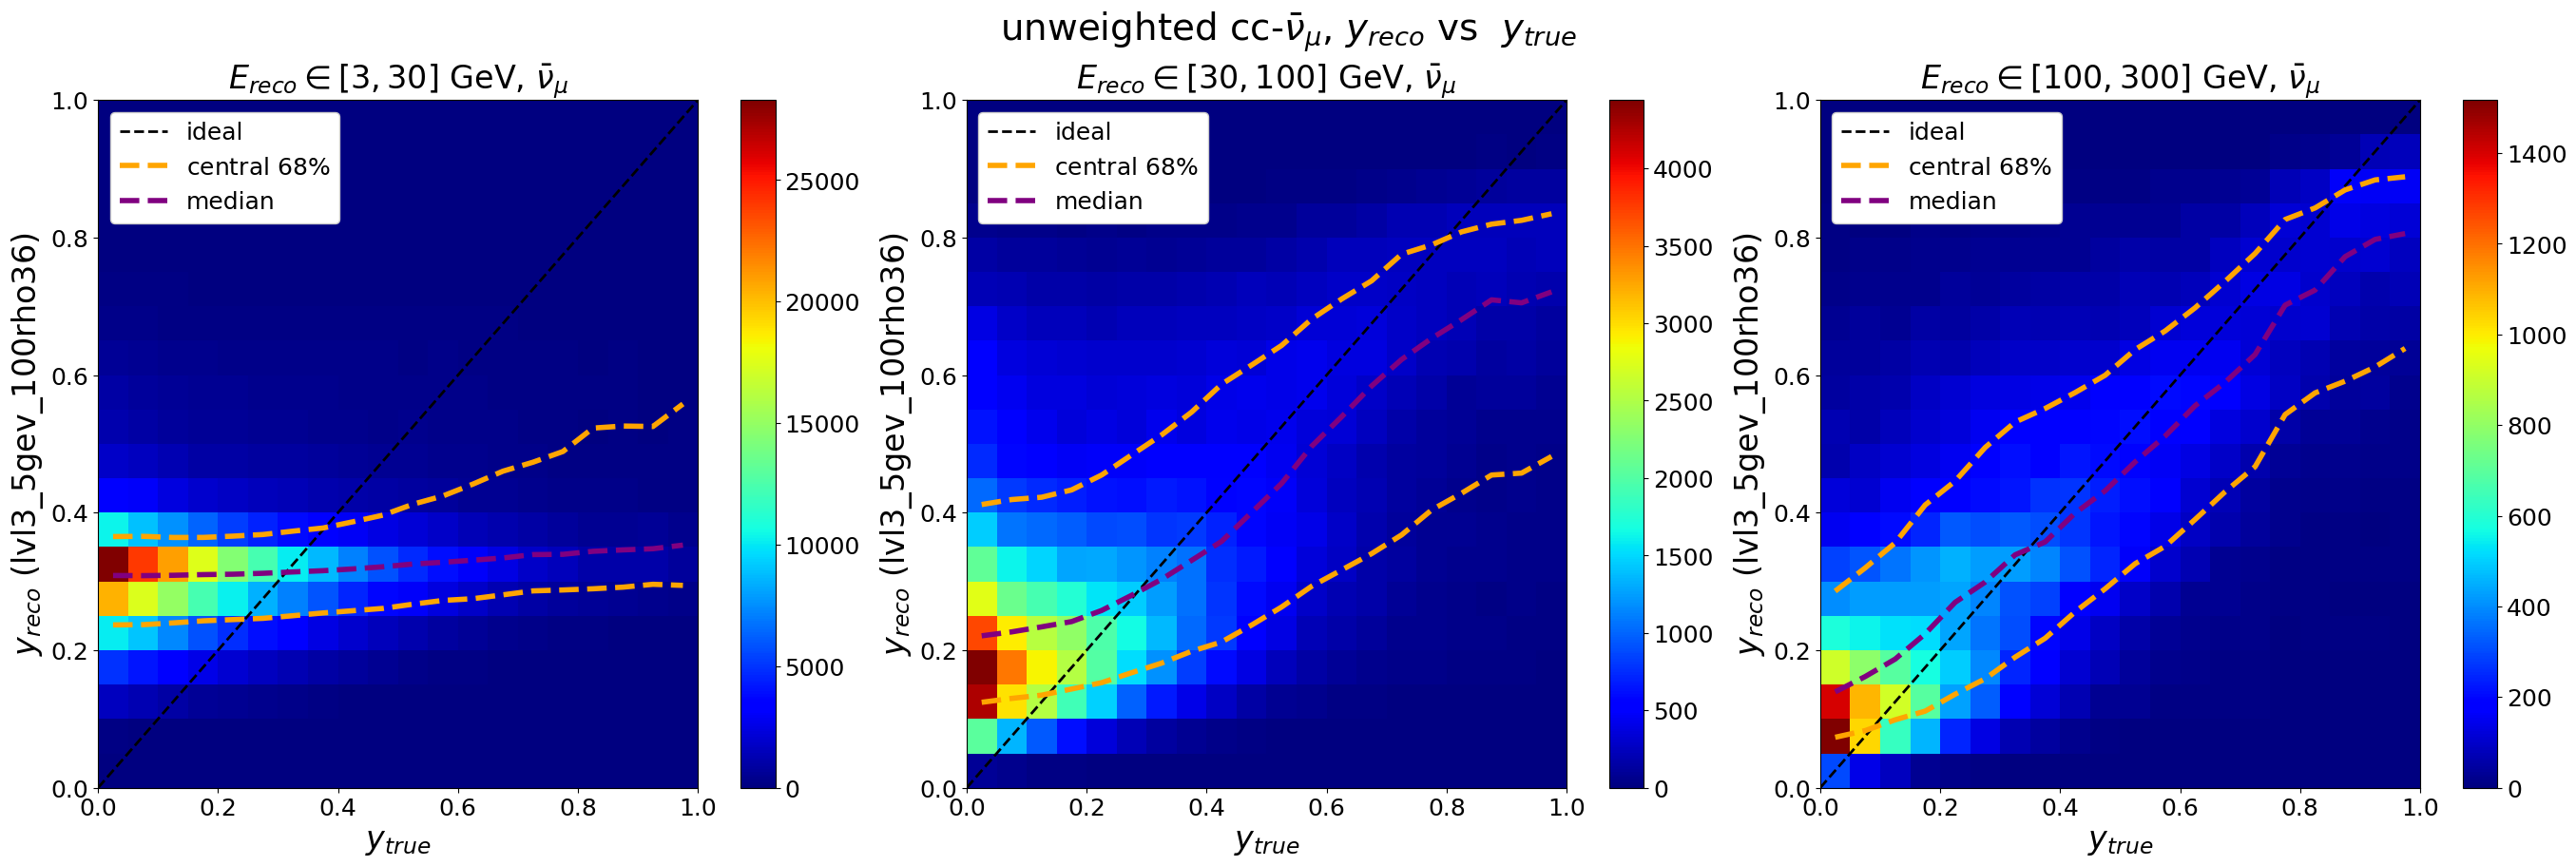

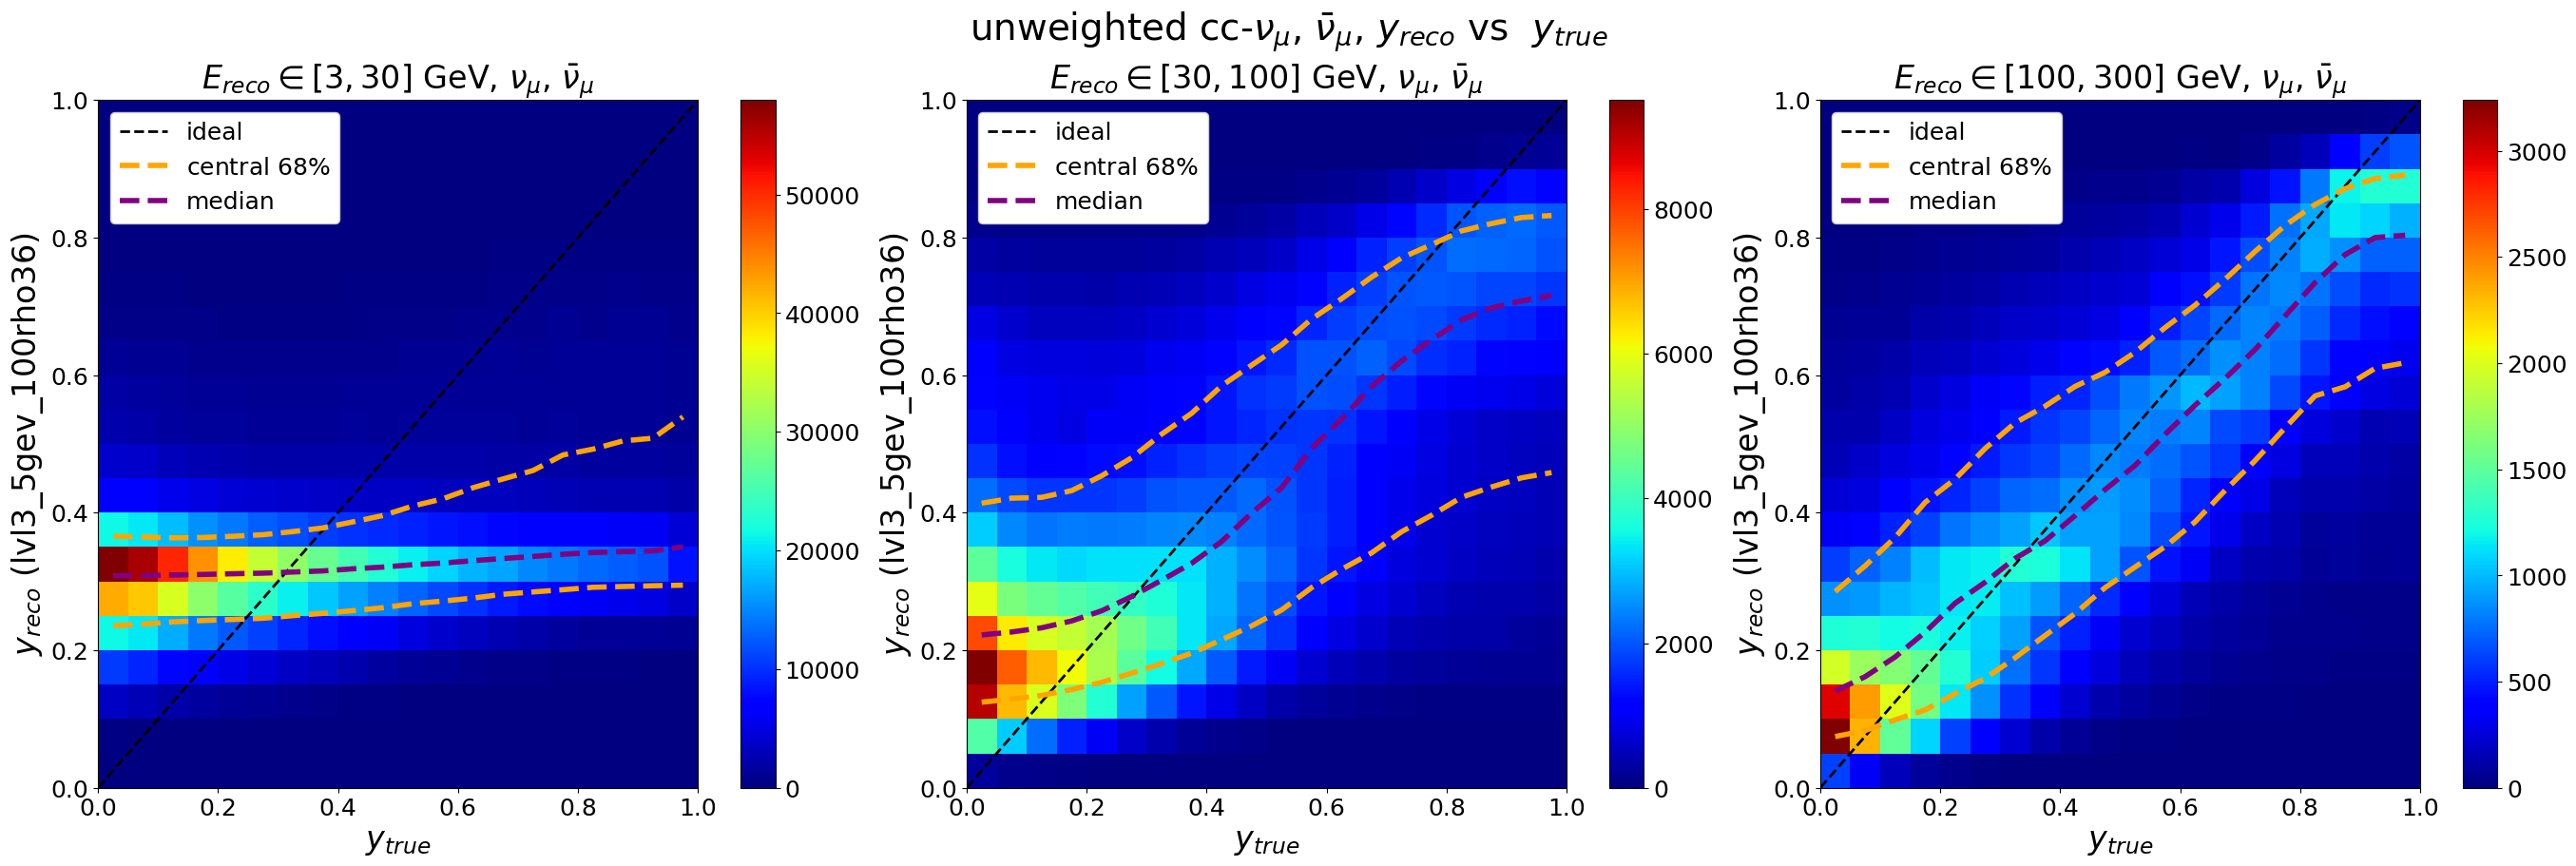

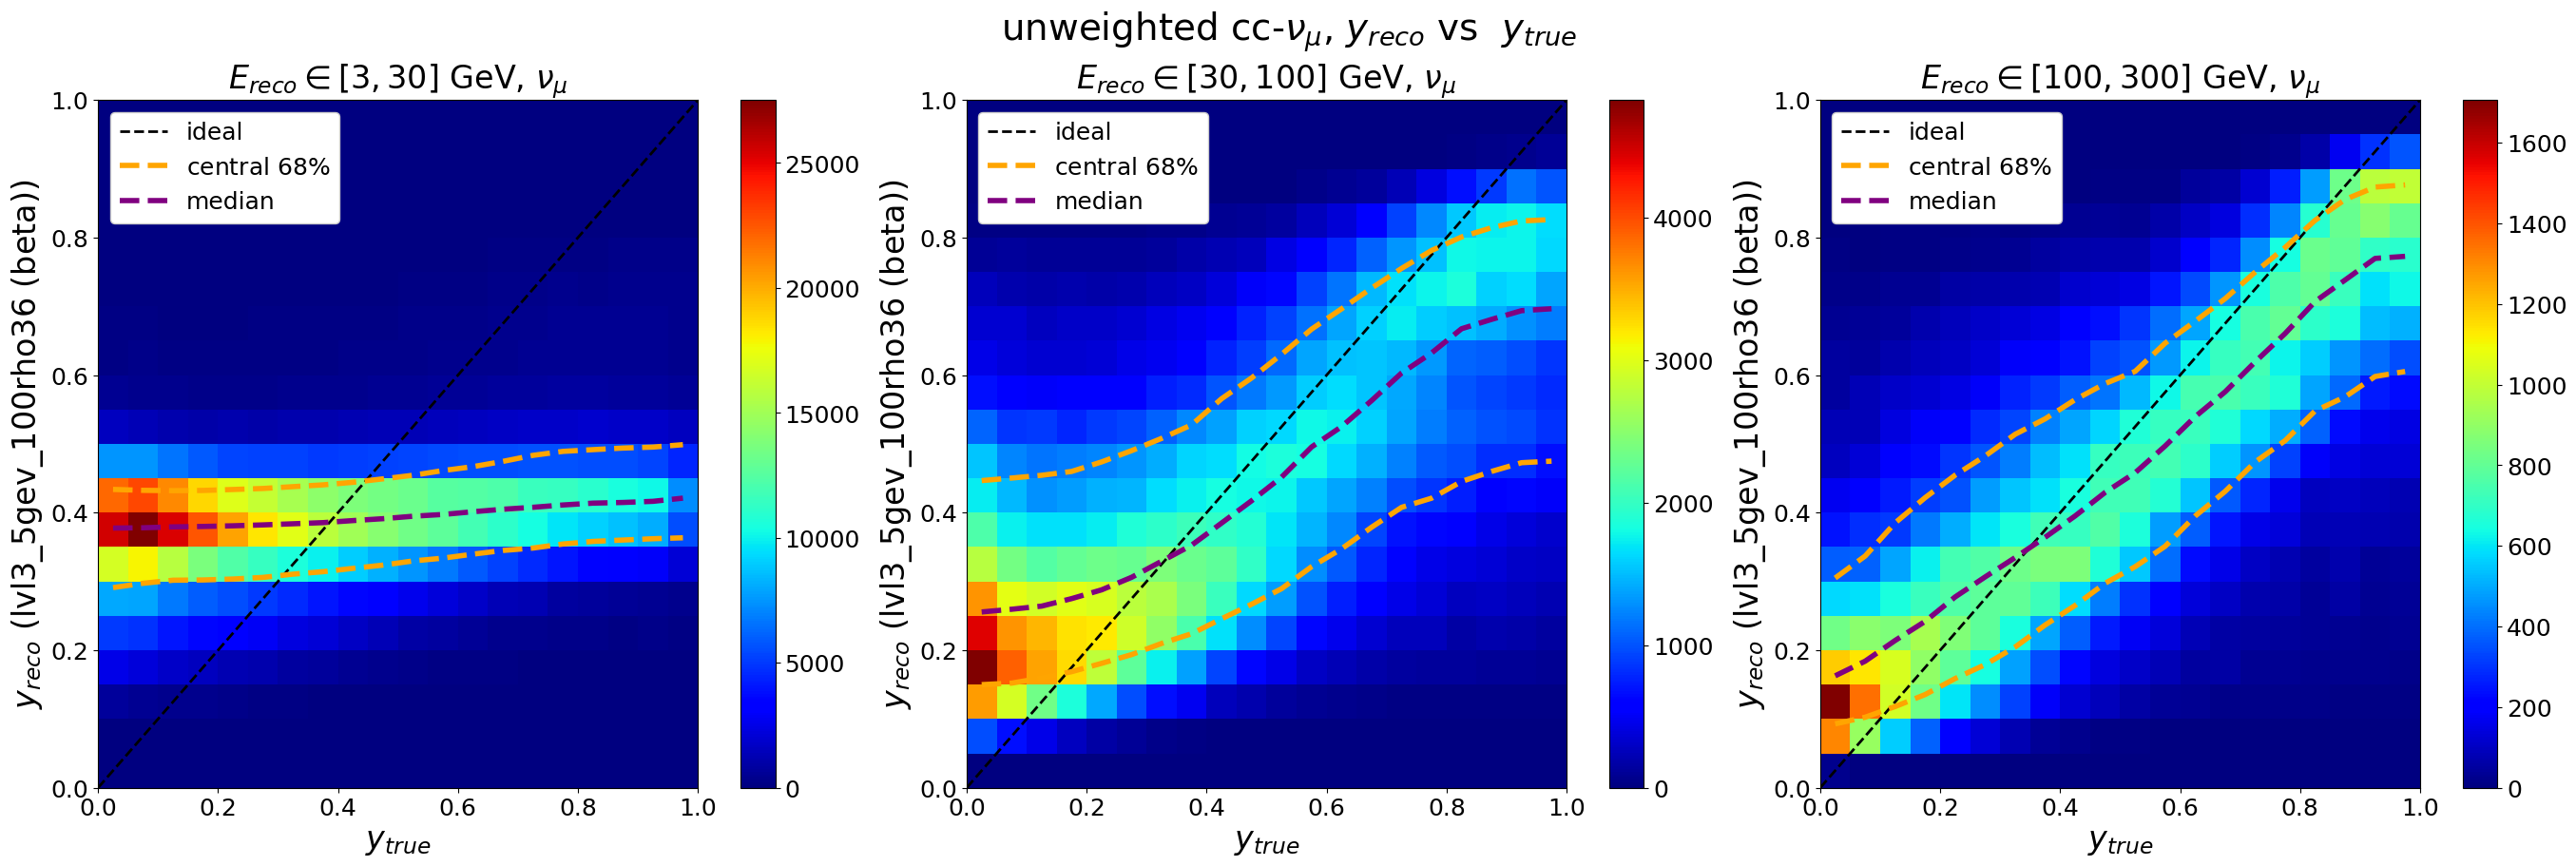

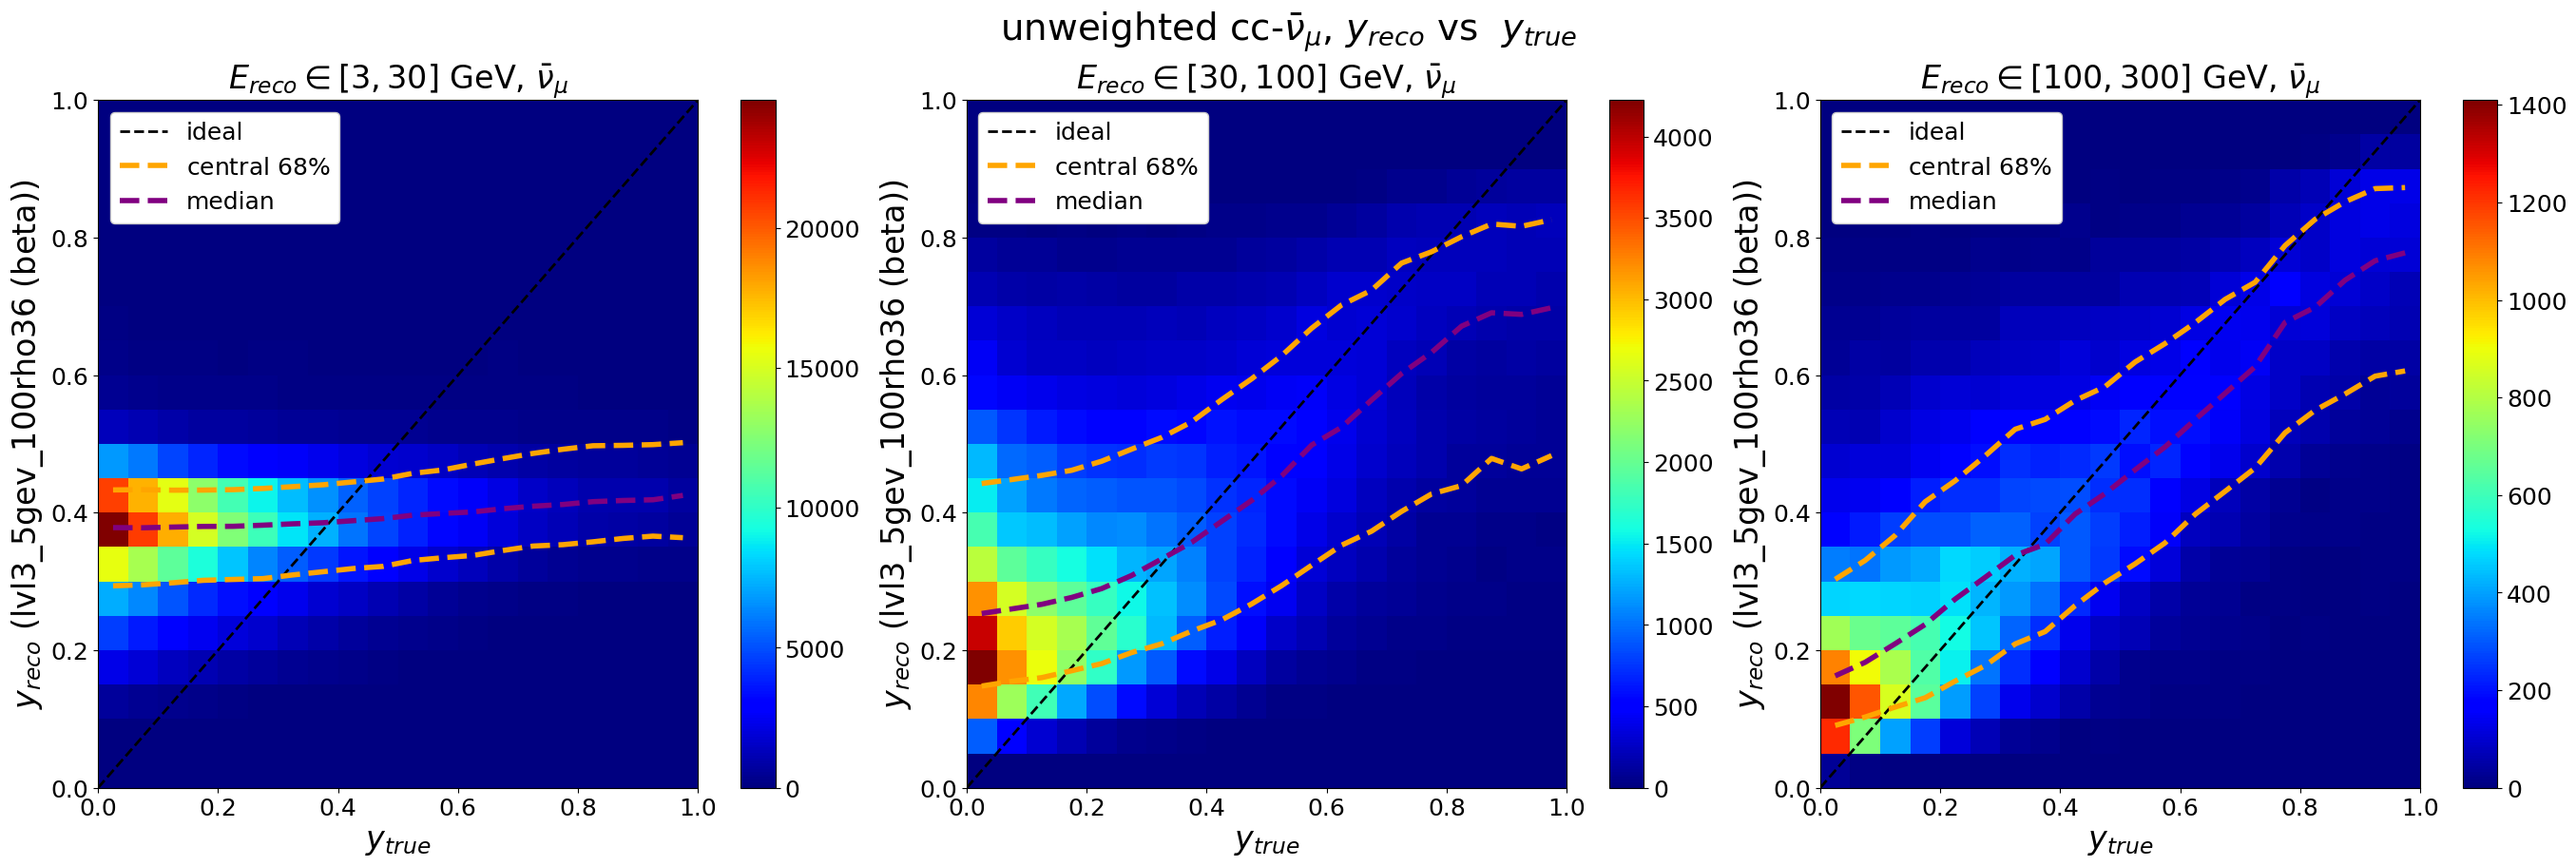

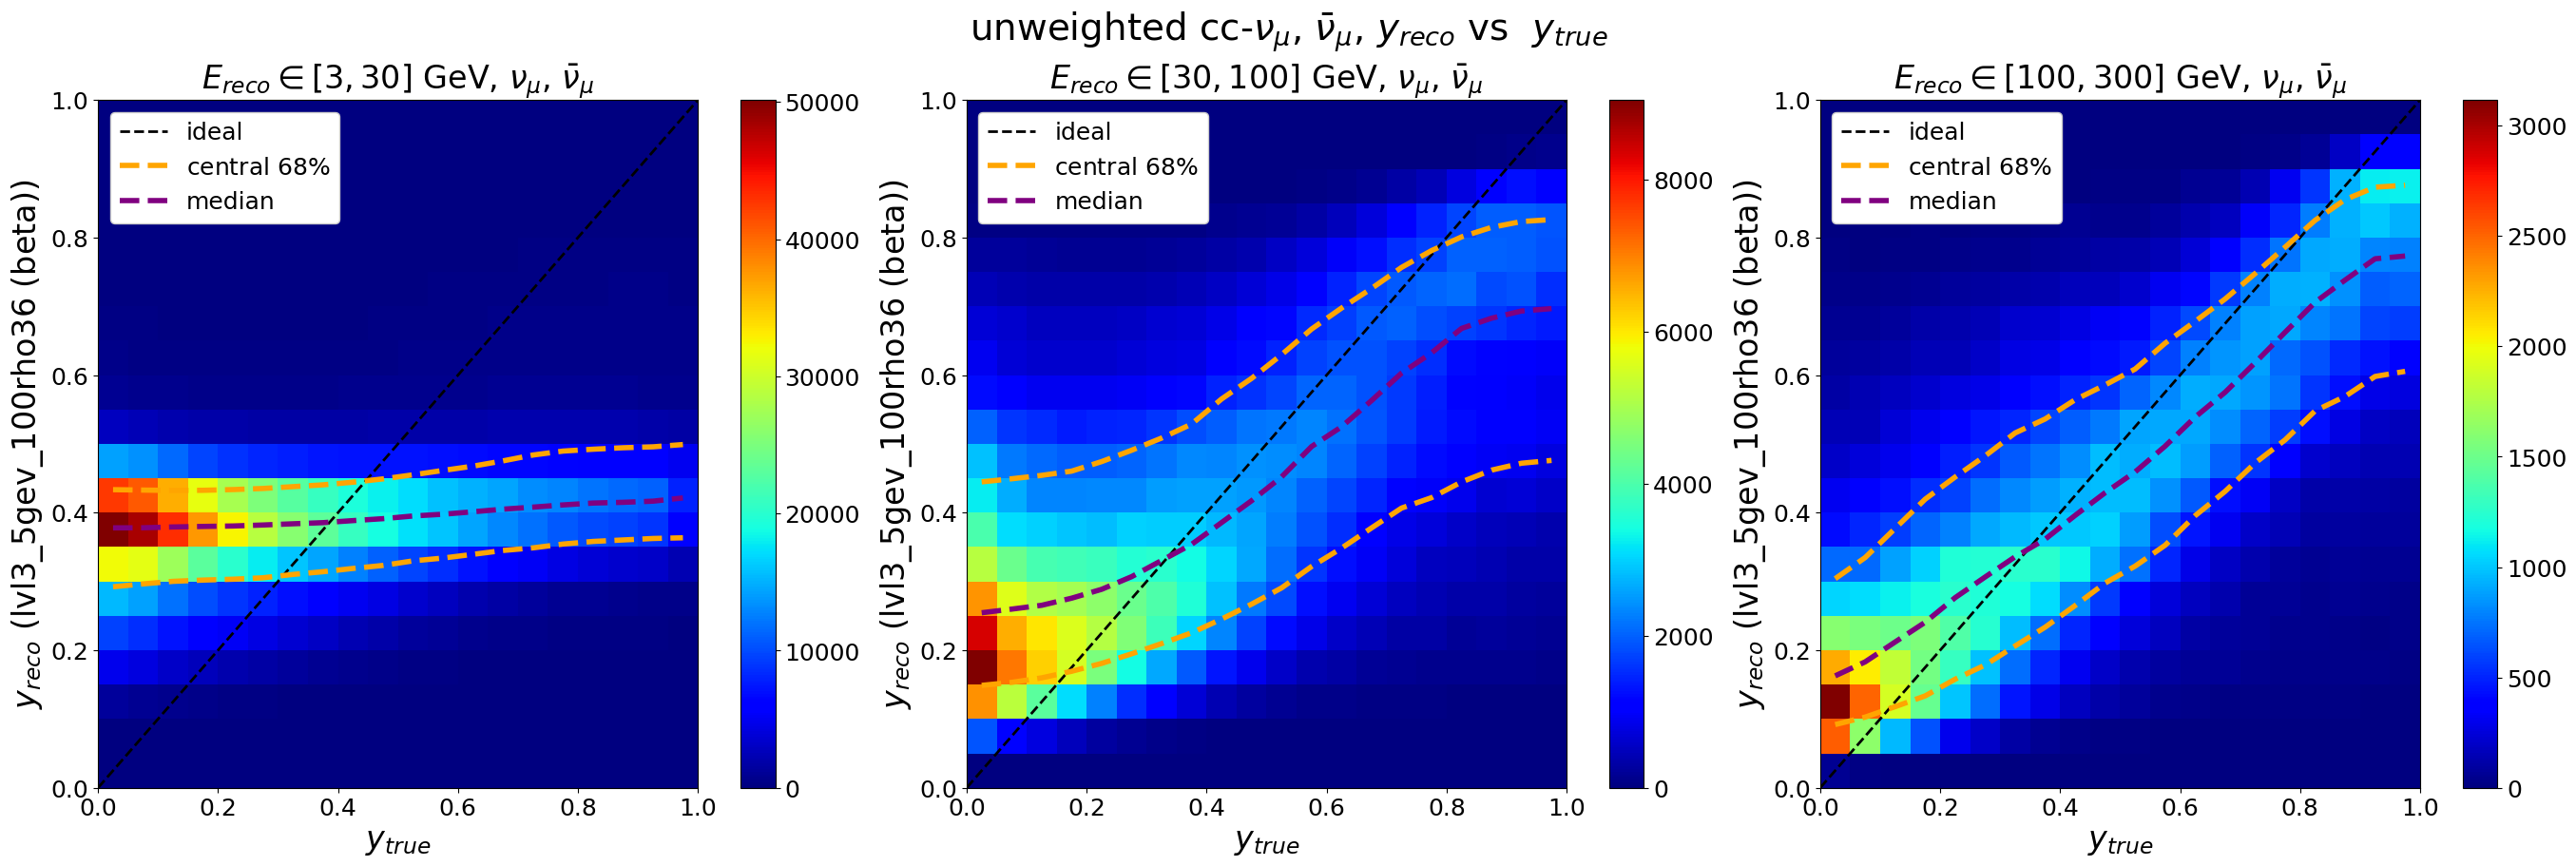

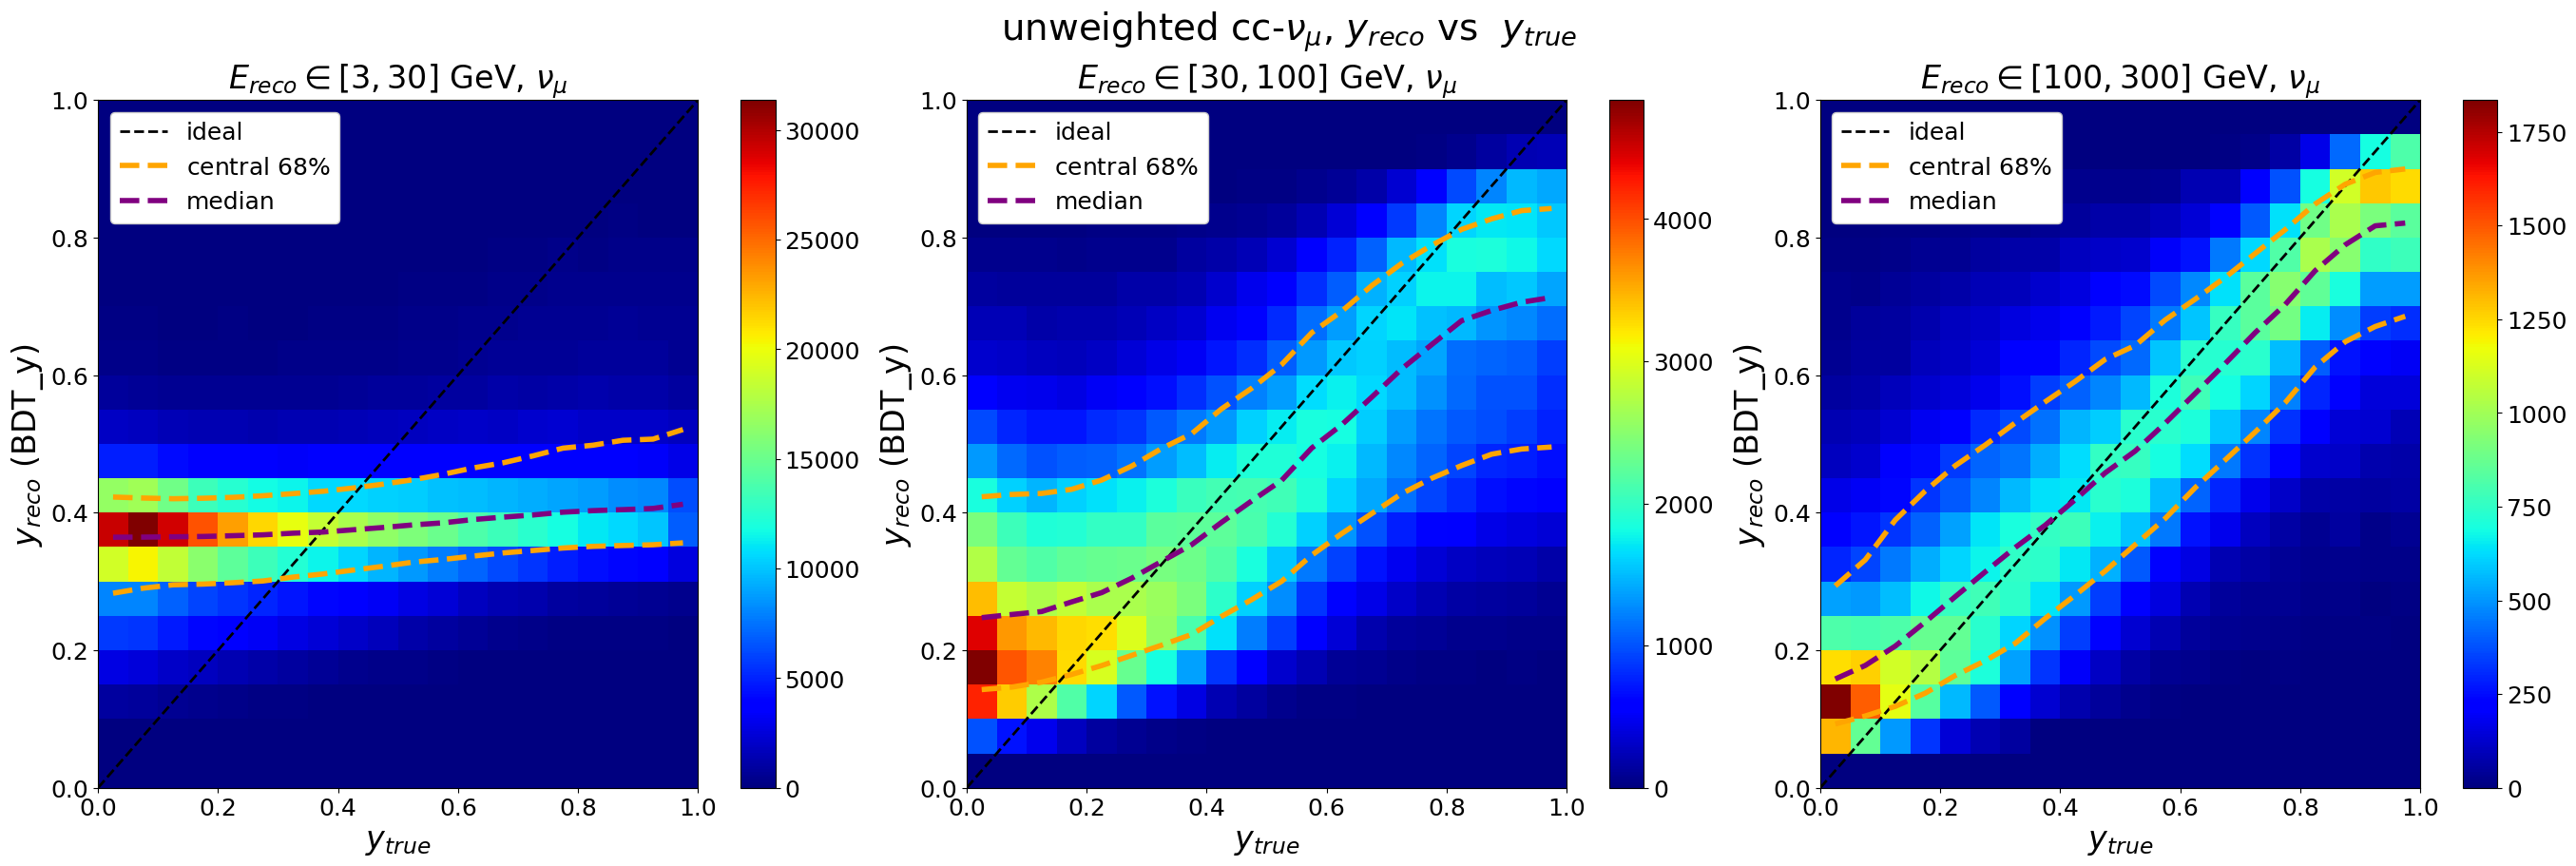

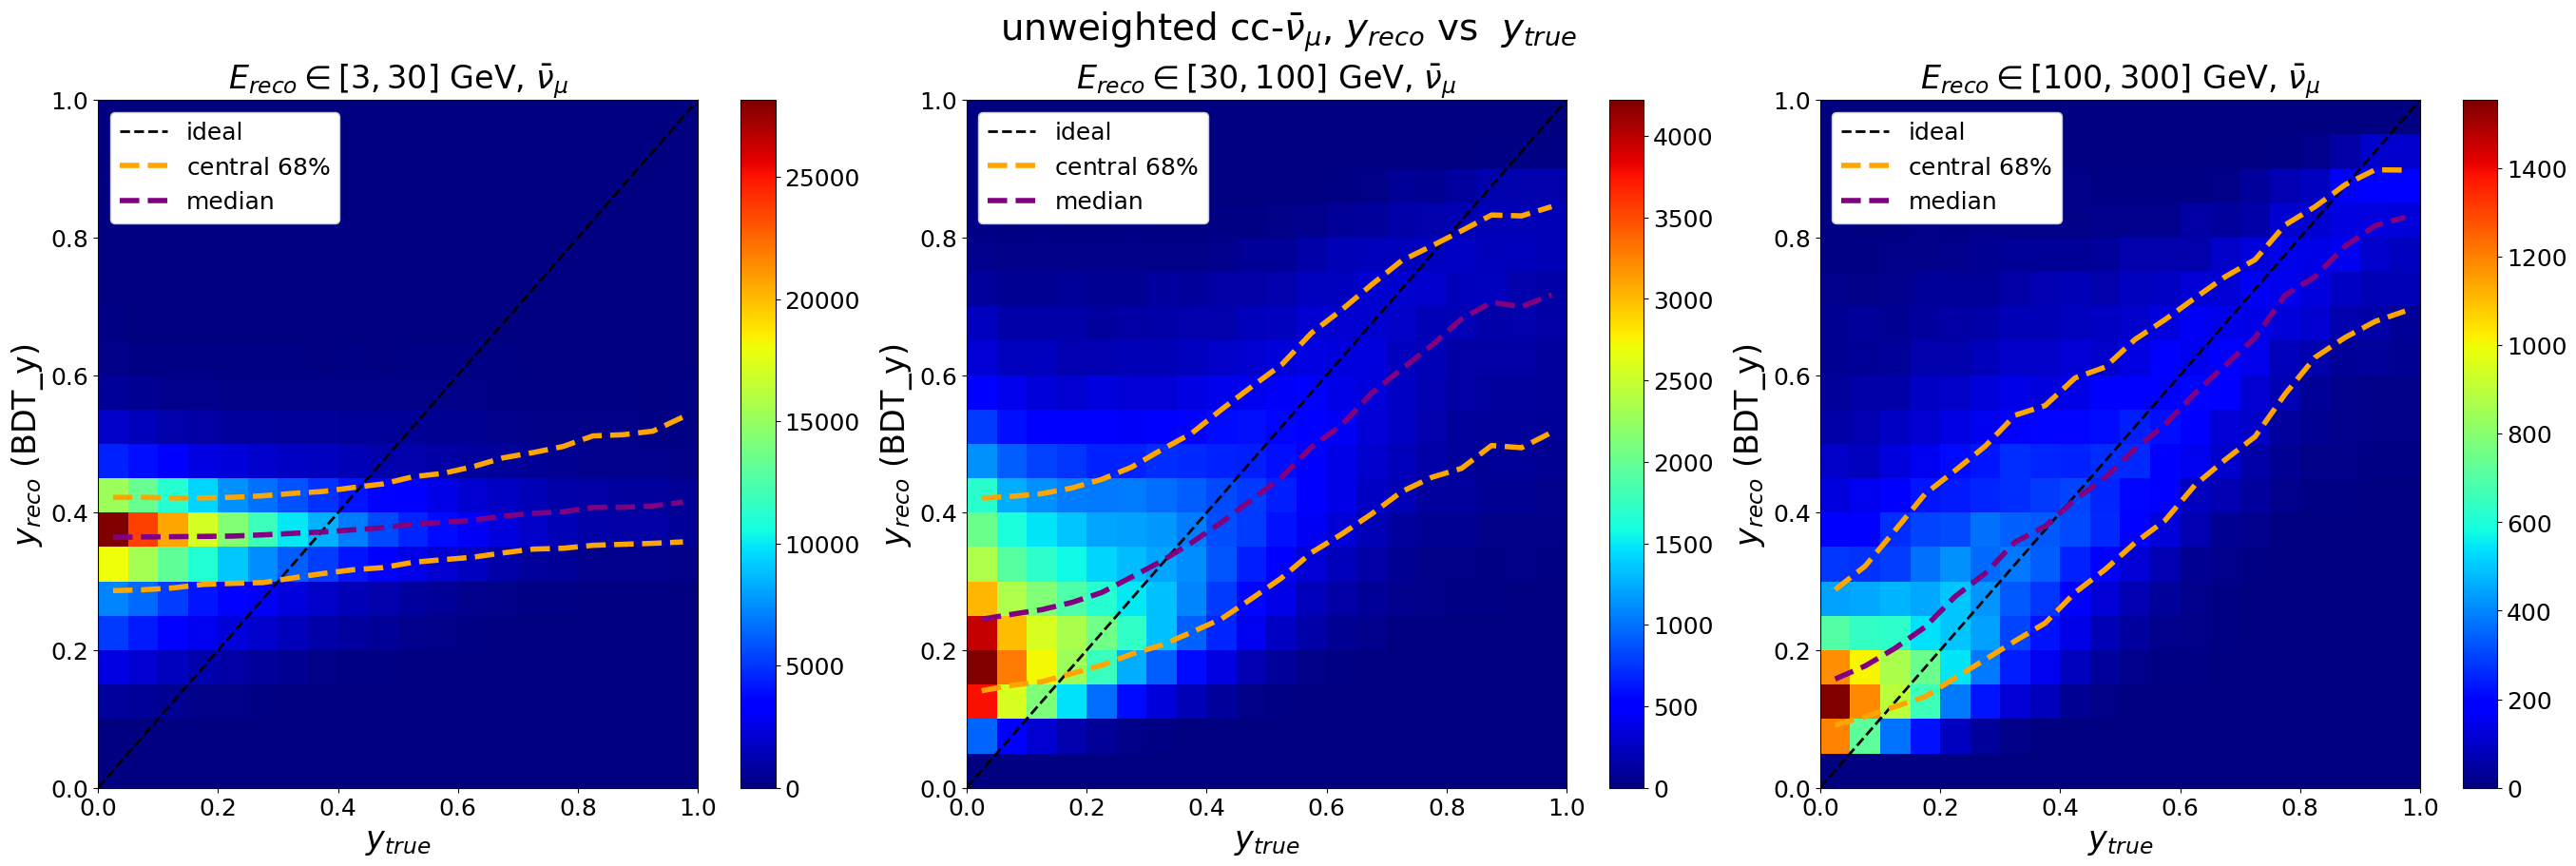

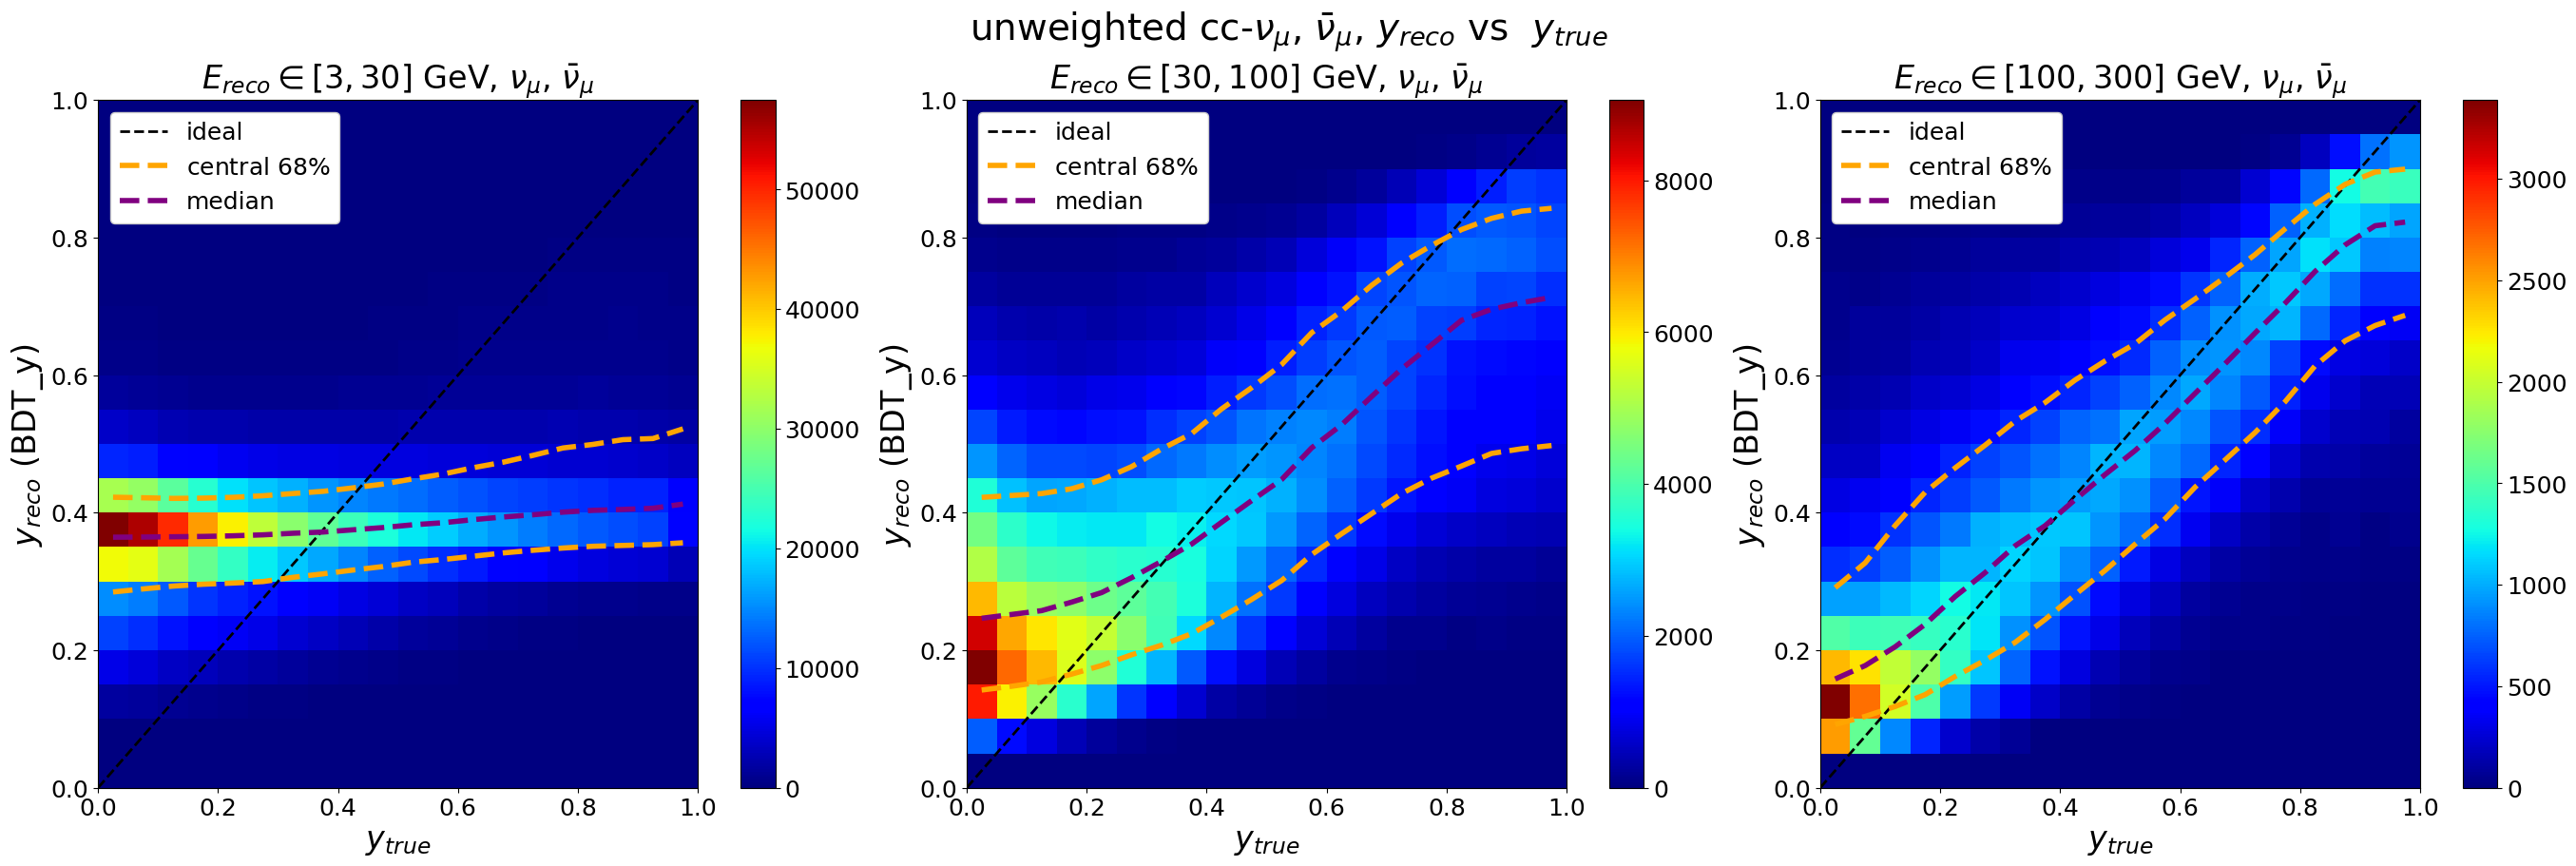

In [33]:
plotflag = True
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]
    
if plotflag:    
    for i,y in enumerate(ys_3.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}$'.format(nu=nulabel[j]),fontsize=28)
            
            weightname = 'unweighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            plt.show()

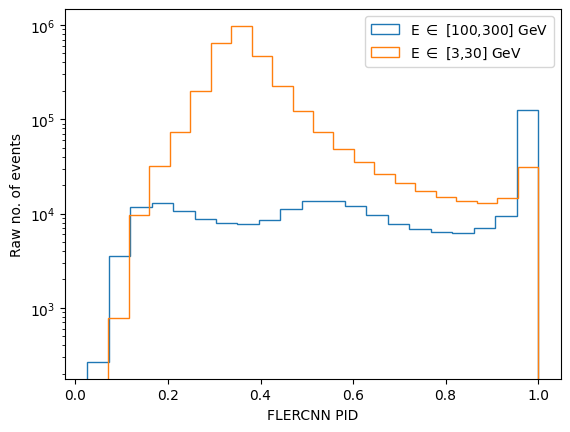

In [34]:
plt.hist(pisa_inel_mu[FLERCNN_vars['PID']][reco_E_ishigh],histtype='step',bins=21,label=r'E $\in$ [100,300] GeV');
plt.hist(pisa_inel_mu[FLERCNN_vars['PID']][reco_E_islow],histtype='step',bins=21,label=r'E $\in$ [3,30] GeV');
plt.xlabel('FLERCNN PID')
plt.ylabel('Raw no. of events')
plt.yscale('log')
plt.legend()
plt.savefig('Inelast_Plots/PID_Phasespace/PID_lowVhighEnergy.png')

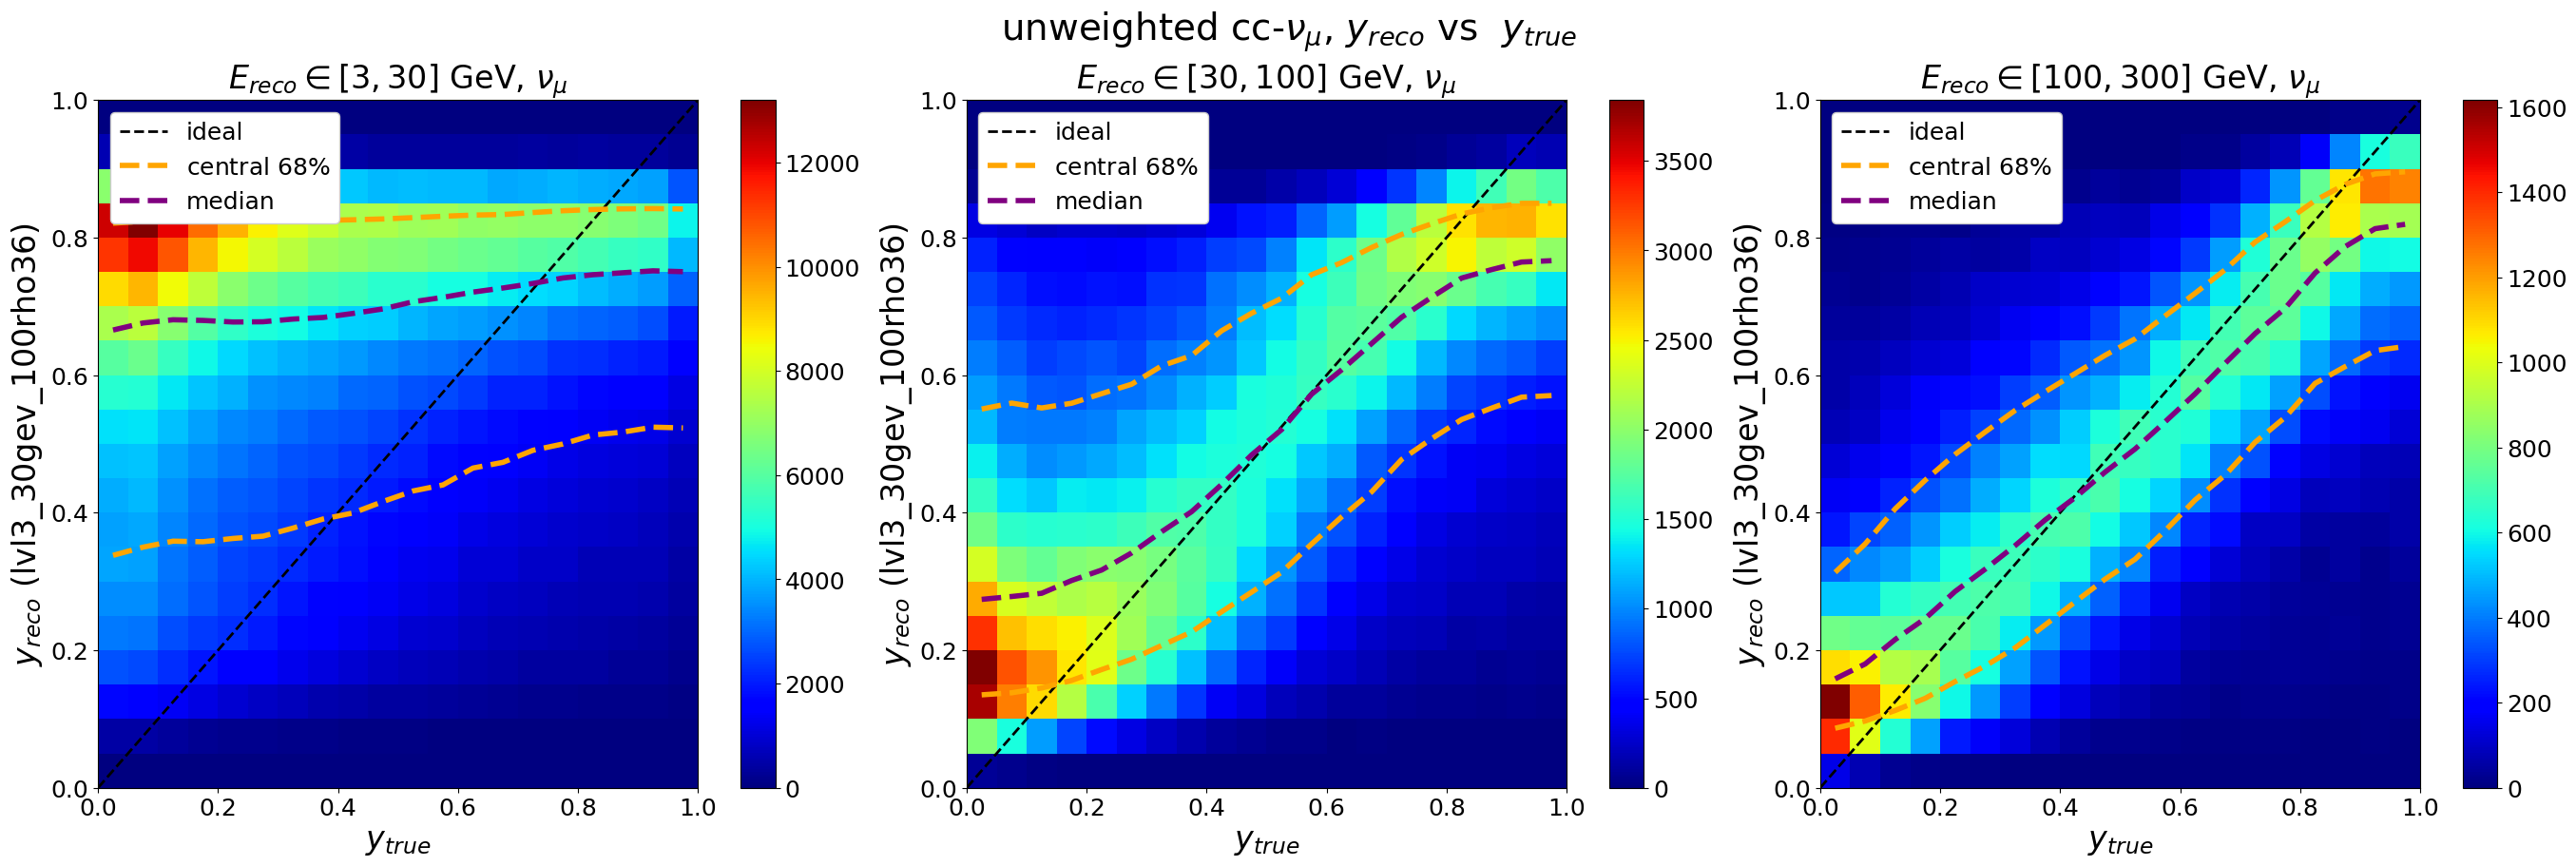

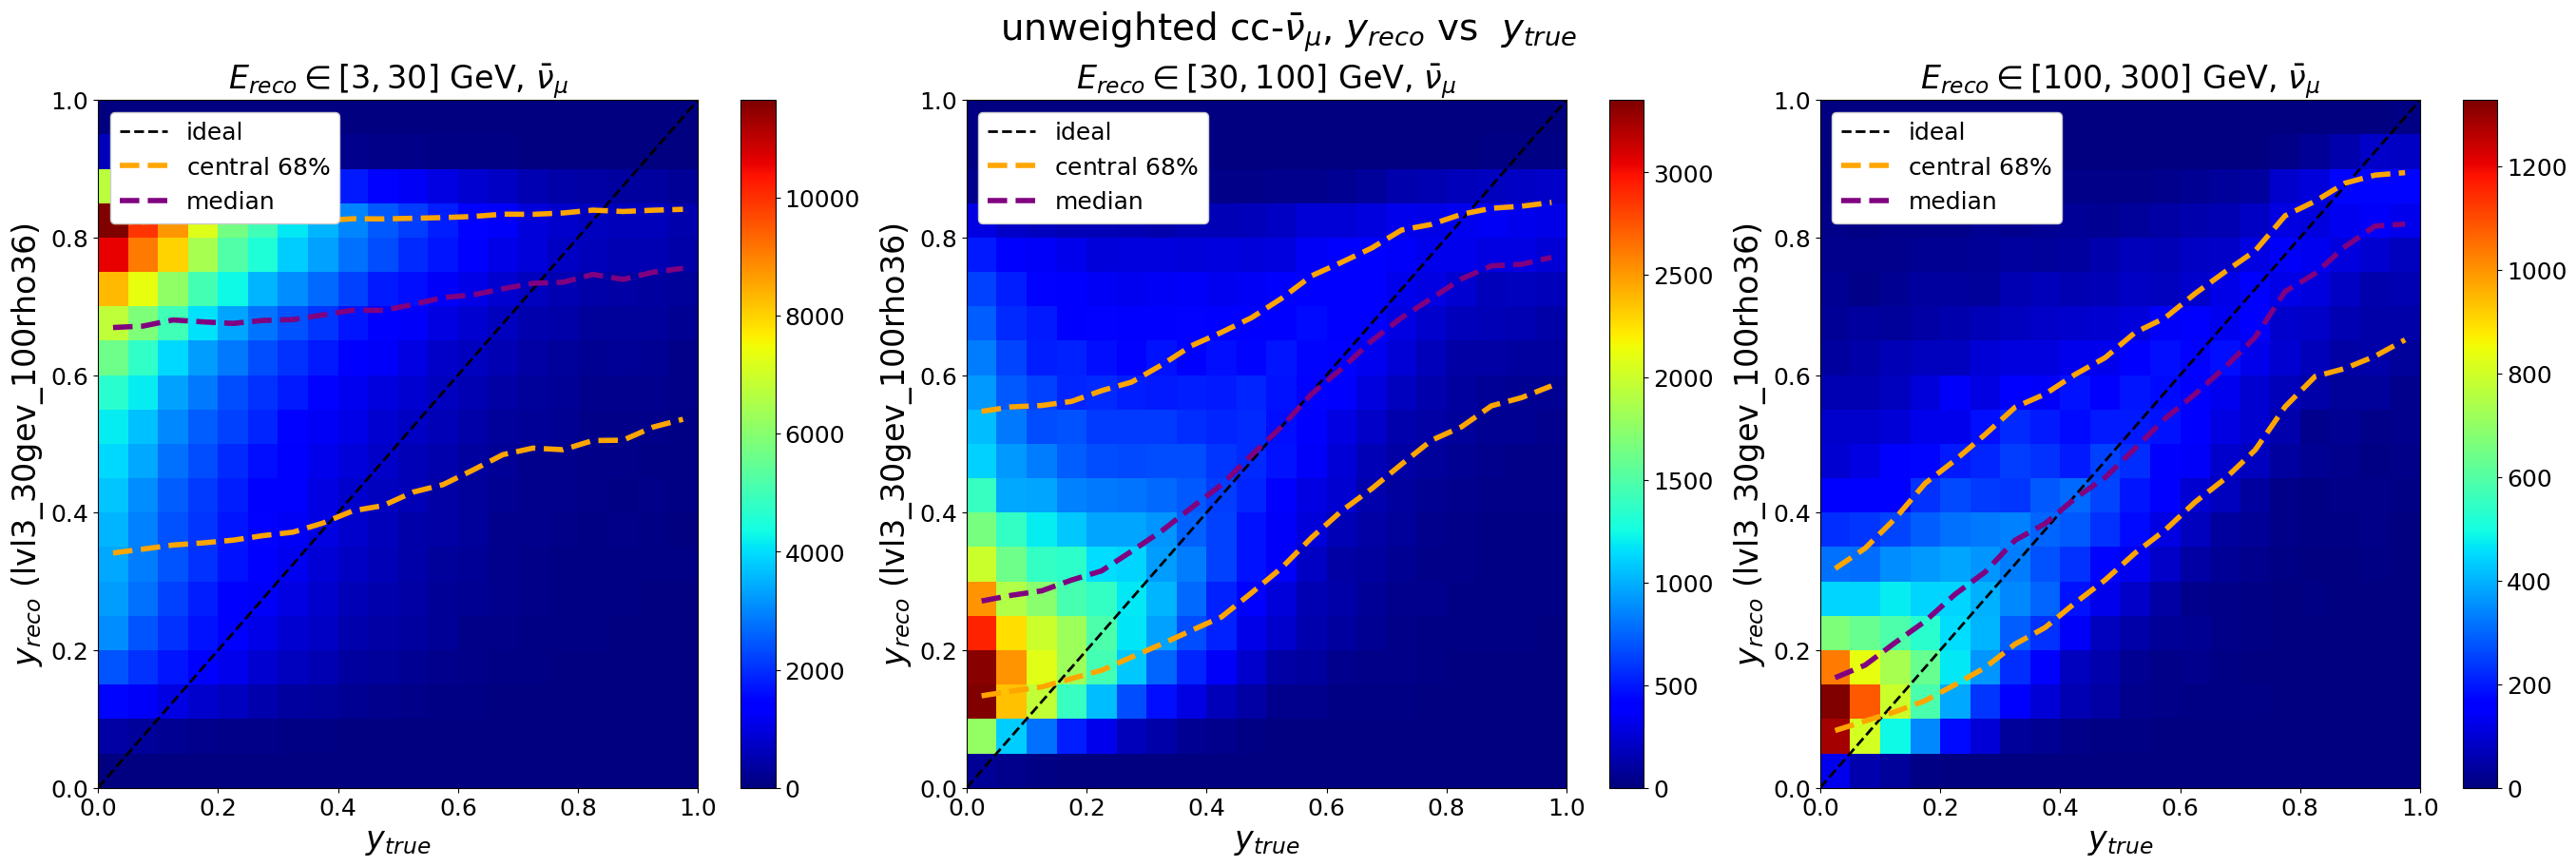

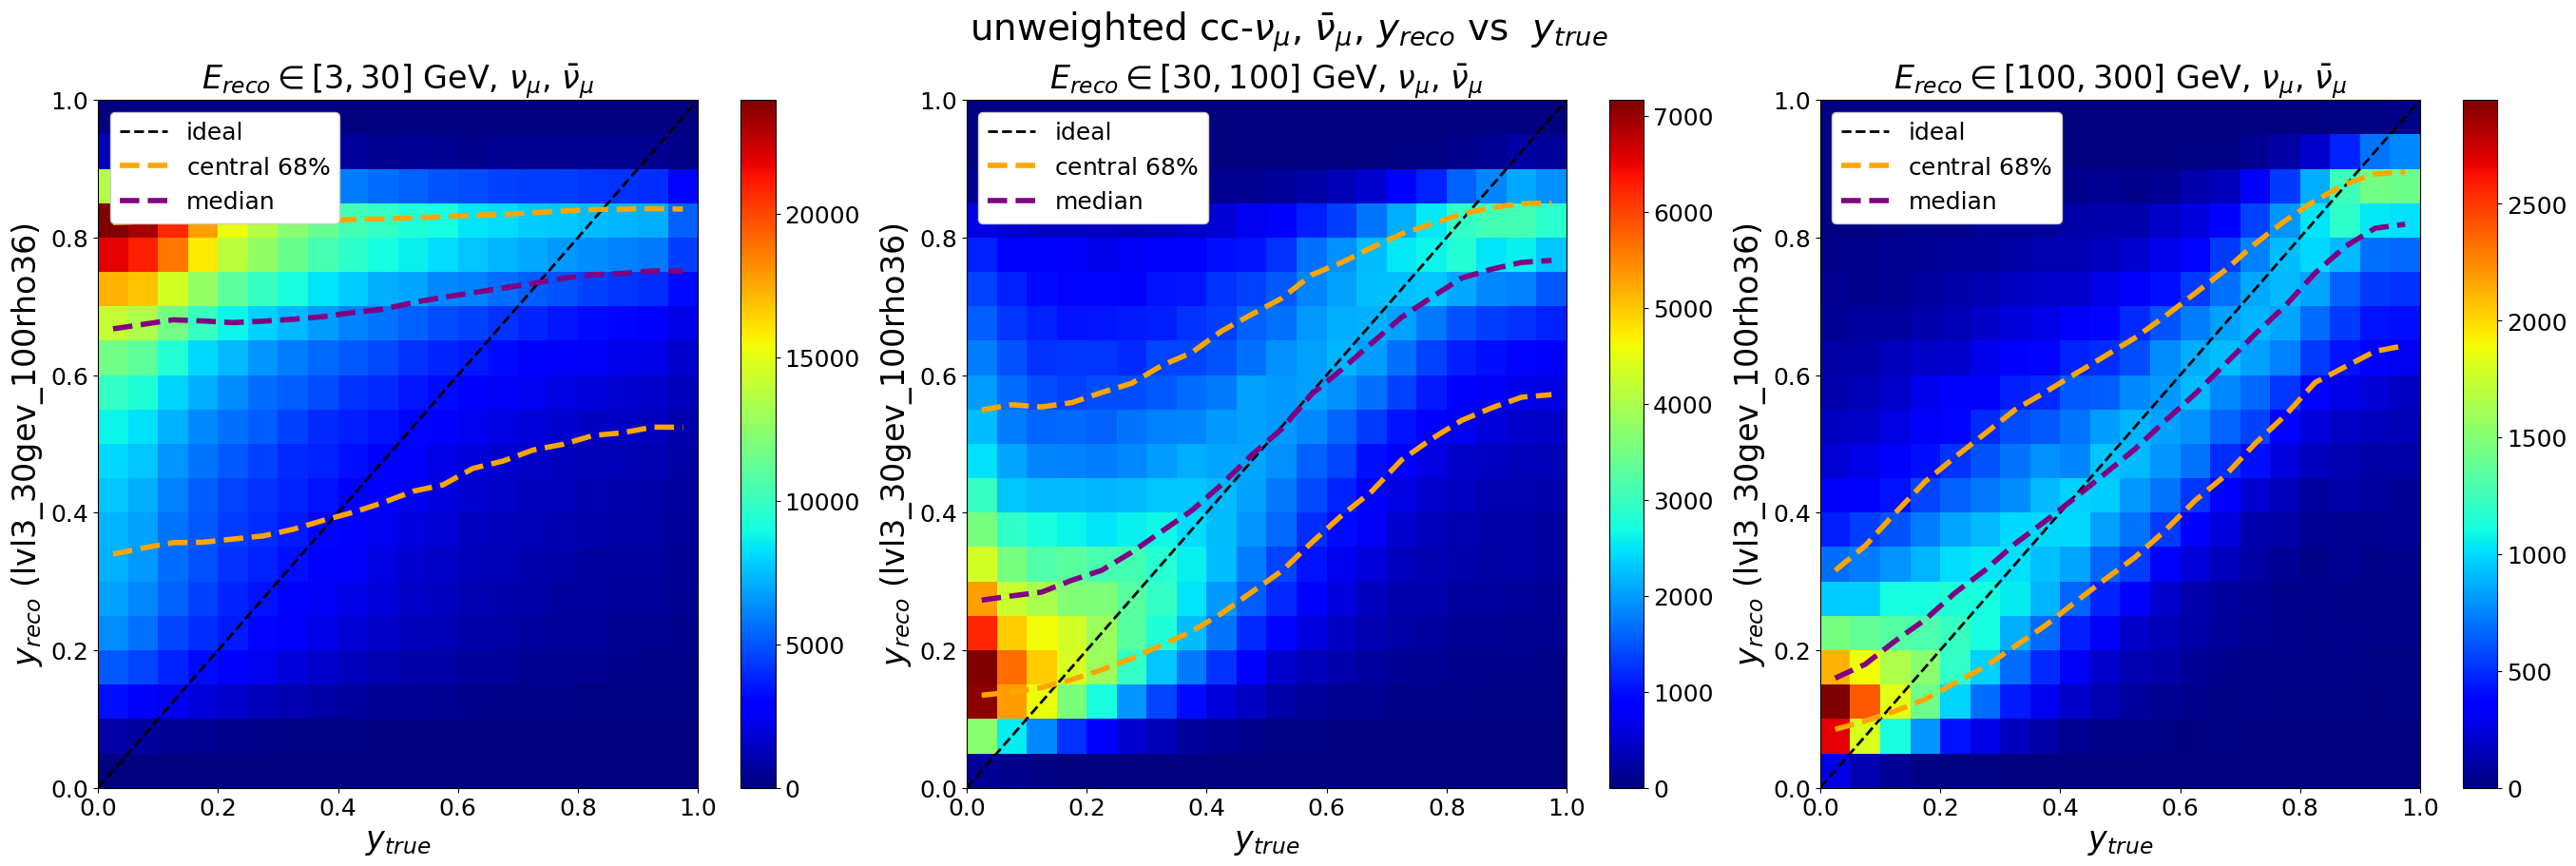

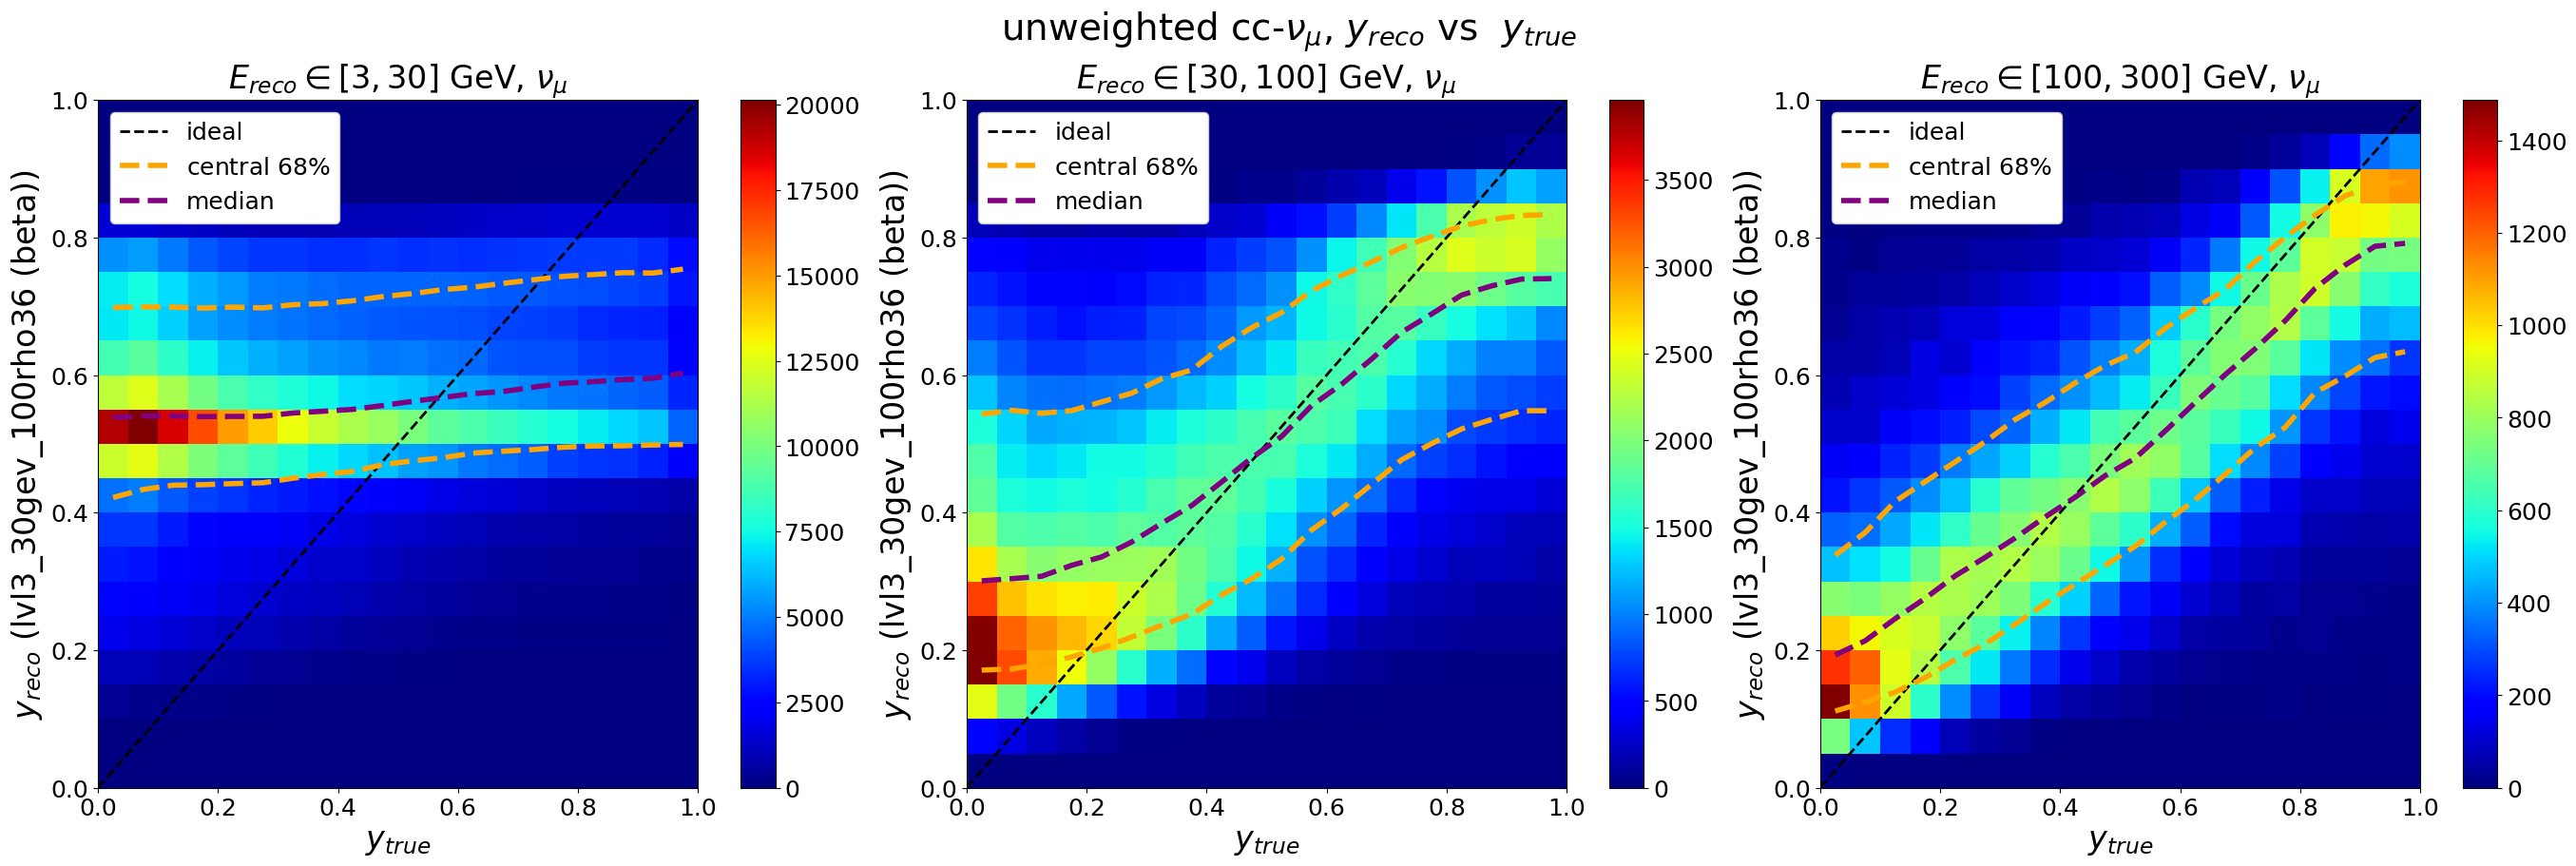

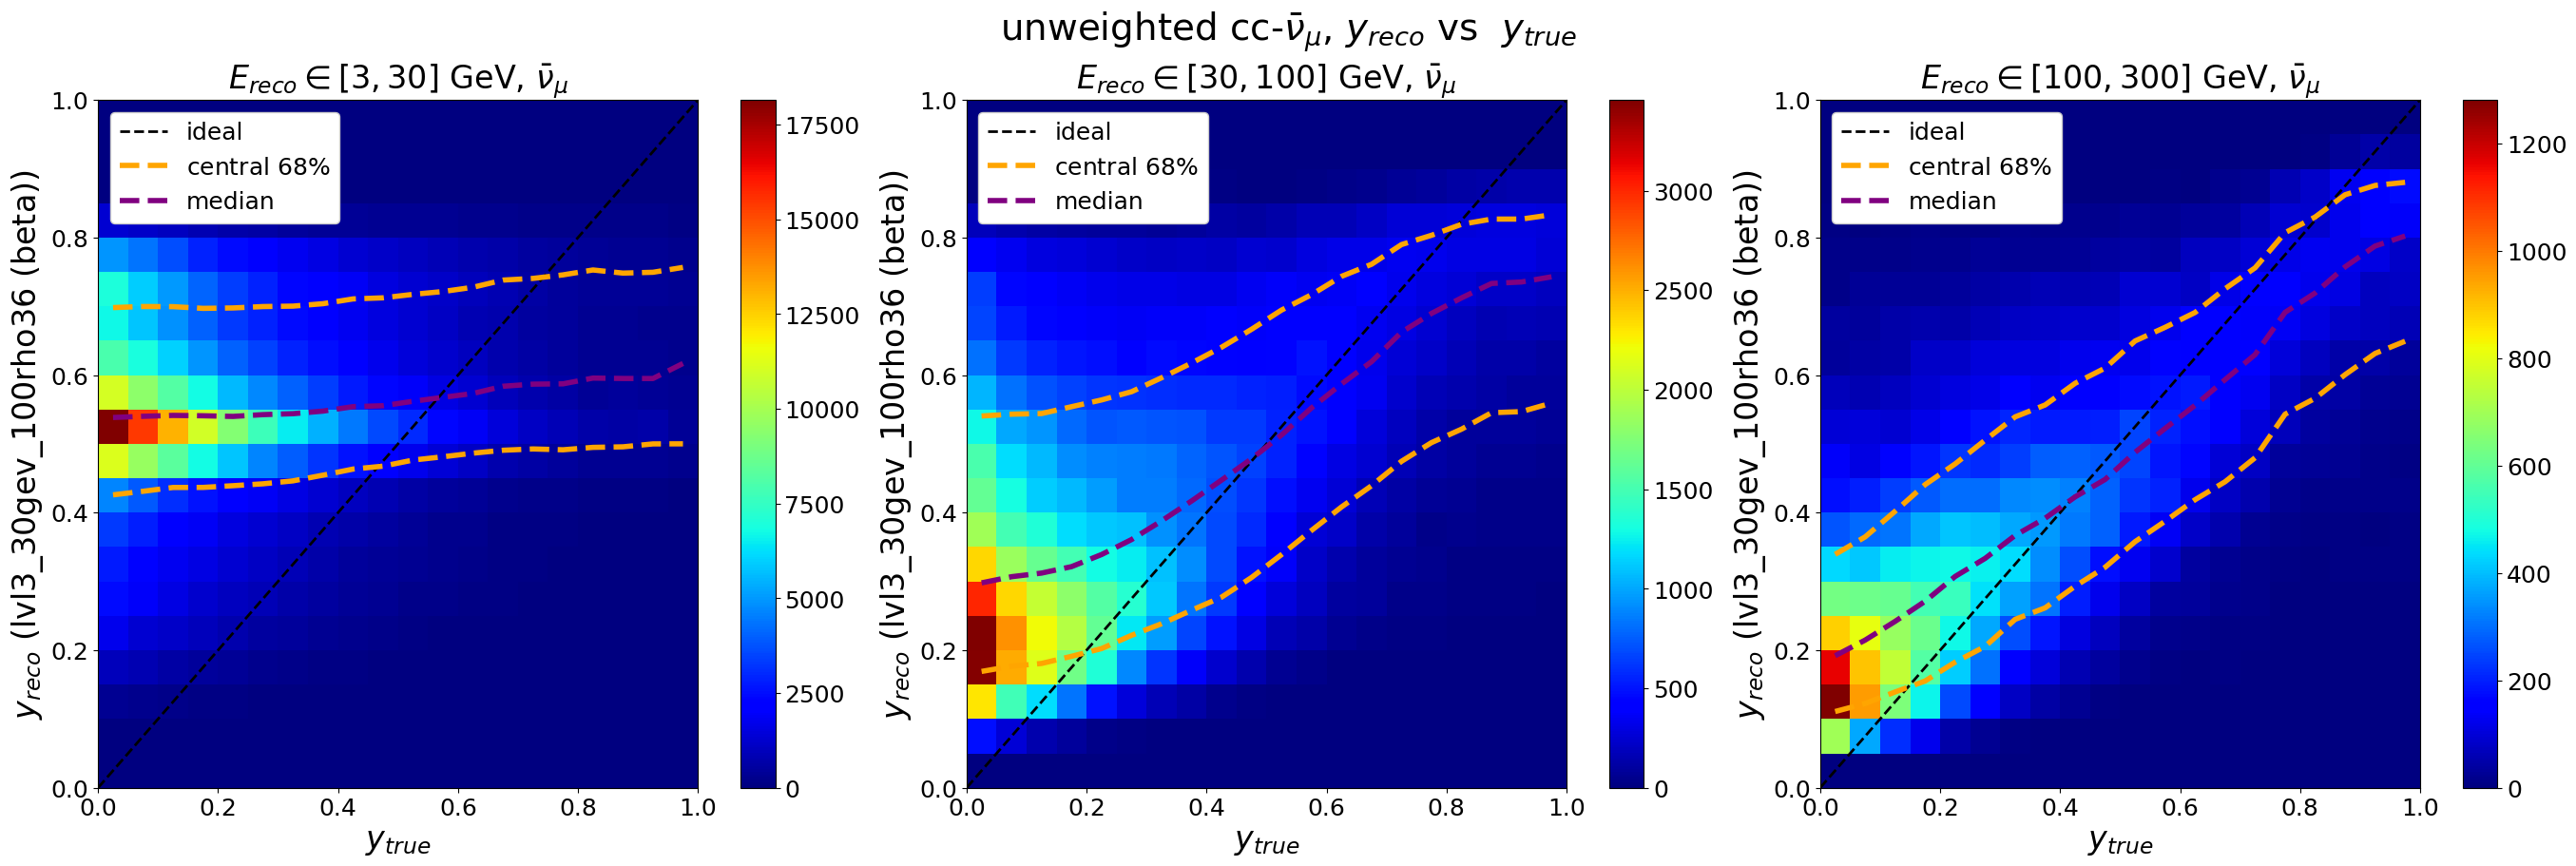

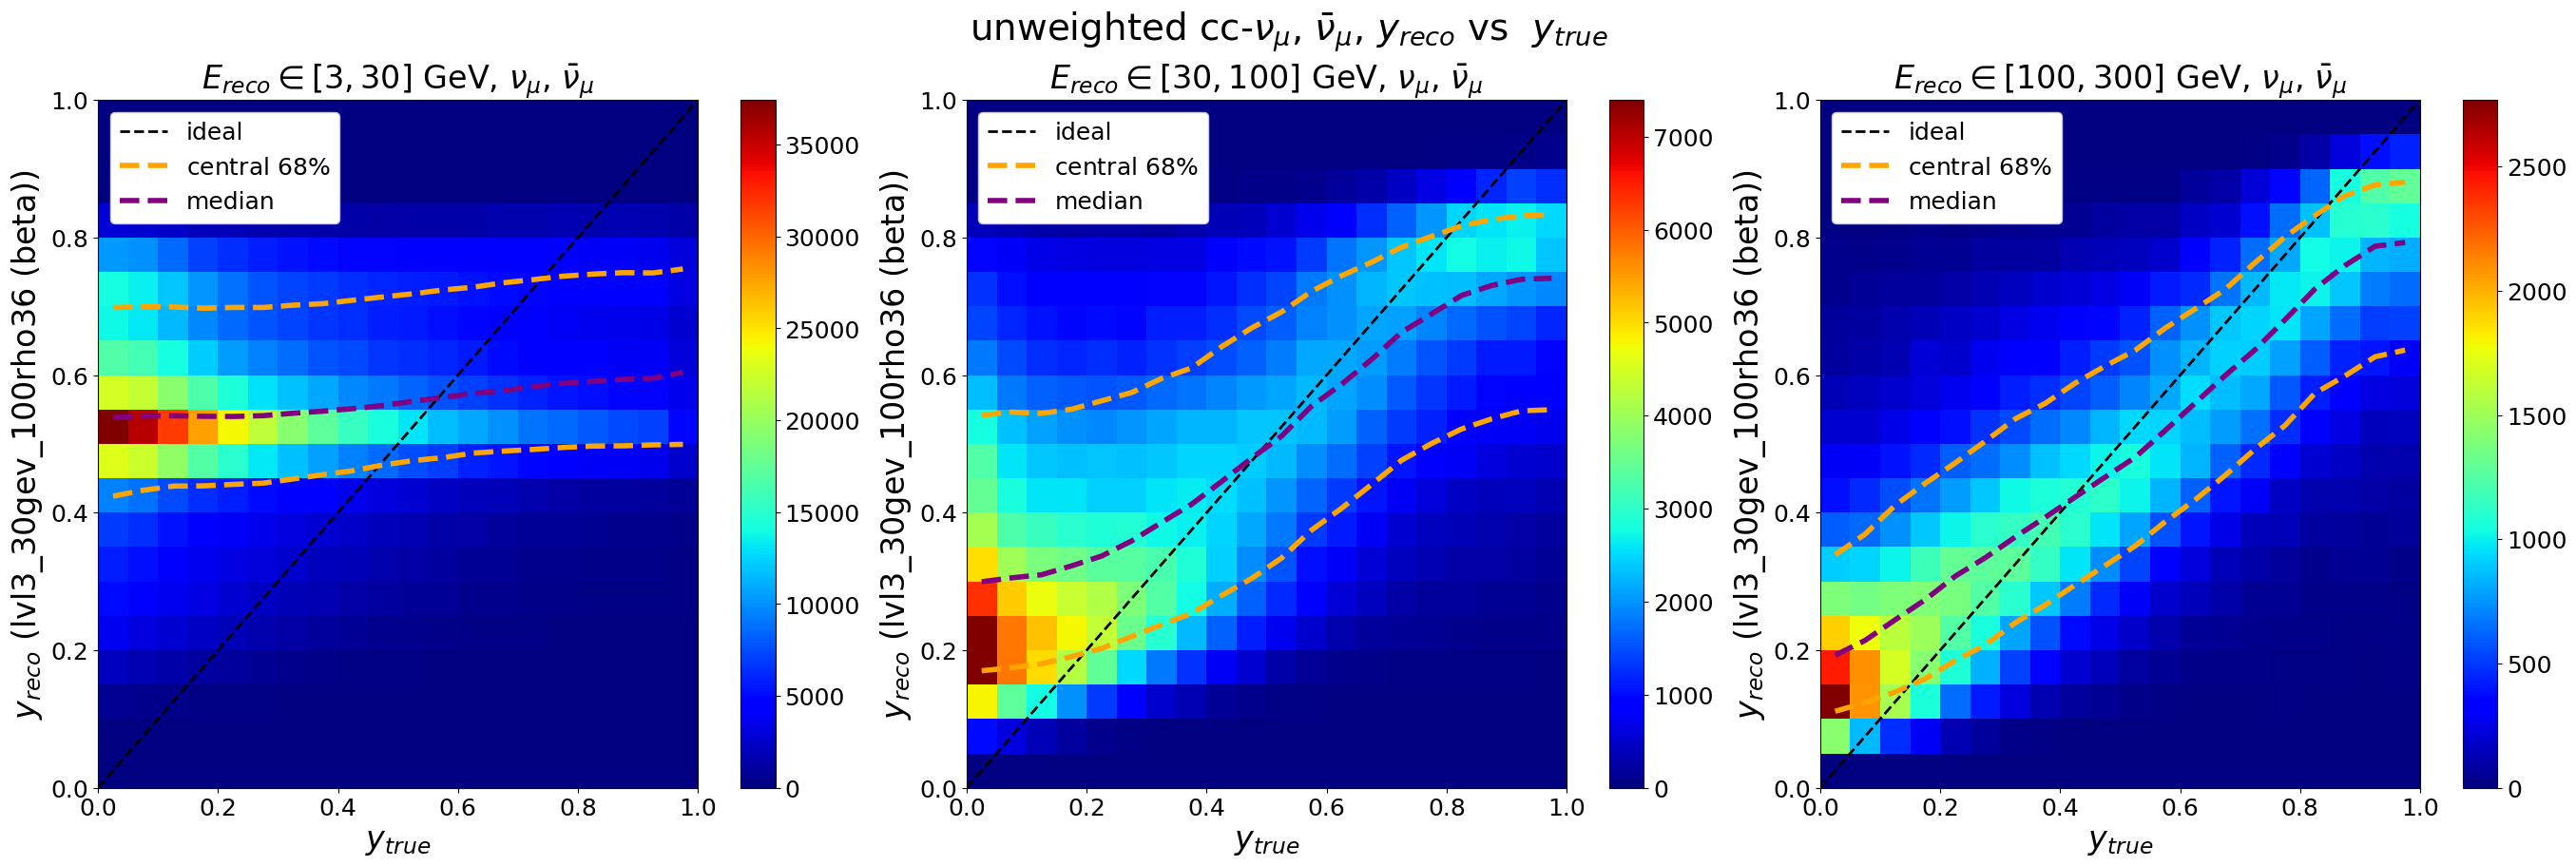

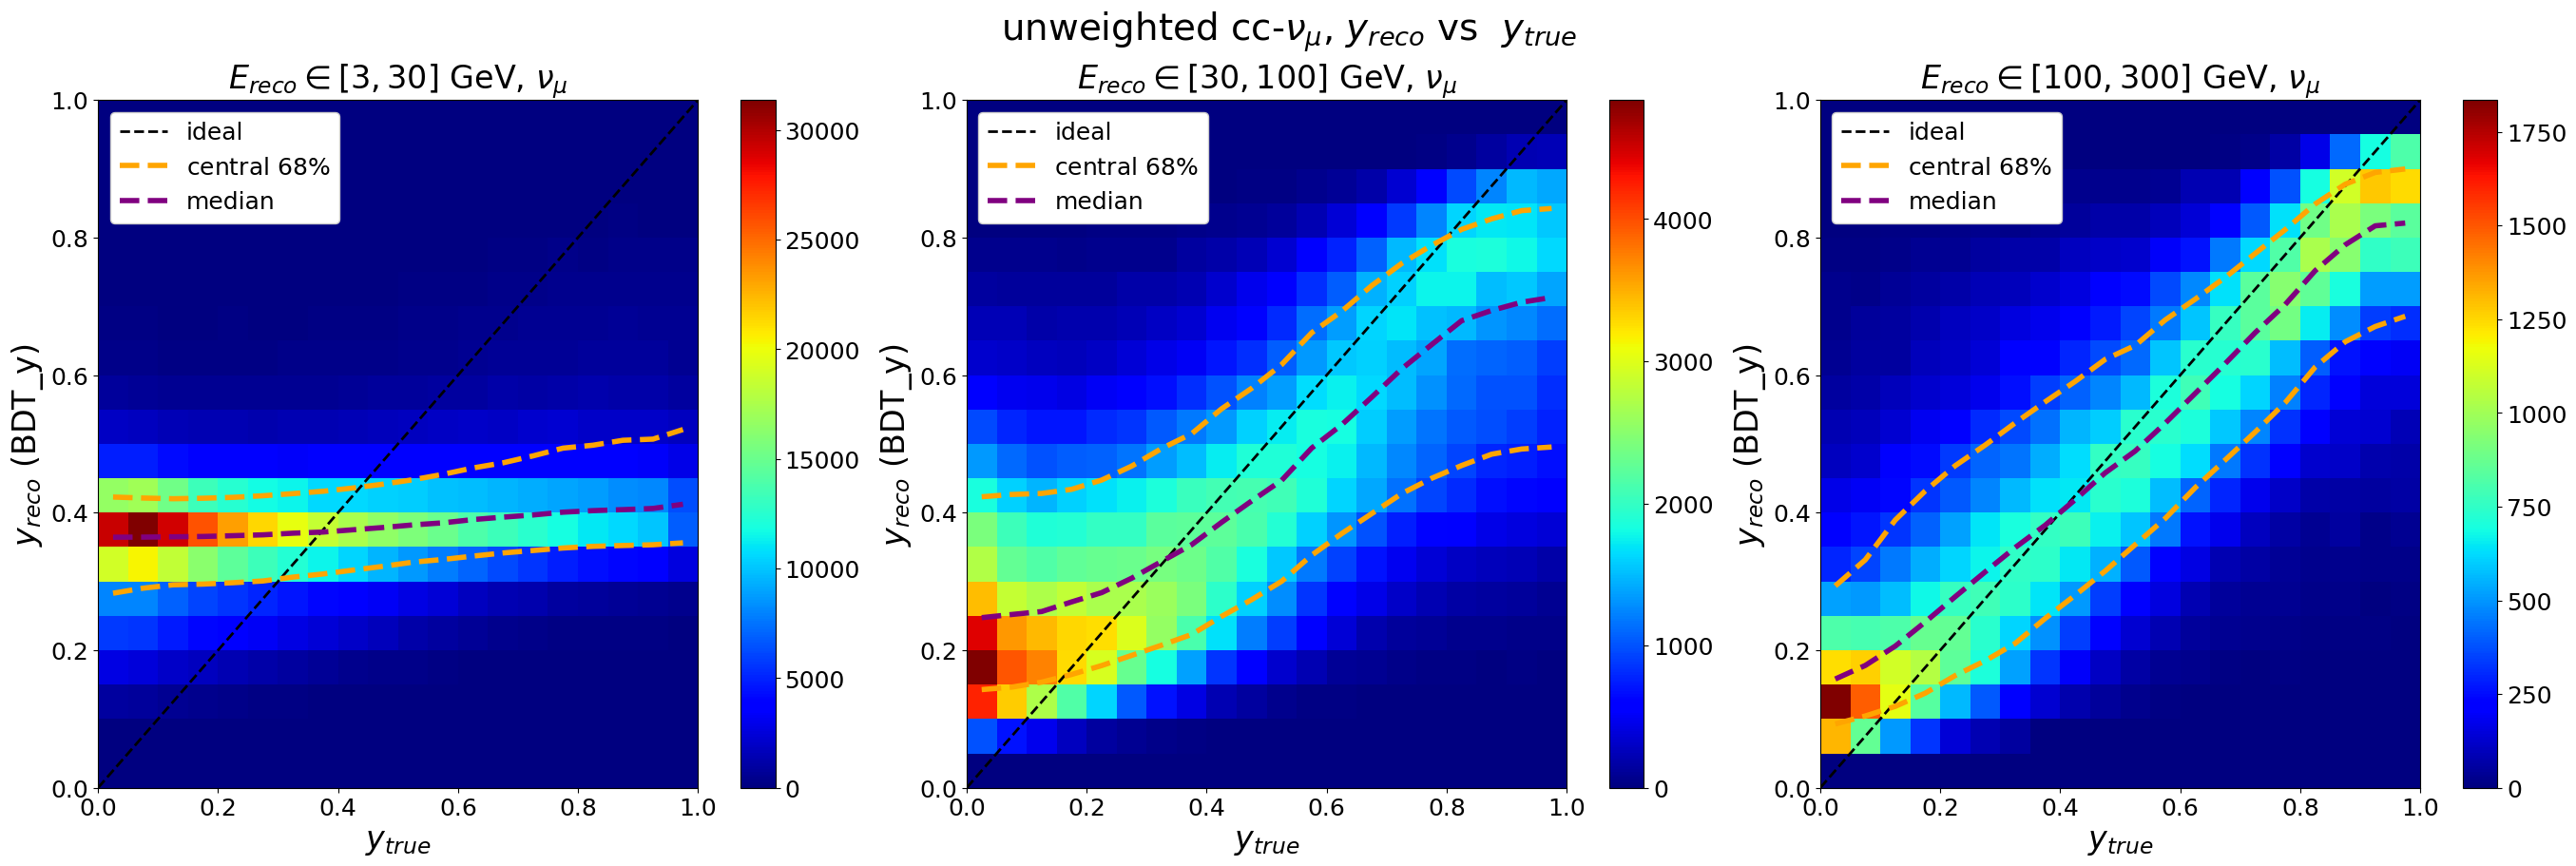

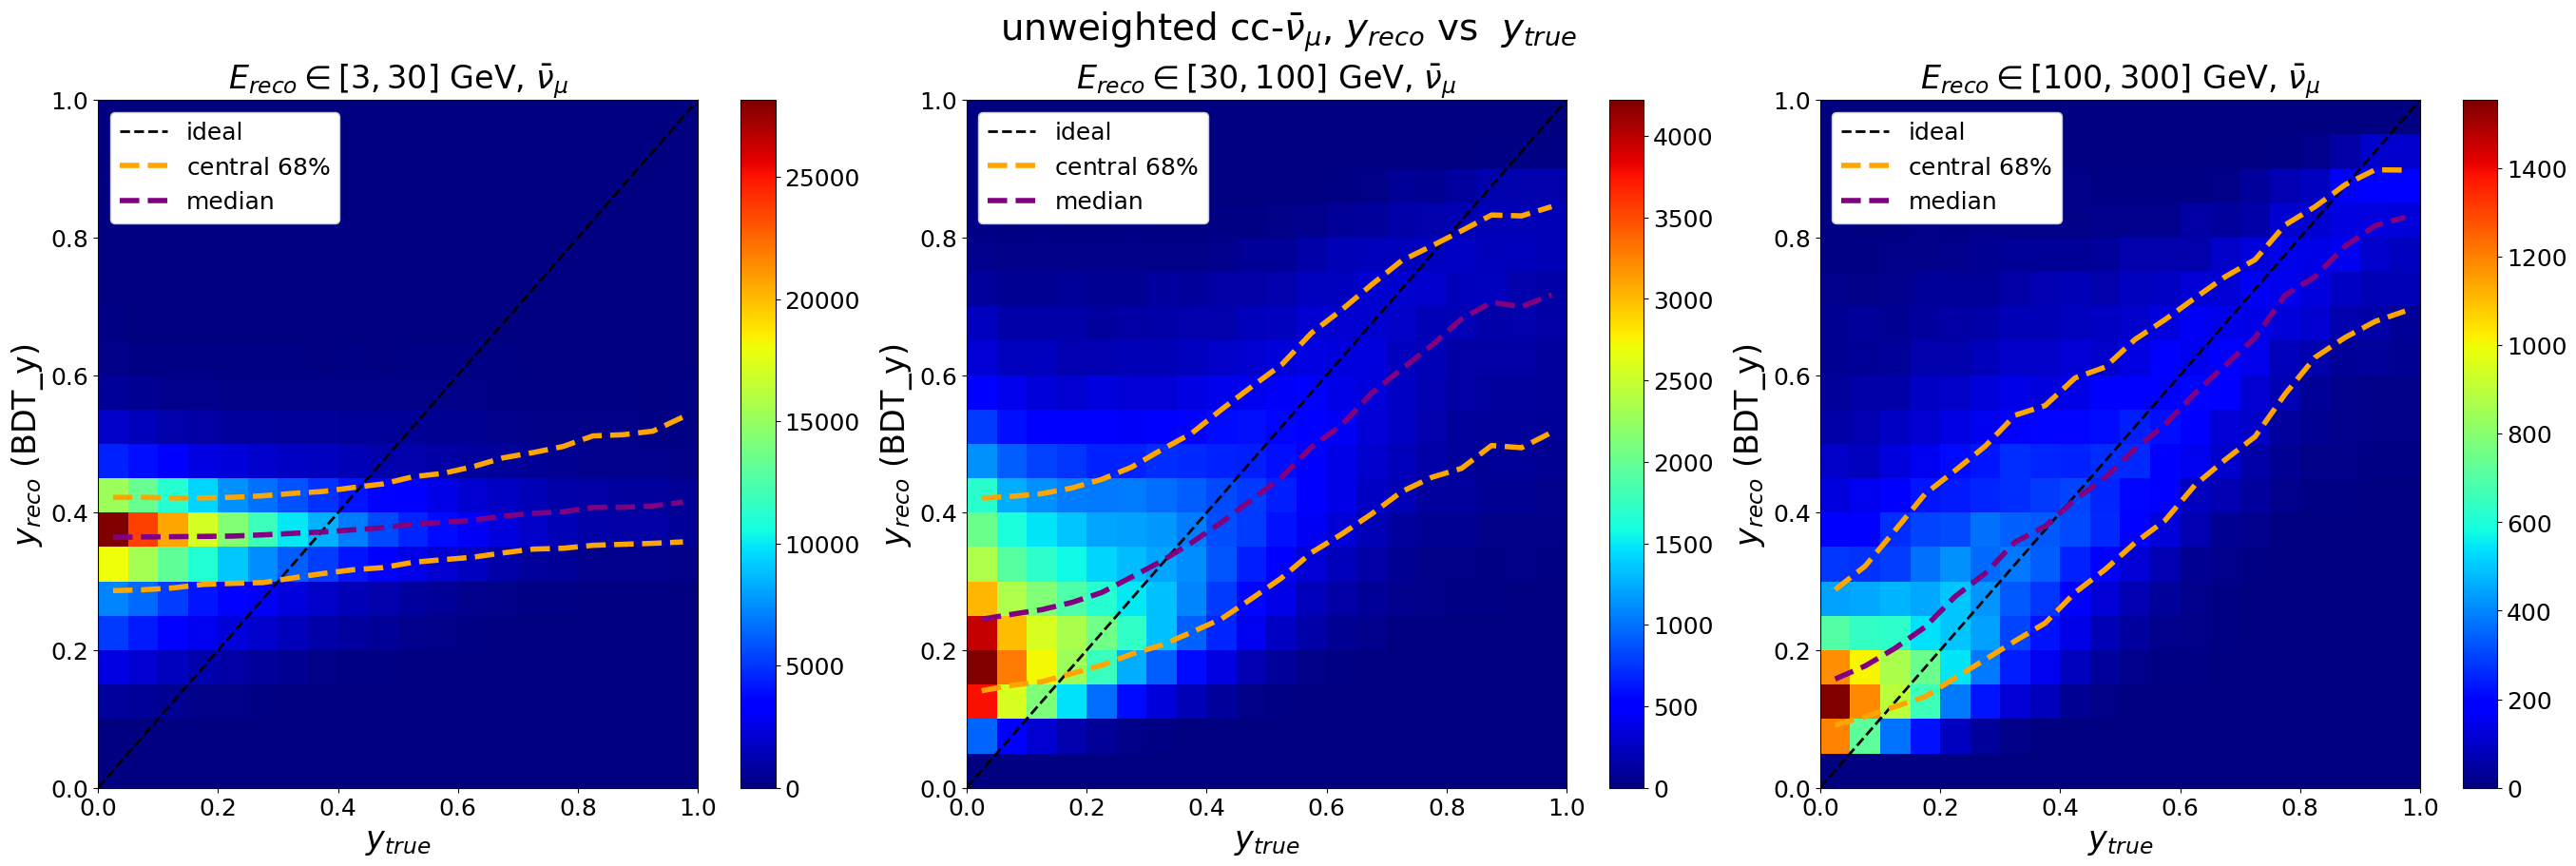

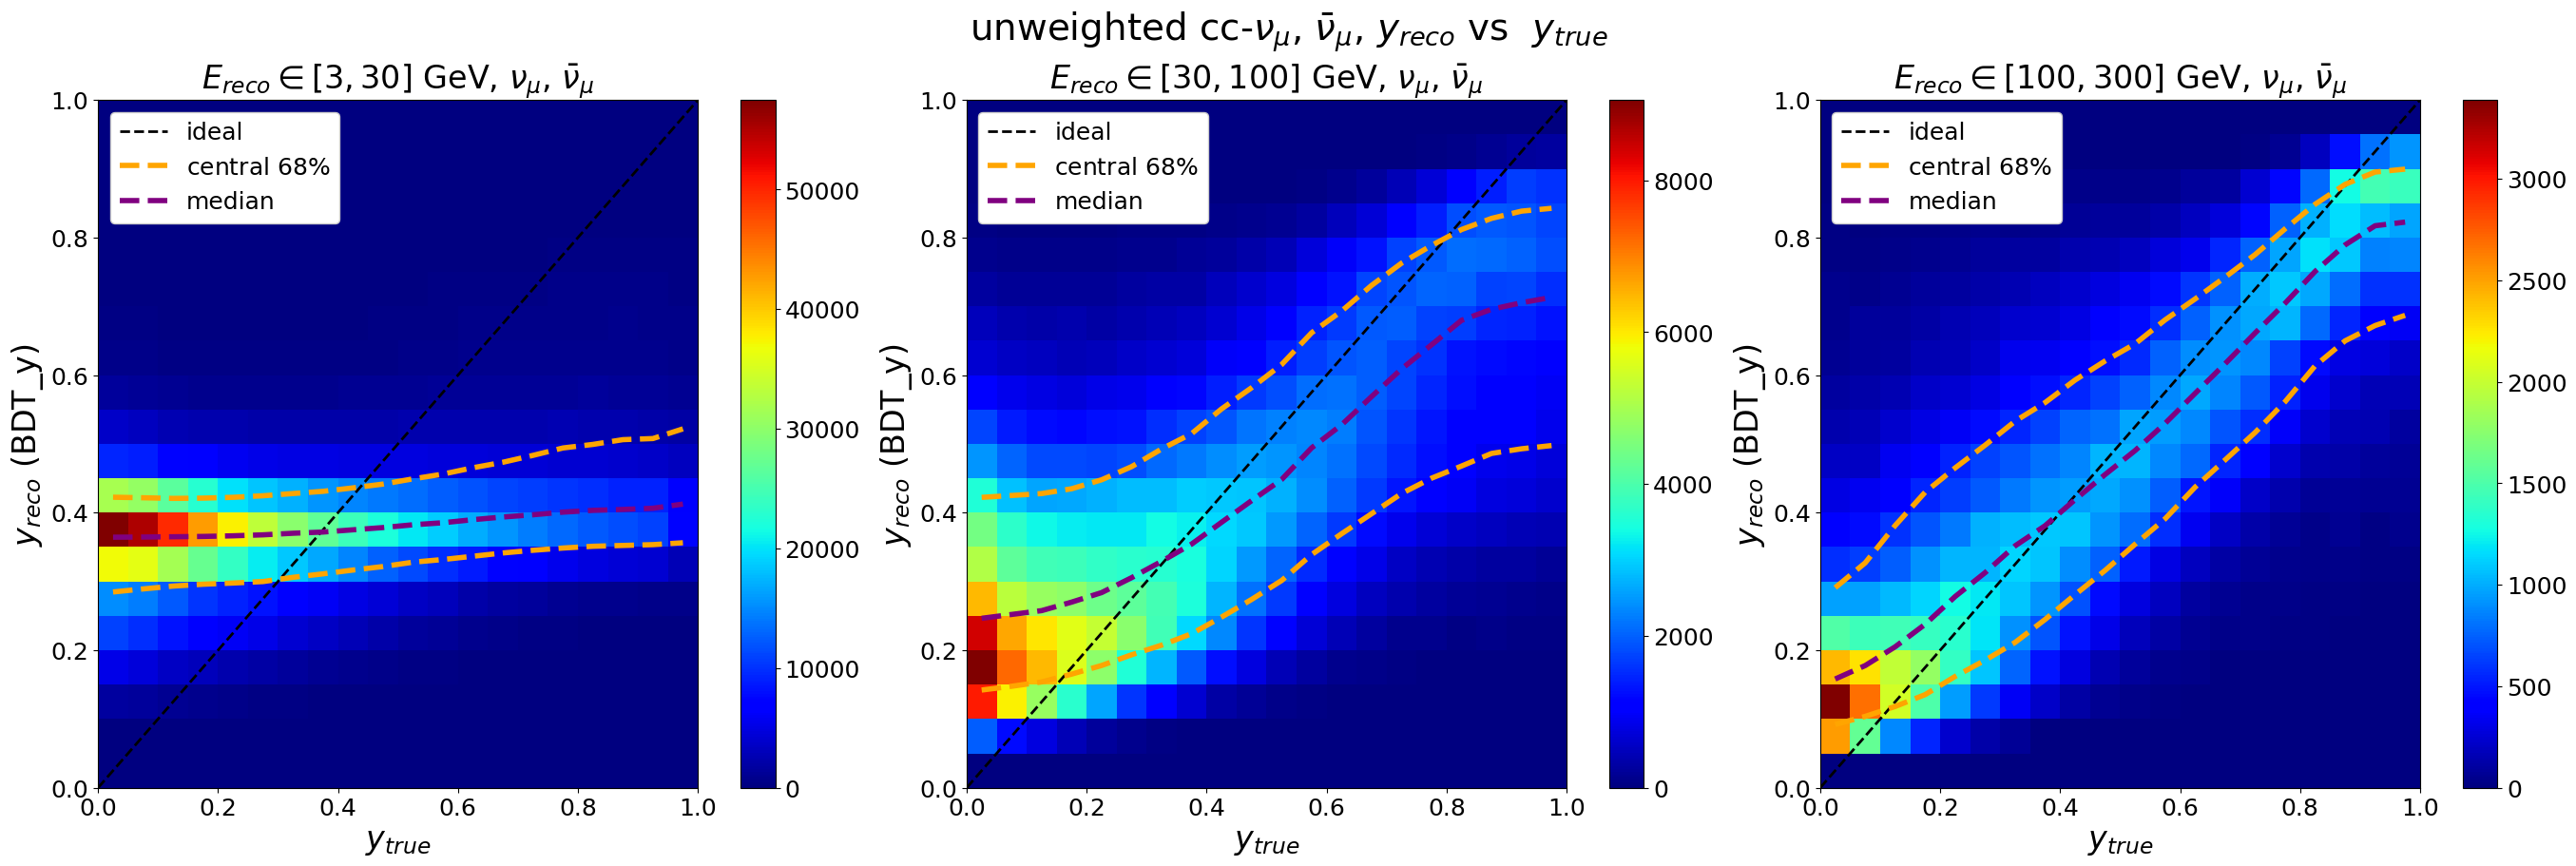

In [35]:
plotflag = True
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}$'.format(nu=nulabel[j]),fontsize=28)
            
            weightname = 'unweighted_cc_ytruevsyreco'+'_'+yname1[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            plt.show()

# Reconstruction PID Binning

In [36]:
reco_PID = pisa_inel_mu[FLERCNN_vars['PID']][:]
BDT_PID = pisa_inel_mu[FLERCNN_vars['BDT_PID']][:]
PIDbins = np.linspace(0,1,5)

PID_1 = (reco_PID < PIDbins[1]) & (reco_PID >= PIDbins[0])
PID_2 = (reco_PID < PIDbins[2]) & (reco_PID >= PIDbins[1])
PID_3 = (reco_PID < PIDbins[3]) & (reco_PID >= PIDbins[2])
PID_4 = (reco_PID <= PIDbins[4]) & (reco_PID >= PIDbins[3])

PIDs = {1:PID_1,
        2:PID_2,
        3:PID_3,
        4:PID_4    
}

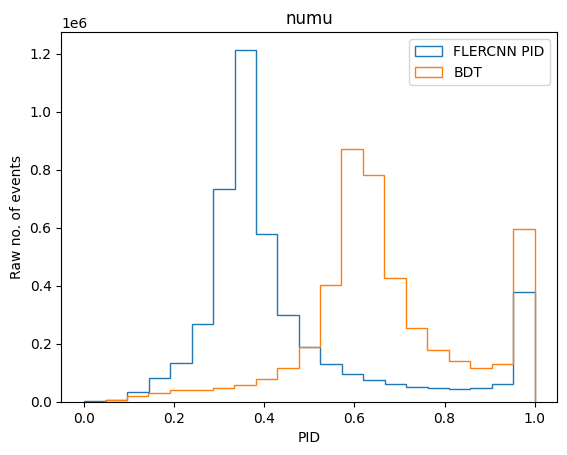

In [37]:
plt.hist(reco_PID,bins=21,histtype='step',label='FLERCNN PID')
plt.hist(BDT_PID,bins=21,histtype='step',label='BDT')
plt.xlabel('PID')
plt.ylabel('Raw no. of events')
plt.title('numu')
plt.legend()
plt.savefig('Inelast_Plots/flercnn_pid_bdt_pid.png')

In [38]:
plotflag = False
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_1]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_1]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_1]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_1]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_1]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_1]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}, PID \leq$ [0,0.25]'.format(nu=nulabel[j]),fontsize=28)
            
            
            weightname = 'unweighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/PID1_recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            
            plt.show()

In [39]:
plotflag = False
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_2]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_2]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_2]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_2]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_2]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_2]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}, PID \leq $[0.25,0.50]'.format(nu=nulabel[j]),fontsize=28)
            
            weightname = 'unweighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/PID2_recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            plt.show()

In [40]:
plotflag = False
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_3]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_3]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_3]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_3]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_3]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_3]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}, PID \leq$ [0.50,0.75]'.format(nu=nulabel[j]),fontsize=28)
            
            weightname = 'unweighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/PID3_recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            plt.show()

In [41]:
plotflag = False
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_4]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_4]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_4]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID_4]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_4]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID_4]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}, PID \leq [0.75,1.00]$'.format(nu=nulabel[j]),fontsize=28)
            
            weightname = 'unweighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/PID4_recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            plt.show()

In [42]:
plotflag = False
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]

PID = PID_3 + PID_4
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID]
            true_y_medium_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID]
            true_y_high_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID]
            
            reco_y_low_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_islow*PID]
            reco_y_medium_cc = y[is_cc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID]
            reco_y_high_cc = y[is_cc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID]
            
            
            weights_low_cc = np.ones_like(true_y_low_cc)
            weights_medium_cc = np.ones_like(true_y_medium_cc)
            weights_high_cc = np.ones_like(true_y_high_cc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_low_cc,true_y_low_cc,weights_low_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_medium_cc,true_y_medium_cc,weights_medium_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_high_cc,true_y_high_cc,weights_high_cc,yrange)
            ax3.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax3.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax3.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            fig.suptitle(r'unweighted cc-{nu}, $y_{{reco}}$ vs  $y_{{true}}, PID \leq [0.50,1.00]$'.format(nu=nulabel[j]),fontsize=28)            
            plt.show()

## High PID, nc

In [43]:
is_nc = pisa_inel_mu[FLERCNN_vars['interaction']][:]==2

In [44]:
np.sum(is_nc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID_4)

964

In [45]:
plotflag = False
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]

PID = PID_4
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        for j,nu in enumerate(nutype.values()):
            true_y_low_nc = bjorken_y[is_nc & trueypos & nu & AnalysisCuts & reco_E_islow*PID]
            true_y_medium_nc = bjorken_y[is_nc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID]
            true_y_high_nc = bjorken_y[is_nc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID]
            
            reco_y_low_nc = y[is_nc & trueypos & nu & AnalysisCuts & reco_E_islow*PID]
            reco_y_medium_nc = y[is_nc & trueypos & AnalysisCuts & nu & reco_E_ismedium*PID]
            reco_y_high_nc = y[is_nc & trueypos & nu & AnalysisCuts & reco_E_ishigh*PID]
            
            
            weights_low_nc = np.ones_like(true_y_low_nc)
            weights_medium_nc = np.ones_like(true_y_medium_nc)
            weights_high_nc = np.ones_like(true_y_high_nc)     
            
            
            #plotsection uweighted

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_nc,reco_y_low_nc,bins=[yrange,yrange],
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')

            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_nc,reco_y_medium_nc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')

            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_nc,reco_y_high_nc,bins=[yrange,yrange],
                                cmap=plt.cm.jet)
            ax3.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')

            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'unweighted nc-{nu}, $y_{{reco}}$ vs  $y_{{true}}, PID \leq [0.75,1.00]$'.format(nu=nulabel[j]),fontsize=28)
            
            weightname = 'unweighted_nc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/NewInelast/PID4_recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/NewInelast/"+weightname,bbox_inches='tight')
            
            plt.show()

In [46]:
PIDthreshold = .95

highPID = reco_PID >= PIDthreshold

## Checking high PID binning

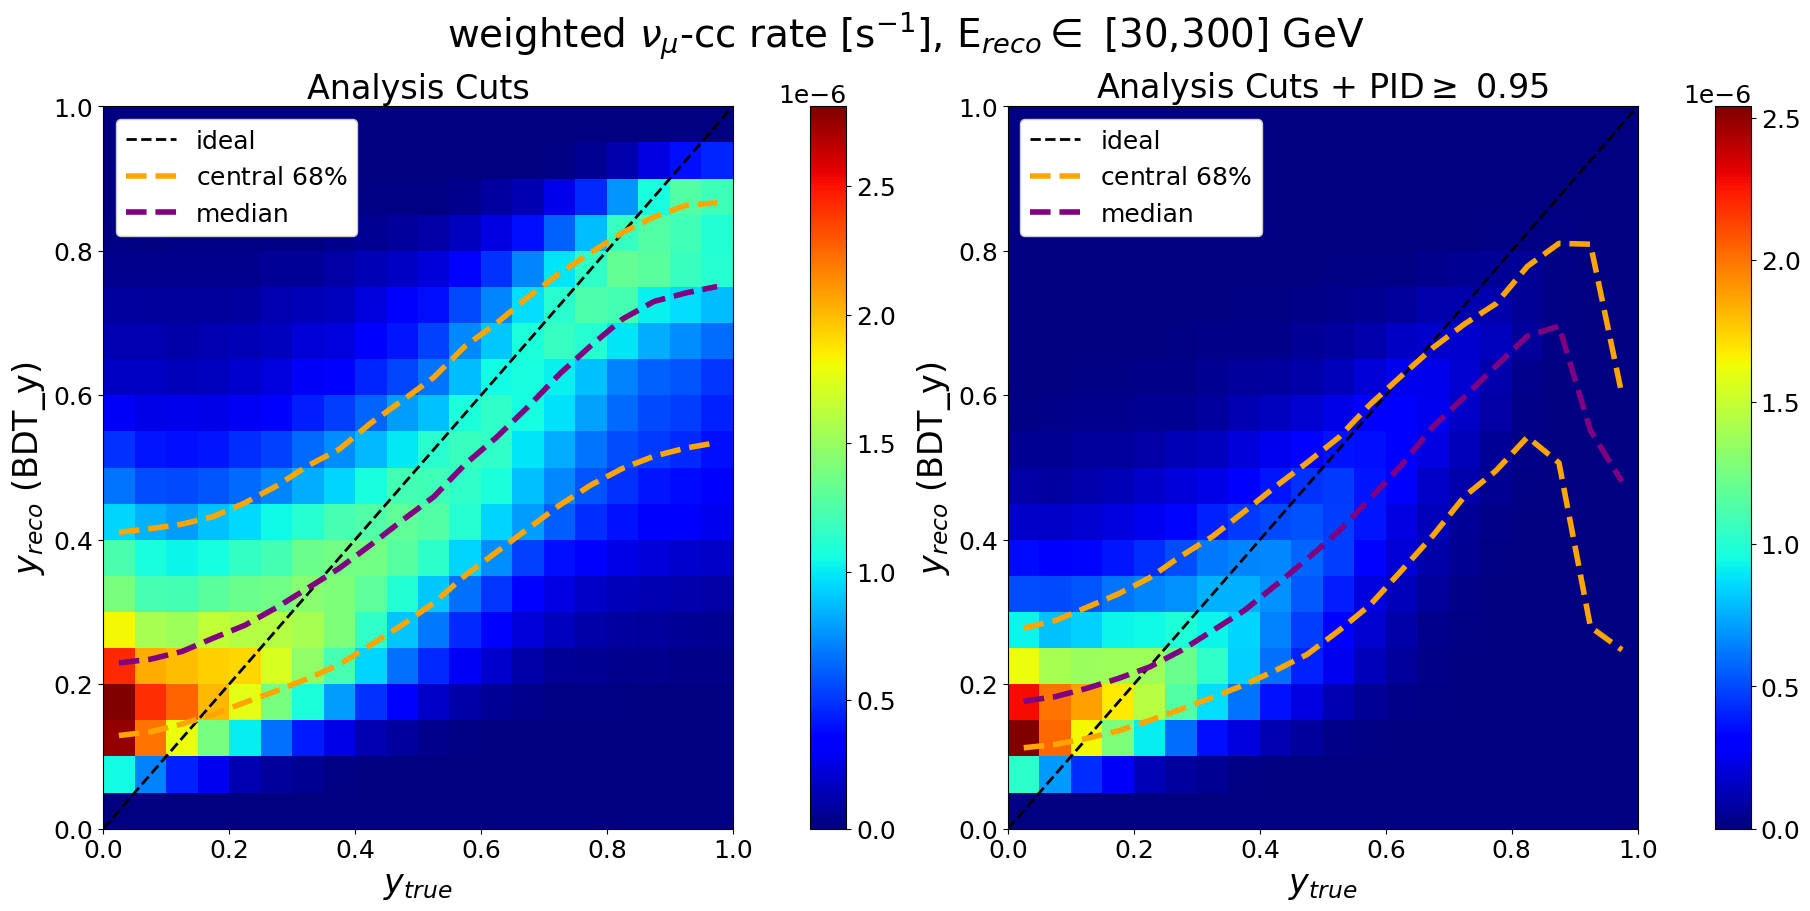

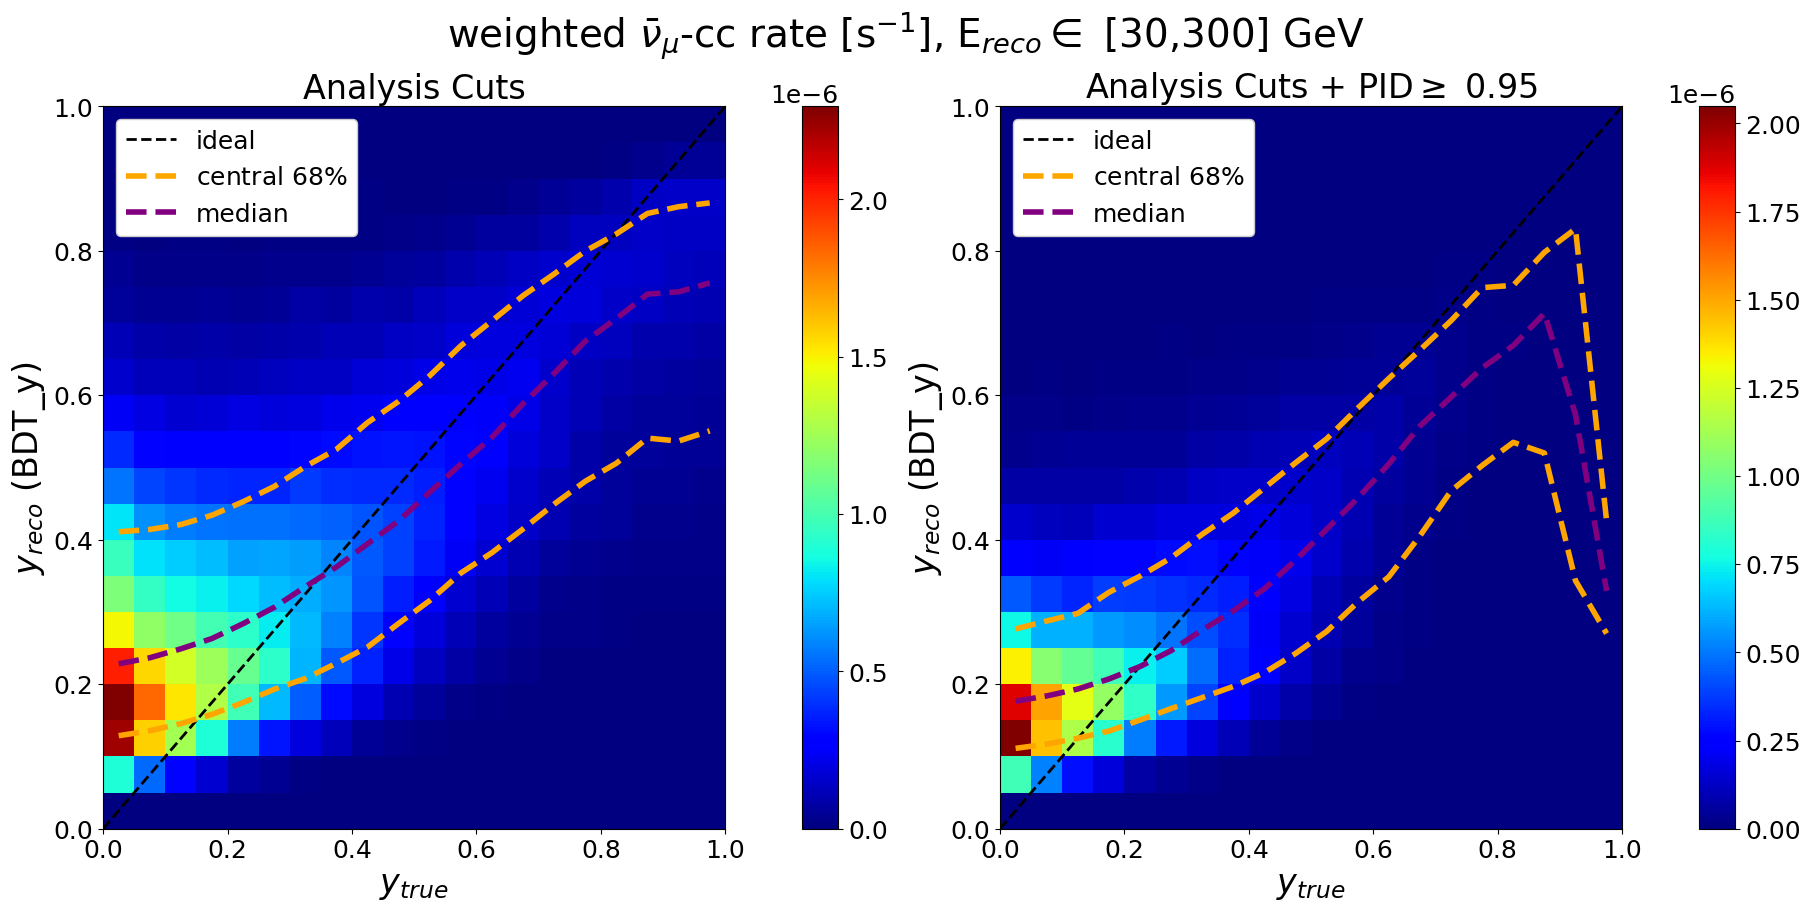

In [47]:
plotflag = True

reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]

energy_range = reco_E_ismedium | reco_E_ishigh
    
if plotflag:    
    for i,y in enumerate(ys_30.values()):
        if yname1[i] != 'BDT_y':
            continue
        for j,nu in enumerate(list(nutype.values())[:-1]):
            true_y_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & energy_range]
            reco_y_cc = y[is_cc & trueypos & nu & AnalysisCuts & energy_range]
            weights_cc = fluxweights_both[(is_cc & trueypos & nu & AnalysisCuts & energy_range)[AnalysisCuts]]
            
            fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained',figsize=(18,9))

            h,_,_,im=ax1.hist2d(true_y_cc,reco_y_cc,bins=[yrange,yrange],weights=weights_cc,
                       cmap=plt.cm.jet)
            ax1.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'Analysis Cuts'.format(nu=nulabel[j]),fontsize=24)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_cc,true_y_cc,weights_cc,yrange)
            ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)

            true_y_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & energy_range & highPID]
            reco_y_cc = y[is_cc & trueypos & nu & AnalysisCuts & energy_range & highPID]
            weights_cc = fluxweights_both[(is_cc & trueypos & nu & AnalysisCuts & energy_range & highPID)[AnalysisCuts]]
            
            h,_,_,im=ax2.hist2d(true_y_cc,reco_y_cc,bins=[yrange,yrange],weights=weights_cc,
                       cmap=plt.cm.jet)
            ax2.set_xlabel(r'$y_{{true}}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname1[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'Analysis Cuts + PID$\geq$ 0.95'.format(nu=nulabel[j]),fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
            lower,median,higher = bordercalc(reco_y_cc,true_y_cc,weights_cc,yrange)
            ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
            ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
            ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'weighted {nu}-cc rate [s$^{{-1}}$], E$_{{reco}} \in$ [30,300] GeV'.format(nu=nulabel[j]),fontsize=28)
            plt.savefig('Inelast_Plots/PID_Phasespace/y_reco_quality_BDT_y_numu{nu}.png'.format(nu=j),bbox_inches='tight')
            plt.show()

In [48]:
BDT_y = pisa_inel_mu[FLERCNN_vars['BDT_y']][:]
isnup = pisa_inel_mu[FLERCNN_vars['pdg_code']][:] > 0
isnupbar = pisa_inel_mu[FLERCNN_vars['pdg_code']][:] < 0

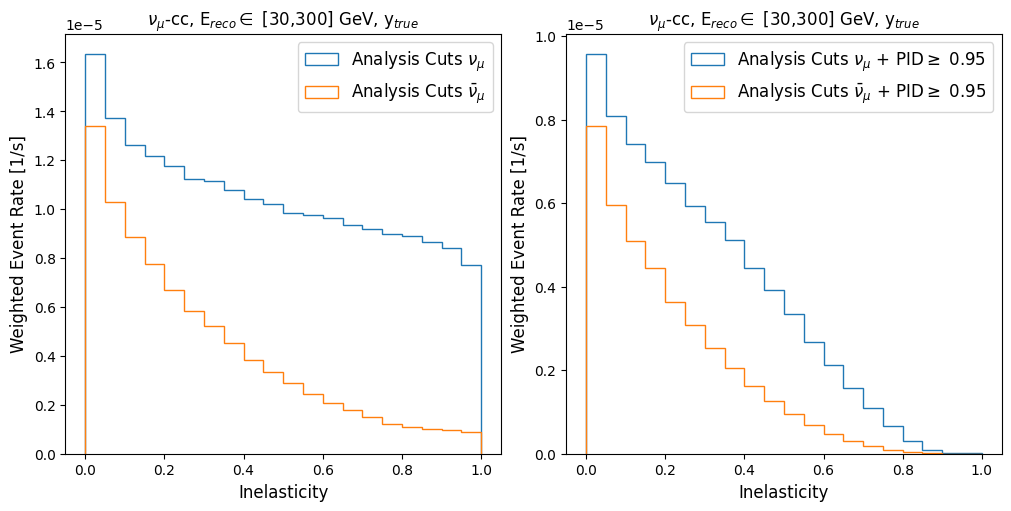

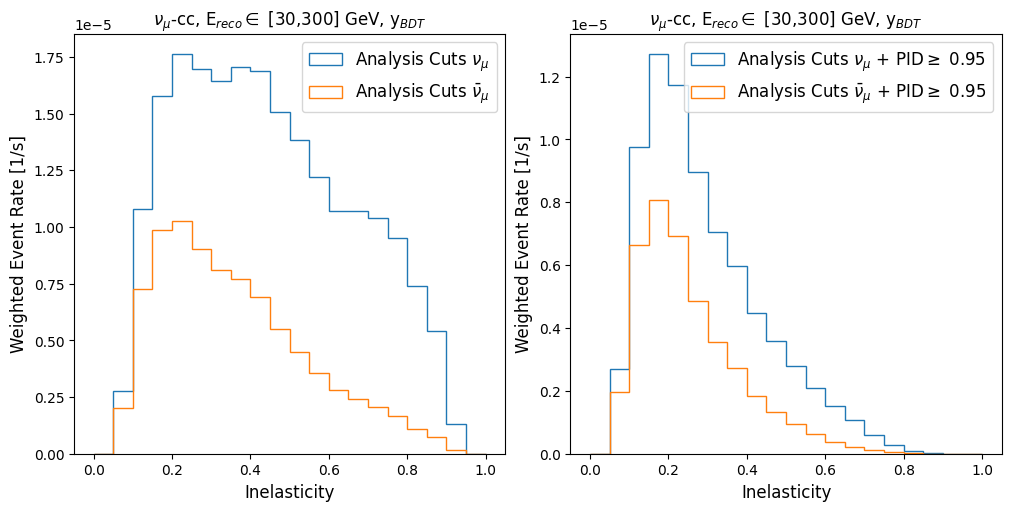

In [49]:
bins = np.linspace(0,1,21)

fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained',figsize=(10,5))

ax1.hist(bjorken_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$')
ax1.hist(bjorken_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$')
ax1.set_xlabel('Inelasticity',fontsize=12)
ax1.set_ylabel('Weighted Event Rate [1/s]',fontsize=12)
ax1.legend(fontsize=12)
ax1.set_title(r'$\nu_\mu$-cc, E$_{reco} \in$ [30,300] GeV, y$_{true}$',fontsize=12)

ax2.hist(bjorken_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID$\geq$ 0.95')
ax2.hist(bjorken_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID$\geq$ 0.95')
ax2.set_xlabel('Inelasticity',fontsize=12)
ax2.set_ylabel('Weighted Event Rate [1/s]',fontsize=12)
ax2.legend(fontsize=12)
ax2.set_title(r'$\nu_\mu$-cc, E$_{reco} \in$ [30,300] GeV, y$_{true}$',fontsize=12)
plt.savefig('Inelast_Plots/PID_Phasespace/Effect_PIDbin_ytrue.png')
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained',figsize=(10,5))

ax1.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$')
ax1.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$')
ax1.set_xlabel('Inelasticity',fontsize=12)
ax1.set_ylabel('Weighted Event Rate [1/s]',fontsize=12)
ax1.legend(fontsize=12)
ax1.set_title(r'$\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y$_{BDT}$',fontsize=12)

ax2.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID$\geq$ 0.95')
ax2.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID$\geq$ 0.95')
ax2.set_xlabel('Inelasticity',fontsize=12)
ax2.set_ylabel('Weighted Event Rate [1/s]',fontsize=12)
ax2.legend(fontsize=12)
ax2.set_title(r'$\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y$_{BDT}$',fontsize=12)
plt.savefig('Inelast_Plots/PID_Phasespace/Effect_PIDbin_BDTy.png')
plt.show()

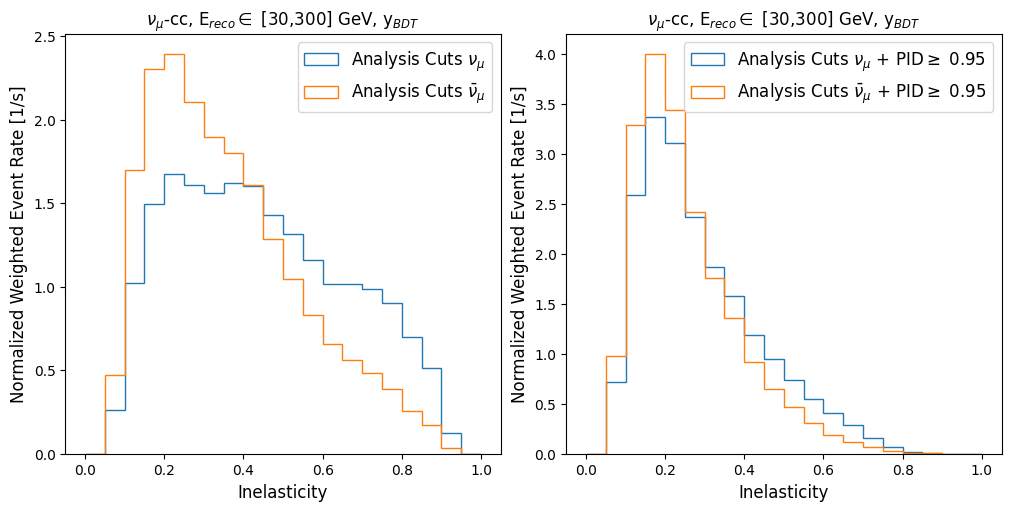

In [50]:
bins = np.linspace(0,1,21)

fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained',figsize=(10,5))

ax1.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$',density=True)
ax1.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$',density=True)
ax1.set_xlabel('Inelasticity',fontsize=12)
ax1.set_ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
ax1.legend(fontsize=12)
ax1.set_title(r'$\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y$_{BDT}$',fontsize=12)

ax2.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID$\geq$ 0.95',density=True)
ax2.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID$\geq$ 0.95',density=True)
ax2.set_xlabel('Inelasticity',fontsize=12)
ax2.set_ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
ax2.legend(fontsize=12)
ax2.set_title(r'$\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y$_{BDT}$',fontsize=12)
plt.savefig('Inelast_Plots/PID_Phasespace/Normalized_Effect_PIDbin_BDTy.png')
plt.show()

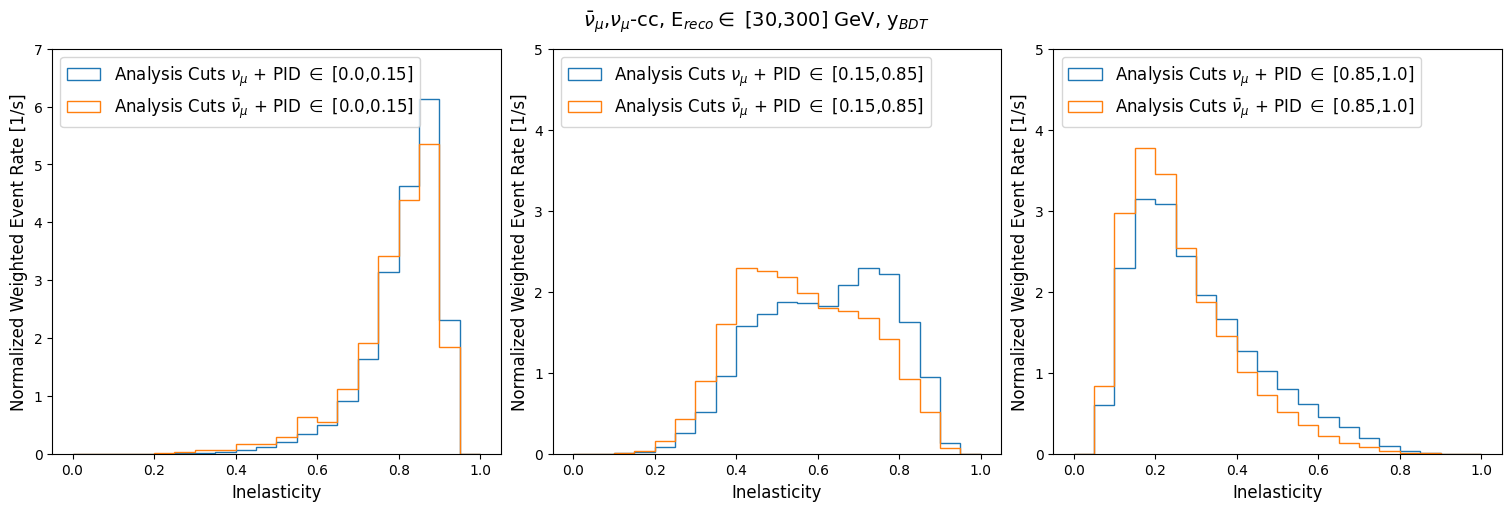

In [51]:
bins = np.linspace(0,1,21)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(15,5))

lowPID = (reco_PID >= 0.0) & (reco_PID < 0.15)
medPID = (reco_PID >= 0.15) & (reco_PID < 0.4)
hiPID = (reco_PID >= 0.85) & (reco_PID <= 1.0)

ax1.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & lowPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & lowPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID $\in$ [0.0,0.15]',density=True)
ax1.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & lowPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & lowPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID $\in$ [0.0,0.15]',density=True)
ax2.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & medPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & medPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID $\in$ [0.15,0.85]',density=True)
ax2.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & medPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & medPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID $\in$ [0.15,0.85]',density=True)
ax3.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & hiPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & hiPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID $\in$ [0.85,1.0]',density=True)
ax3.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & hiPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & hiPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID $\in$ [0.85,1.0]',density=True)
ax1.set_xlabel('Inelasticity',fontsize=12)
ax1.set_ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
ax1.legend(fontsize=12,loc=2)
ax1.set_ylim(0,7)
ax2.set_xlabel('Inelasticity',fontsize=12)
ax2.set_ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
ax2.legend(fontsize=12,loc=2)
ax2.set_ylim(0,5)
ax3.set_xlabel('Inelasticity',fontsize=12)
ax3.set_ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
ax3.legend(fontsize=12,loc=2)
ax3.set_ylim(0,5)
plt.suptitle(r'$\bar{\nu}_\mu$,$\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y$_{BDT}$',fontsize=14)
plt.savefig('Inelast_Plots/PID_Phasespace/BDTy_PIDbinning.png')
plt.show()

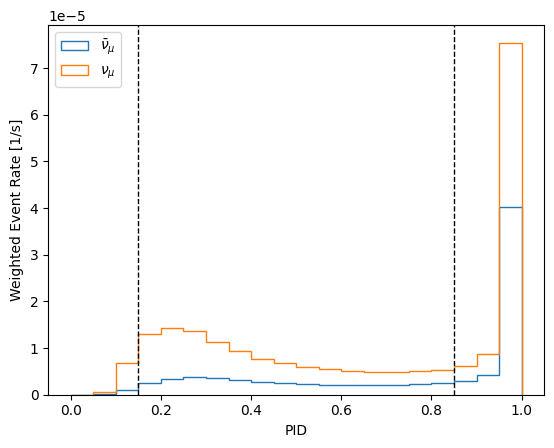

In [52]:
plt.hist(reco_PID[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)],bins=np.linspace(0,1,21),
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)[AnalysisCuts]],
        label=r'$\bar{\nu}_\mu$',histtype='step')
plt.hist(reco_PID[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)],bins=np.linspace(0,1,21),
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)[AnalysisCuts]],
        label=r'$\nu_\mu$',histtype='step')
plt.xlabel('PID')
plt.ylabel('Weighted Event Rate [1/s]')
plt.axvline(x=.15,ls='dashed',color='black',lw=1.)
plt.axvline(x=.85,ls='dashed',color='black',lw=1.)
plt.legend()
plt.savefig('Inelast_Plots/PID_Phasespace/PID_numu_numubar.png')

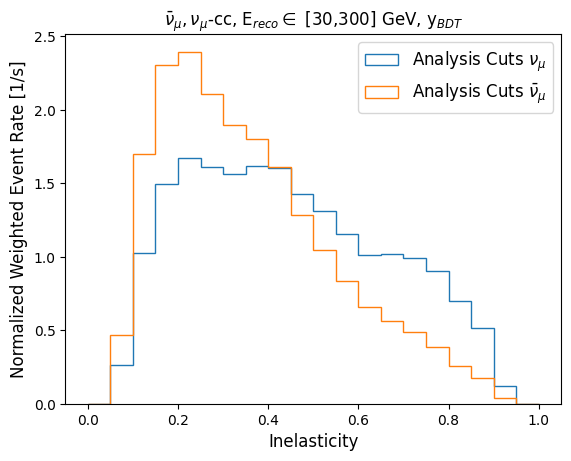

In [53]:
bins = np.linspace(0,1,21)

plt.hist(BDT_y[is_cc & trueypos & isnup & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$',density=True)
plt.hist(BDT_y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$',density=True)
plt.xlabel('Inelasticity',fontsize=12)
plt.ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
plt.legend(fontsize=12)
plt.title(r'$\bar{\nu}_\mu,\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y$_{BDT}$',fontsize=12)

plt.show()

In [54]:
pisa_ys = {'lvl3_5gev_100rho36':pisa_inel_mu[CNN2D_vars['new_lvl3_5gev_100rho']][:],
           'lvl3_30gev_100rho36':pisa_inel_mu[CNN2D_vars['new_lvl3_30gev_100rho']][:],
           'lvl6_5gev_200rho36':pisa_inel_mu[CNN2D_vars['old_lvl6_5gev_200rho']][:],
           'lvl6_30gev_200rho36':pisa_inel_mu[CNN2D_vars['old_lvl6_30gev_200rho']][:],
           'BDT_y':pisa_inel_mu[FLERCNN_vars['BDT_y']][:]
          }   

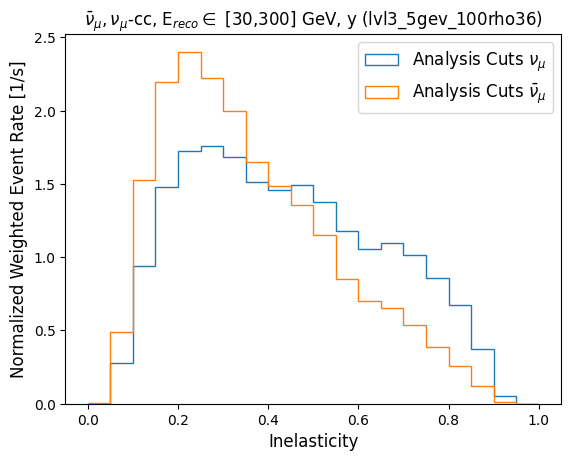

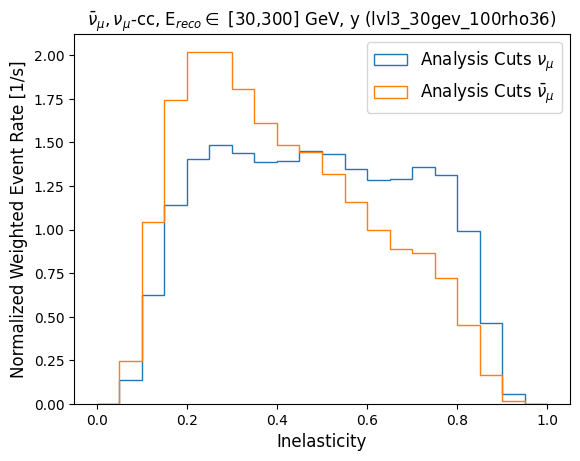

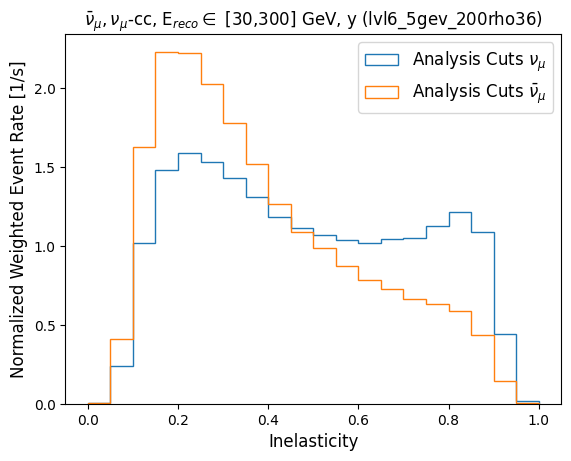

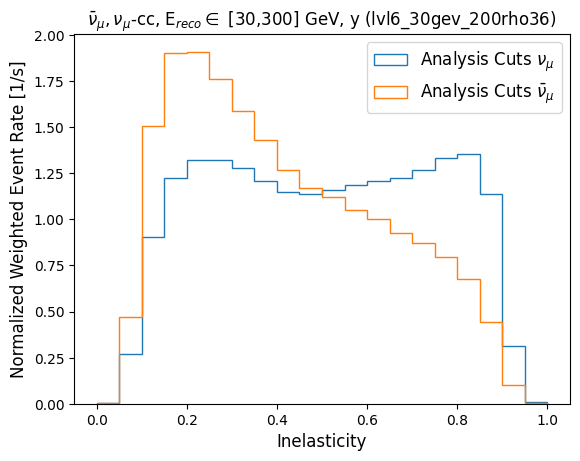

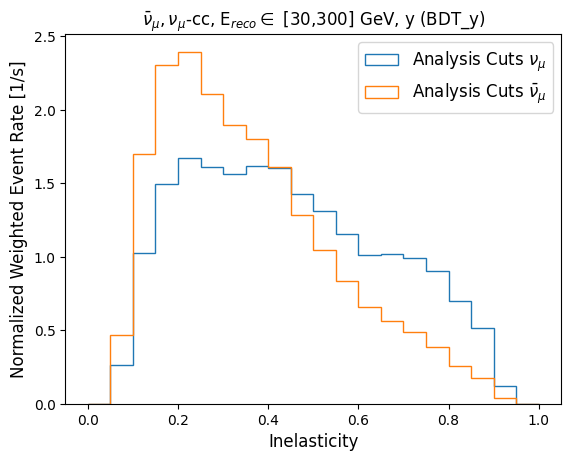

In [55]:
bins = np.linspace(0,1,21)

for i,y in enumerate(pisa_ys.values()):
    plt.hist(y[is_cc & trueypos & isnup & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$',density=True)
    plt.hist(y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$',density=True)
    plt.xlabel('Inelasticity',fontsize=12)
    plt.ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
    plt.legend(fontsize=12)
    plt.title(r'$\bar{{\nu}}_\mu,\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y ({name})'.format(name=list(pisa_ys.keys())[i],fontsize=12))
    plt.savefig('Inelast_Plots/PID_Phasespace/y{ins}_numu_numubar.png'.format(ins = i))
    plt.show()

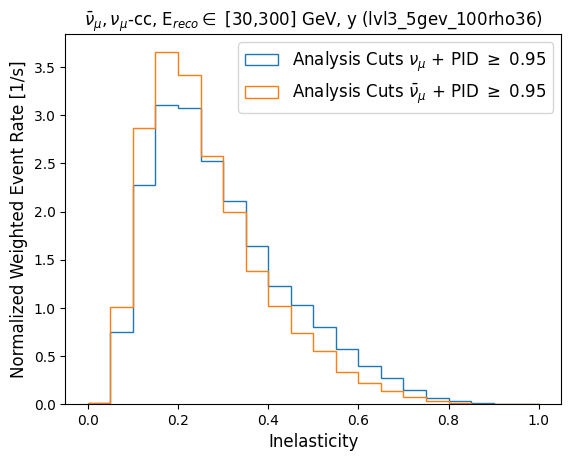

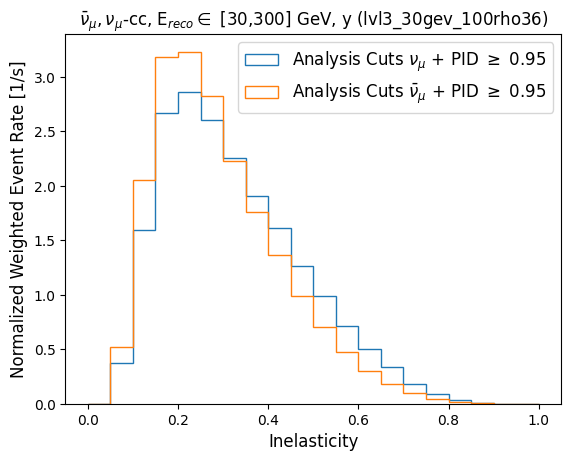

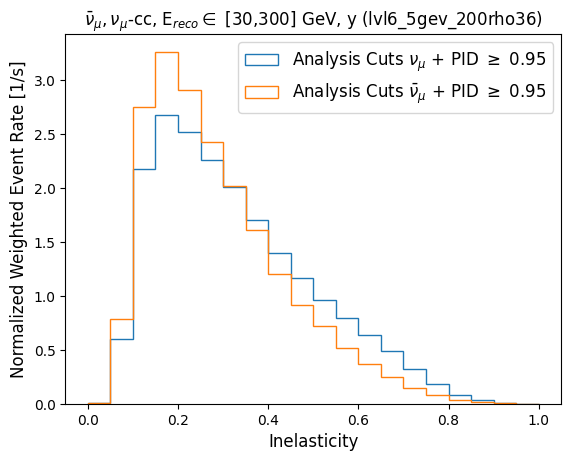

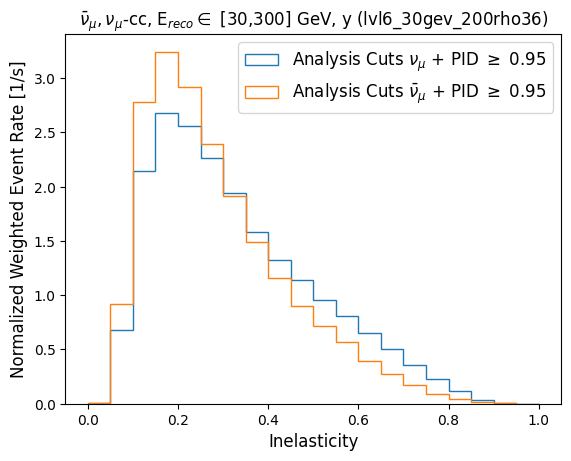

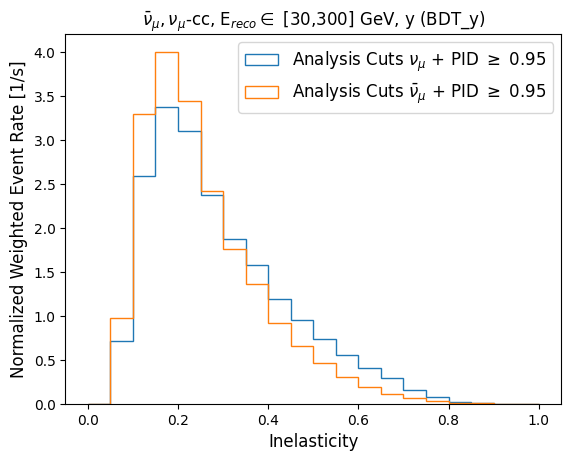

In [56]:
bins = np.linspace(0,1,21)

for i,y in enumerate(pisa_ys.values()):
    plt.hist(y[is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnup & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\nu_\mu$ + PID $\geq$ 0.95',density=True)
    plt.hist(y[is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID],histtype='step',
         weights=fluxweights_both[(is_cc & trueypos & isnupbar & AnalysisCuts & energy_range & highPID)[AnalysisCuts]],
         bins=bins,label=r'Analysis Cuts $\bar{\nu}_\mu$ + PID $\geq$ 0.95',density=True)
    plt.xlabel('Inelasticity',fontsize=12)
    plt.ylabel('Normalized Weighted Event Rate [1/s]',fontsize=12)
    plt.legend(fontsize=12)
    plt.title(r'$\bar{{\nu}}_\mu,\nu_\mu$-cc, E$_{{reco}} \in$ [30,300] GeV, y ({name})'.format(name=list(pisa_ys.keys())[i],fontsize=12))
    plt.savefig('Inelast_Plots/PID_Phasespace/y{ins}_highPIDbin_numu_numubar.png'.format(ins = i))
    plt.show()

In [57]:
def weirddiv(a,b):
    if b==0:
        return 0
    return a/b

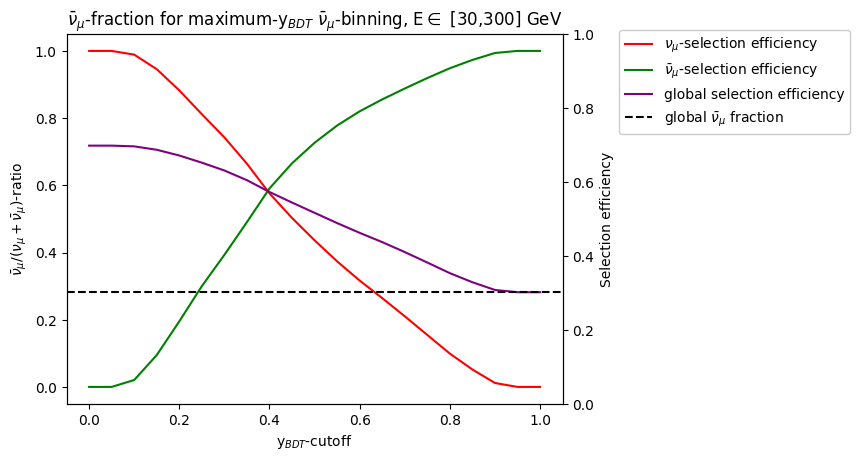

In [58]:
negative_y = bjorken_y < 0

notlow=(reco_E_islow==False)
low = is_cc*(negative_y==False)*reco_E_islow
medium = is_cc*(negative_y==False)*reco_E_ismedium
high = is_cc*(negative_y==False)*reco_E_ishigh
    
weights = fluxweights_both
sample = BDT_y

#notlowen

val=notlow

numus,bins,_=plt.hist(sample[val*isnup*AnalysisCuts],bins=yrange,weights=fluxweights_both[val[AnalysisCuts]*isnu]);
numubars,bins,_=plt.hist(sample[val*isnupbar*AnalysisCuts],bins=yrange,weights=fluxweights_both[val[AnalysisCuts]*isnubar]);
plt.close()

base_fraction=np.sum(numubars)/np.sum(numus+numubars)
nus=numus+numubars

numubar_fraction=[]
numubar_eff=[]
numu_eff=[]
cutoff=[]
mis=[]
binratio=[]

tot_numus=np.sum(numus)
tot_numubars=np.sum(numubars)

for i,c in enumerate(bins):
    cutoff.append(c)
    numubar_fraction.append(weirddiv(np.sum(numubars[:i]),(np.sum(numus[i:])+np.sum(numubars[:i]))))
    numu_eff.append(np.sum(numus[i:])/tot_numus)
    numubar_eff.append(np.sum(numubars[:i])/tot_numubars)
    mis.append((np.sum(numus[:i])+np.sum(numubars[i:]))/(tot_numus+tot_numubars))
    binratio.append(weirddiv(np.sum(nus[:i]),np.sum(nus[i:])+np.sum(nus[:i])))
    
fig,ax=plt.subplots()
ax.plot(cutoff,numu_eff,color='red',label=r'$\nu_\mu$-selection efficiency')
ax.plot(cutoff,numubar_eff,color='green',label=r'$\bar{\nu}_\mu$-selection efficiency')
ax.plot(cutoff,1-np.array(mis),color='purple',label=r'global selection efficiency')
ax.axhline(y=base_fraction,color='black',ls='dashed',label=r'global $\bar{\nu}_\mu$ fraction')
ax.set_xlabel(r'y$_{BDT}$-cutoff')
ax.set_ylabel(r'$\bar{\nu}_\mu/(\nu_\mu+\bar{\nu}_\mu)$-ratio')
ax1=ax.twinx()
ax1.set_ylabel('Selection efficiency')
ax.set_title(r'$\bar{\nu}_\mu$-fraction for maximum-y$_{BDT}$ $\bar{\nu}_\mu$-binning, E$\in$ [30,300] GeV')
ax.legend(bbox_to_anchor=(1.1,1.03),framealpha=1.)
plt.savefig('Inelast_Plots/PID_Phasespace/Efficiency_ybinnign_BDTy.png',bbox_inches='tight')
plt.show()

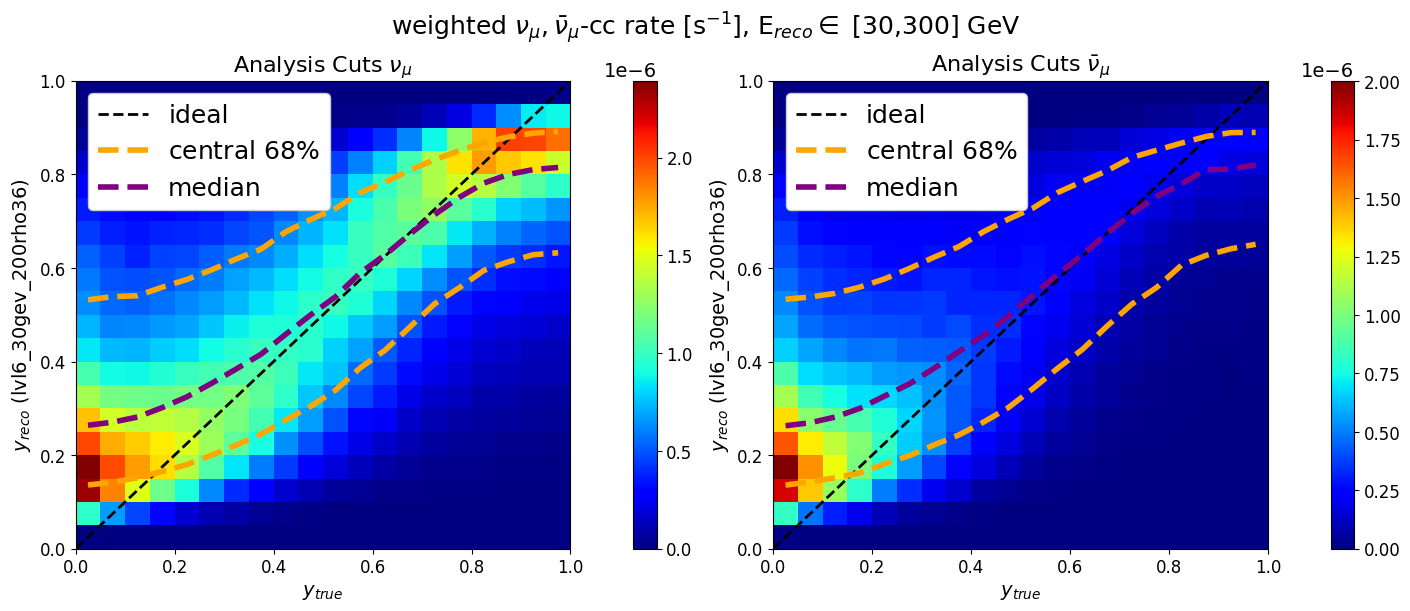

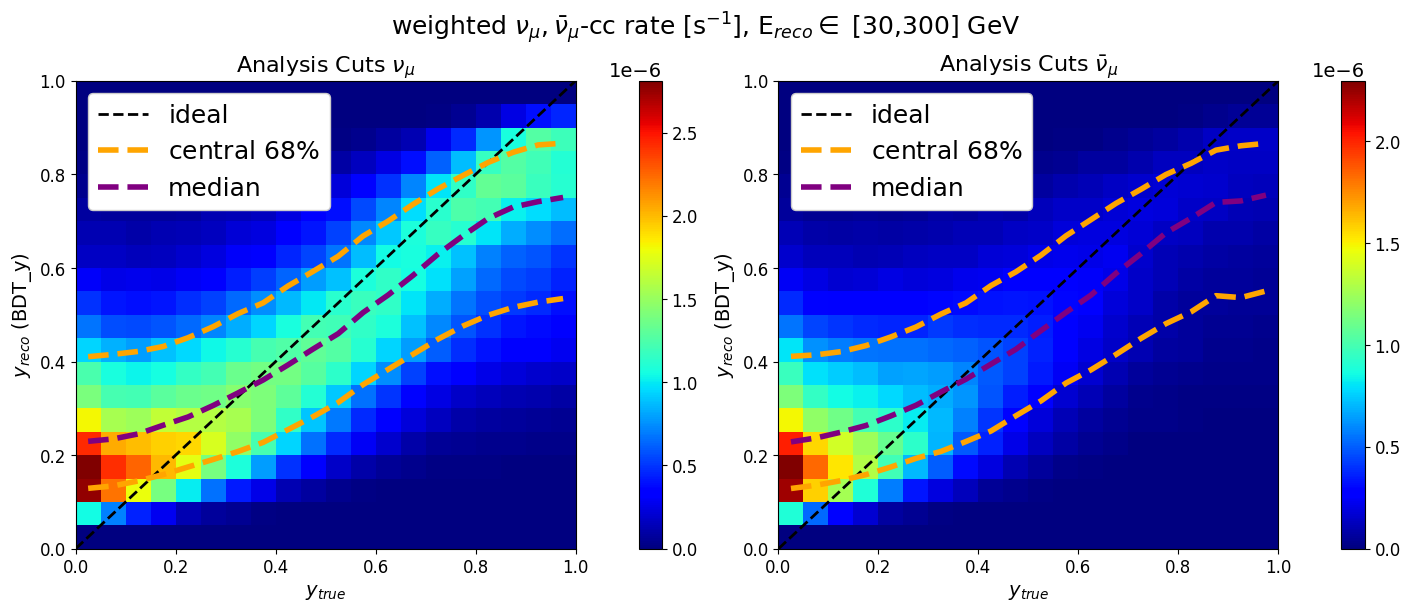

In [59]:
plotflag = True

reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                & (reco_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                & (reco_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                & (reco_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

bjorken_y = pisa_inel_mu[FLERCNN_vars['bjorken_y']][:]

energy_range = reco_E_ismedium | reco_E_ishigh
    
if plotflag:    
    for i,y in enumerate(list(pisa_ys.values())):
        if i in [0,1,2]:
            continue
        fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained',figsize=(14,6))
        for j,nu in enumerate(list(nutype.values())[:-1]):
            if j==0:
                true_y_cc = bjorken_y[is_cc & trueypos & nu & AnalysisCuts & energy_range]
                reco_y_cc = y[is_cc & trueypos & nu & AnalysisCuts & energy_range]
                weights_cc = fluxweights_both[(is_cc & trueypos & nu & AnalysisCuts & energy_range)[AnalysisCuts]]
                
                h,_,_,im=ax1.hist2d(true_y_cc,reco_y_cc,bins=[yrange,yrange],weights=weights_cc,
                           cmap=plt.cm.jet)
                ax1.set_xlabel(r'$y_{{true}}$',fontsize=14)
                ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=list(pisa_ys.keys())[i]),fontsize=14)
                if reco==True:
                    ax1.set_title(r'Analysis Cuts {nu}'.format(nu=nulabel[j]),fontsize=16)
                ax1.tick_params(axis='both', which='major', labelsize=12)
                ax1.tick_params(axis='both', which='minor', labelsize=12)
                ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
                lower,median,higher = bordercalc(reco_y_cc,true_y_cc,weights_cc,yrange)
                ax1.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
                ax1.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
                ax1.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
                ax1.legend(loc=2,fontsize=18,framealpha=1.)
                cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=12)
                cb.ax.yaxis.get_offset_text().set_fontsize(14)

            if j==1:
                true_y_cc = bjorken_y[is_cc & trueypos & AnalysisCuts & nu & energy_range]
                reco_y_cc = y[is_cc & trueypos & nu & AnalysisCuts & energy_range]
                weights_cc = fluxweights_both[(is_cc & trueypos & nu & AnalysisCuts & energy_range)[AnalysisCuts]]
                
                h,_,_,im=ax2.hist2d(true_y_cc,reco_y_cc,bins=[yrange,yrange],weights=weights_cc,
                           cmap=plt.cm.jet)
                ax2.set_xlabel(r'$y_{{true}}$',fontsize=14)
                ax2.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=list(pisa_ys.keys())[i]),fontsize=14)
                if reco==True:
                    ax2.set_title(r'Analysis Cuts {nu}'.format(nu=nulabel[j]),fontsize=16)
                ax2.tick_params(axis='both', which='major', labelsize=12)
                ax2.tick_params(axis='both', which='minor', labelsize=12)
                ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.,label='ideal')
                lower,median,higher = bordercalc(reco_y_cc,true_y_cc,weights_cc,yrange)
                ax2.plot(yrange[:-1]+0.025,lower,lw=4.,ls='dashed',color='orange',label=r'central 68$\%$')
                ax2.plot(yrange[:-1]+0.025,median,color='purple',label='median',ls='dashed',lw=4.)               
                ax2.plot(yrange[:-1]+0.025,higher,lw=4.,ls='dashed',color='orange')
                ax2.legend(loc=2,fontsize=18,framealpha=1.)
                cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
                cb.ax.tick_params(labelsize=12)
                cb.ax.yaxis.get_offset_text().set_fontsize(14)
                
        fig.suptitle(r'weighted $\nu_\mu,\bar{\nu}_\mu$-cc rate [s$^{{-1}}$], E$_{{reco}} \in$ [30,300] GeV',fontsize=18)
        plt.savefig('Inelast_Plots/PID_Phasespace/yr_v_yt_yp{val}'.format(val=i))                
        plt.show()